## VAR Model

Step1: Data Preparation

In [23]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [24]:
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

In [25]:
Macro_data=\
    pd.read_csv("Macroeconomic data.csv")
Macro_data=\
    Macro_data.set_index("Date")
Macro_data.head()

UN RATE  FEDFUNDS
Date                          
2015/3/31   5.533333  0.110000
2015/6/30   5.433333  0.123333
2015/9/30   5.100000  0.136667
2015/12/31  5.033333  0.160000
2016/3/31   4.900000  0.360000

In [26]:
USB_data=\
    pd.read_csv("USB US Equity.csv")
USB_data=\
    USB_data.set_index("Date")
USB_data.head()

Reserve for Loan\nLosses(millions)  \
Date                                            
2015/3/31                                4023   
2015/6/30                                4013   
2015/9/30                            3,965.00   
2015/12/31                           3,863.00   
2016/3/31                            3,853.00   

           Provision for Loan Losses(millions) Non-Performing Loans(millions)  \
Date                                                                            
2015/3/31                                  264                           1350   
2015/6/30                                  281                           1239   
2015/9/30                                  282                       1,242.00   
2015/12/31                                 305                       1,192.00   
2016/3/31                                  330                       1,425.00   

            Total Loans to Total\nDeposits(%)  
Date                                           
2015/3/31                               88.39  
2015/6/30                               86.62  
2015/9/30                               87.81  
2015/12/31                              87.89  
2016/3/31                               87.65

In [27]:
FRCB_data=\
    pd.read_csv("FRCB US Equity.csv")
FRCB_data=\
    FRCB_data.set_index("Date")
FRCB_data

Reserve for Loan\nLosses(millions)  \
Date                                             
2015/3/31                               219.22   
2015/6/30                               235.87   
2015/9/30                               250.41   
2015/12/31                              261.06   
2016/3/31                               265.58   
2016/6/30                               278.73   
2016/9/30                               296.11   
2016/12/31                              306.40   
2017/3/31                               314.98   
2017/6/30                               338.31   
2017/9/30                               347.76   
2017/12/31                              365.93   
2018/3/31                               378.78   
2018/6/30                               397.38   
2018/9/30                               415.82   
2018/12/31                              439.05   
2019/3/31                               453.12   
2019/6/30                               473.10   
2019/9/30                               485.46   
2019/12/31                              496.10   
2020/3/31                               541.91   
2020/6/30                               584.00   
2020/9/30                               604.75   
2020/12/31                              635.02   
2021/3/31                               620.83   
2021/6/30                               636.91   
2021/9/30                               668.19   
2021/12/31                              694.00   
2022/3/31                               701.00   
2022/6/30                               729.00   
2022/9/30                               760.00   
2022/12/31                              784.00   
2023/3/31                               784.00   
2023/6/30                                  NaN   
2023/9/30                                  NaN   
2023/12/31                                 NaN   
2024/3/31                                  NaN   

            Provision for Loan Losses(millions)  \
Date                                              
2015/3/31                                 11.89   
2015/6/30                                 17.01   
2015/9/30                                 14.50   
2015/12/31                                12.05   
2016/3/31                                  4.49   
2016/6/30                                 14.20   
2016/9/30                                 18.00   
2016/12/31                                10.50   
2017/3/31                                  9.09   
2017/6/30                                 23.94   
2017/9/30                                 10.11   
2017/12/31                                17.04   
2018/3/31                                 13.00   
2018/6/30                                 19.37   
2018/9/30                                 18.63   
2018/12/31                                25.09   
2019/3/31                                 14.20   
2019/6/30                                 21.20   
2019/9/30                                 16.71   
2019/12/31                                 9.58   
2020/3/31                                 48.10   
2020/6/30                                 31.12   
2020/9/30                                 28.54   
2020/12/31                                35.07   
2021/3/31                                -14.61   
2021/6/30                                 16.14   
2021/9/30                                 34.03   
2021/12/31                                24.00   
2022/3/31                                 10.00   
2022/6/30                                 31.00   
2022/9/30                                 36.00   
2022/12/31                                30.00   
2023/3/31                                   NaN   
2023/6/30                                   NaN   
2023/9/30                                   NaN   
2023/12/31                                  NaN   
2024/3/31                                   NaN   

            Non-Performing Loans(millions)  Total Loans to Total\nDepos

In [28]:
FCNCA_data=\
    pd.read_csv("FCNCA US Equity.csv")
FCNCA_data=\
    FCNCA_data.set_index("Date")
FCNCA_data

Reserve for Loan\nLosses(millions)  \
Date                                            
2015/3/31                              205.55   
2015/6/30                              208.32   
2015/9/30                              205.46   
2015/12/31                             206.22   
2016/3/31                              206.78   
2016/6/30                              208.01   
2016/9/30                              211.95   
2016/12/31                             218.79   
2017/3/31                              220.94   
2017/6/30                               228.8   
2017/9/30                              231.84   
2017/12/31                             221.89   
2018/3/31                              223.12   
2018/6/30                              224.87   
2018/9/30                               219.2   
2018/12/31                             223.71   
2019/3/31                              228.78   
2019/6/30                              226.58   
2019/9/30                              226.82   
2019/12/31                             225.14   
2020/3/31                              209.26   
2020/6/30                              222.45   
2020/9/30                              223.94   
2020/12/31                             224.31   
2021/3/31                              210.65   
2021/6/30                              189.09   
2021/9/30                              183.19   
2021/12/31                             178.49   
2022/3/31                                 848   
2022/6/30                                 850   
2022/9/30                                 882   
2022/12/31                                922   
2023/3/31                            1,605.00   
2023/6/30                            1,637.00   
2023/9/30                            1,673.00   
2023/12/31                           1,747.00   
2024/3/31                            1,737.00   

            Provision for Loan Losses(millions)  \
Date                                              
2015/3/31                                  5.79   
2015/6/30                                  7.72   
2015/9/30                                  0.11   
2015/12/31                                 7.05   
2016/3/31                                  4.84   
2016/6/30                                  4.56   
2016/9/30                                  7.51   
2016/12/31                                16.03   
2017/3/31                                  8.23   
2017/6/30                                 12.32   
2017/9/30                                  7.95   
2017/12/31                                -2.81   
2018/3/31                                  7.61   
2018/6/30                                  8.44   
2018/9/30                                  0.84   
2018/12/31                                11.59   
2019/3/31                                 11.75   
2019/6/30                                  5.20   
2019/9/30                                  6.77   
2019/12/31                                 7.73   
2020/3/31                                 28.36   
2020/6/30                                 20.55   
2020/9/30                                  4.04   
2020/12/31                                 5.40   
2021/3/31                                -10.97   
2021/6/30                                -19.60   
2021/9/30                                 -1.12   
2021/12/31                                -5.14   
2022/3/31                                464.00   
2022/6/30                                 42.00   
2022/9/30                                 60.00   
2022/12/31                                79.00   
2023/3/31                                783.00   
2023/6/30                                151.00   
2023/9/30                                192.00   
2023/12/31                               249.00   
2024/3/31                                 64.00   

           Non-Performing Loans(millions)  Total Loans to Total\nDeposits(%)  
Date                          

In [29]:
FIFTH_data=\
    pd.read_csv("FIFTH THIRD.csv")
FIFTH_data=\
    FIFTH_data.set_index("Date")
FIFTH_data

Reserve for Loan\nLosses(millions)  \
Date                                            
2015/3/31                                1300   
2015/6/30                                1293   
2015/9/30                            1,261.00   
2015/12/31                           1,272.00   
2016/3/31                            1,295.00   
2016/6/30                            1,299.00   
2016/9/30                            1,272.00   
2016/12/31                           1,253.00   
2017/3/31                            1,238.00   
2017/6/30                            1,226.00   
2017/9/30                            1,205.00   
2017/12/31                           1,196.00   
2018/3/31                            1,138.00   
2018/6/30                            1,077.00   
2018/9/30                            1,091.00   
2018/12/31                           1,103.00   
2019/3/31                            1,115.00   
2019/6/30                            1,115.00   
2019/9/30                            1,143.00   
2019/12/31                           1,202.00   
2020/3/31                            2,348.00   
2020/6/30                            2,696.00   
2020/9/30                            2,574.00   
2020/12/31                           2,453.00   
2021/3/31                            2,208.00   
2021/6/30                            2,033.00   
2021/9/30                            1,954.00   
2021/12/31                           1,892.00   
2022/3/31                            1,908.00   
2022/6/30                            2,014.00   
2022/9/30                            2,099.00   
2022/12/31                           2,194.00   
2023/3/31                            2,215.00   
2023/6/30                            2,327.00   
2023/9/30                            2,340.00   
2023/12/31                           2,322.00   
2024/3/31                            2,318.00   

            Provision for Loan Losses(millions)  \
Date                                              
2015/3/31                                    69   
2015/6/30                                    79   
2015/9/30                                   156   
2015/12/31                                   91   
2016/3/31                                   119   
2016/6/30                                    91   
2016/9/30                                    80   
2016/12/31                                   54   
2017/3/31                                    74   
2017/6/30                                    52   
2017/9/30                                    67   
2017/12/31                                   67   
2018/3/31                                    13   
2018/6/30                                    14   
2018/9/30                                    84   
2018/12/31                                   97   
2019/3/31                                    90   
2019/6/30                                    85   
2019/9/30                                   134   
2019/12/31                                  162   
2020/3/31                                   640   
2020/6/30                                   485   
2020/9/30                                   -15   
2020/12/31                                  -13   
2021/3/31                                  -173   
2021/6/30                                  -115   
2021/9/30                                   -42   
2021/12/31                                  -47   
2022/3/31                                    45   
2022/6/30                                   179   
2022/9/30                                   158   
2022/12/31                                  180   
2023/3/31                                   164   
2023/6/30                                   177   
2023/9/30                                   119   
2023/12/31                                   55   
2024/3/31                                    94   

            Non-Performing Loans(millions)  Total Loans to Total\nDeposits(%)  
Date                         

In [30]:
WFC_data=\
    pd.read_csv("WFC US Equity.csv")
WFC_data=\
    WFC_data.set_index("Date")
WFC_data

Reserve for Loan\nLosses(millions)  \
Date                                            
2015/3/31                               12176   
2015/6/30                               11754   
2015/9/30                           11,659.00   
2015/12/31                          11,545.00   
2016/3/31                           11,621.00   
2016/6/30                           11,664.00   
2016/9/30                           11,583.00   
2016/12/31                          11,419.00   
2017/3/31                           11,168.00   
2017/6/30                           11,073.00   
2017/9/30                           11,078.00   
2017/12/31                          11,004.00   
2018/3/31                           10,373.00   
2018/6/30                           10,193.00   
2018/9/30                           10,021.00   
2018/12/31                           9,775.00   
2019/3/31                            9,900.00   
2019/6/30                            9,692.00   
2019/9/30                            9,715.00   
2019/12/31                           9,551.00   
2020/3/31                           11,263.00   
2020/6/30                           18,926.00   
2020/9/30                           19,463.00   
2020/12/31                          18,516.00   
2021/3/31                           16,928.00   
2021/6/30                           15,148.00   
2021/9/30                           13,517.00   
2021/12/31                          12,490.00   
2022/3/31                           11,504.00   
2022/6/30                           11,786.00   
2022/9/30                           12,571.00   
2022/12/31                          12,985.00   
2023/3/31                           13,120.00   
2023/6/30                           14,258.00   
2023/9/30                           14,554.00   
2023/12/31                          14,606.00   
2024/3/31                           14,421.00   

           Provision for Loan Losses(millions) Non-Performing Loans(millions)  \
Date                                                                            
2015/3/31                                  608                          12510   
2015/6/30                                  300                          12443   
2015/9/30                                  703                      11,537.00   
2015/12/31                                 831                      11,382.00   
2016/3/31                             1,086.00                      12,234.00   
2016/6/30                             1,074.00                      11,963.00   
2016/9/30                                  805                      10,986.00   
2016/12/31                                 805                      10,384.00   
2017/3/31                                  605                       9,759.00   
2017/6/30                                  555                       9,056.00   
2017/9/30                                  717                       8,619.00   
2017/12/31                                 651                       8,036.00   
2018/3/31                                  191                       7,719.00   
2018/6/30                                  452                       7,486.00   
2018/9/30                                  580                       7,053.00   
2018/12/31                                 521                       6,496.00   
2019/3/31                                  845                       6,905.00   
2019/6/30                                  503                       5,922.00   
2019/9/30                                  695                       5,545.00   
2019/12/31                                 644                       5,346.00   
2020/3/31                             4,005.00                       6,156.00   
2020/6/30                             9,534.00                       7,605.00   
2020/9/30                                  769                       8,022.00   
2020/12/31                                -179                       8,728

In [31]:
America_data=\
    pd.read_csv("Bank of America Corp.csv")
America_data=\
    America_data.set_index("Date")
America_data

Reserve for Loan\nLosses(millions)  \
Date                                            
2015/3/31                               13676   
2015/6/30                               13068   
2015/9/30                           12,657.00   
2015/12/31                          12,234.00   
2016/3/31                           12,069.00   
2016/6/30                           11,837.00   
2016/9/30                           11,692.00   
2016/12/31                          11,237.00   
2017/3/31                           11,112.00   
2017/6/30                           10,875.00   
2017/9/30                           10,693.00   
2017/12/31                          10,393.00   
2018/3/31                           10,260.00   
2018/6/30                           10,050.00   
2018/9/30                            9,734.00   
2018/12/31                           9,601.00   
2019/3/31                            9,577.00   
2019/6/30                            9,527.00   
2019/9/30                            9,433.00   
2019/12/31                           9,416.00   
2020/3/31                           15,766.00   
2020/6/30                           19,389.00   
2020/9/30                           19,596.00   
2020/12/31                          18,802.00   
2021/3/31                           16,168.00   
2021/6/30                           14,095.00   
2021/9/30                           13,155.00   
2021/12/31                          12,387.00   
2022/3/31                           12,104.00   
2022/6/30                           11,973.00   
2022/9/30                           12,302.00   
2022/12/31                          12,682.00   
2023/3/31                           12,514.00   
2023/6/30                           12,950.00   
2023/9/30                           13,287.00   
2023/12/31                          13,342.00   
2024/3/31                           13,213.00   

           Provision for Loan Losses(millions) Non-Performing Loans(millions)  \
Date                                                                            
2015/3/31                                  765                          11205   
2015/6/30                                  780                          10747   
2015/9/30                                  806                       9,799.00   
2015/12/31                                 810                       9,377.00   
2016/3/31                                  997                       8,850.00   
2016/6/30                                  976                       8,364.00   
2016/9/30                                  850                       8,349.00   
2016/12/31                                 774                       7,707.00   
2017/3/31                                  835                       7,274.00   
2017/6/30                                  726                       6,802.00   
2017/9/30                                  834                       6,570.00   
2017/12/31                            1,001.00                       6,470.00   
2018/3/31                                  834                       6,378.00   
2018/6/30                                  827                       5,897.00   
2018/9/30                                  716                       5,154.00   
2018/12/31                                 905                       4,944.00   
2019/3/31                             1,013.00                       4,850.00   
2019/6/30                                  857                       4,187.00   
2019/9/30                                  779                       3,476.00   
2019/12/31                                 941                       3,552.00   
2020/3/31                             4,761.00                       4,056.00   
2020/6/30                             5,117.00                       4,393.00   
2020/9/30                             1,389.00                       4,550.00   
2020/12/31                                  53                       4,952

In [32]:
Citizens_data=\
    pd.read_csv("Citizens Financial Group Inc.csv")
Citizens_data=\
    Citizens_data.set_index("Date")
Citizens_data

Reserve for Loan\nLosses(millions)  \
Date                                            
2015/3/31                                1202   
2015/6/30                                1201   
2015/9/30                            1,201.00   
2015/12/31                           1,216.00   
2016/3/31                            1,224.00   
2016/6/30                            1,246.00   
2016/9/30                            1,240.00   
2016/12/31                           1,236.00   
2017/3/31                            1,224.00   
2017/6/30                            1,219.00   
2017/9/30                            1,224.00   
2017/12/31                           1,236.00   
2018/3/31                            1,246.00   
2018/6/30                            1,253.00   
2018/9/30                            1,242.00   
2018/12/31                           1,242.00   
2019/3/31                            1,245.00   
2019/6/30                            1,227.00   
2019/9/30                            1,263.00   
2019/12/31                           1,252.00   
2020/3/31                            2,171.00   
2020/6/30                            2,448.00   
2020/9/30                            2,542.00   
2020/12/31                           2,443.00   
2021/3/31                            2,194.00   
2021/6/30                            1,947.00   
2021/9/30                            1,855.00   
2021/12/31                           1,758.00   
2022/3/31                            1,720.00   
2022/6/30                            1,964.00   
2022/9/30                            1,980.00   
2022/12/31                           1,983.00   
2023/3/31                            2,017.00   
2023/6/30                            2,044.00   
2023/9/30                            2,080.00   
2023/12/31                           2,098.00   
2024/3/31                            2,086.00   

            Provision for Loan Losses(millions)  \
Date                                              
2015/3/31                                    58   
2015/6/30                                    56   
2015/9/30                                    76   
2015/12/31                                   91   
2016/3/31                                    91   
2016/6/30                                    90   
2016/9/30                                    86   
2016/12/31                                  102   
2017/3/31                                    96   
2017/6/30                                    70   
2017/9/30                                    72   
2017/12/31                                   83   
2018/3/31                                    78   
2018/6/30                                    85   
2018/9/30                                    78   
2018/12/31                                   85   
2019/3/31                                    85   
2019/6/30                                    97   
2019/9/30                                   101   
2019/12/31                                  110   
2020/3/31                                   600   
2020/6/30                                   464   
2020/9/30                                   428   
2020/12/31                                  124   
2021/3/31                                  -140   
2021/6/30                                  -213   
2021/9/30                                   -33   
2021/12/31                                  -25   
2022/3/31                                     3   
2022/6/30                                   216   
2022/9/30                                   123   
2022/12/31                                  132   
2023/3/31                                   168   
2023/6/30                                   176   
2023/9/30                                   172   
2023/12/31                                  171   
2024/3/31                                   171   

           Non-Performing Loans(millions)  Total Loans to Total\nDeposits(%)  
Date                          

In [33]:
JPM_data=\
    pd.read_csv("JPM US CHASE.csv")
JPM_data=\
    JPM_data.set_index("Date")
JPM_data

Reserve for Loan\nLosses(millions)  \
Date                                            
2015/3/31                               14065   
2015/6/30                               13915   
2015/9/30                           13,466.00   
2015/12/31                          13,555.00   
2016/3/31                           13,994.00   
2016/6/30                           14,227.00   
2016/9/30                           14,204.00   
2016/12/31                          13,776.00   
2017/3/31                           13,413.00   
2017/6/30                           13,363.00   
2017/9/30                           13,539.00   
2017/12/31                          13,604.00   
2018/3/31                           13,375.00   
2018/6/30                           13,250.00   
2018/9/30                           13,128.00   
2018/12/31                          13,445.00   
2019/3/31                           13,533.00   
2019/6/30                           13,166.00   
2019/9/30                           13,235.00   
2019/12/31                          13,123.00   
2020/3/31                           23,244.00   
2020/6/30                           32,092.00   
2020/9/30                           30,814.00   
2020/12/31                          28,328.00   
2021/3/31                           23,001.00   
2021/6/30                           19,500.00   
2021/9/30                           18,150.00   
2021/12/31                          16,386.00   
2022/3/31                           17,192.00   
2022/6/30                           17,750.00   
2022/9/30                           18,185.00   
2022/12/31                          19,726.00   
2023/3/31                           20,053.00   
2023/6/30                           21,980.00   
2023/9/30                           21,946.00   
2023/12/31                          22,420.00   
2024/3/31                           22,351.00   

           Provision for Loan Losses(millions) Non-Performing Loans(millions)  \
Date                                                                            
2015/3/31                                  959                           6961   
2015/6/30                                  935                           6883   
2015/9/30                                  682                       6,644.00   
2015/12/31                            1,251.00                       6,429.00   
2016/3/31                             1,824.00                       7,435.00   
2016/6/30                             1,402.00                       7,185.00   
2016/9/30                             1,271.00                       7,138.00   
2016/12/31                                 864                       6,883.00   
2017/3/31                             1,315.00                       6,229.00   
2017/6/30                             1,215.00                       5,891.00   
2017/9/30                             1,452.00                       5,633.00   
2017/12/31                            1,308.00                       5,943.00   
2018/3/31                             1,165.00                       5,883.00   
2018/6/30                             1,210.00                       5,310.00   
2018/9/30                                  948                       4,644.00   
2018/12/31                            1,548.00                       4,831.00   
2019/3/31                             1,495.00                       5,272.00   
2019/6/30                             1,149.00                       4,870.00   
2019/9/30                             1,514.00                       4,951.00   
2019/12/31                            1,427.00                       4,080.00   
2020/3/31                             8,285.00                       5,972.00   
2020/6/30                            10,473.00                       8,044.00   
2020/9/30                                  611                      11,002.00   
2020/12/31                           -1,889.00                      10,573

In [34]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [35]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller

# 定义 ADF 检验的函数
def adf_test_all_columns(df, significance=0.05):
    adf_results = {}
    for column in df.columns:
        adf_result = adfuller(df[column].dropna())
        adf_results[column] = {
            'ADF Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Stationary': adf_result[1] < significance
        }
    return pd.DataFrame(adf_results).T
    
USB_data = USB_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
USB_combined = Macro_data.join(USB_data, how='inner')

# 1. 渲染数据为平稳
# 假设 `data` 是您的原始数据 DataFrame
adf_results = adf_test_all_columns(USB_combined)
non_stationary_columns = adf_results[adf_results['Stationary'] == False].index
print("ADF Test Results Before Differencing:")
print(adf_results)

# 对所有不平稳列进行一阶差分，直到所有列平稳
USB_diff = USB_combined.copy()
for column in non_stationary_columns:
    USB_diff[column] = USB_combined[column].diff().dropna()

# 再次检查平稳性
adf_results_diff = adf_test_all_columns(USB_diff.dropna())
print("ADF Test Results After Differencing:")
print(adf_results_diff)

# 2. 使用 BIC 选择初始滞后阶数
model = VAR(USB_diff.dropna())
USB_order_selection = model.select_order(maxlags=4, trend='c')
USB_optimal_lag = USB_order_selection.bic
print("USB Selected Optimal Lag (BIC):", USB_optimal_lag)

# 3. 基于选择的滞后阶数拟合 VAR 模型
USB_var_model = model.fit(USB_optimal_lag)
print(USB_var_model.summary())

# 4. Ljung-Box 检验 - 对每个残差序列进行独立检验
def ljung_box_test(residuals, lags=10):
    lb_results = {}
    for column in residuals.columns:
        lb_test = acorr_ljungbox(residuals[column], lags=lags, return_df=True)
        lb_results[column] = lb_test
    return lb_results

# 对每个残差序列进行 Ljung-Box 检验
USB_lb_test_results = ljung_box_test(USB_var_model.resid)
print("USB Ljung-Box Test Results:")
for col, result in USB_lb_test_results.items():
    print(f"Results for {col}:")
    print(result)

# 5. 增加滞后阶数并重新估计，直到通过 Ljung-Box 检验或达到高阶
max_lag = 30  # 假设的最大滞后阶数限制
current_lag = USB_optimal_lag

while any(result['lb_pvalue'].min() <= 0.05 for result in USB_lb_test_results.values()) and current_lag < max_lag:
    current_lag += 1
    USB_var_model = model.fit(current_lag)
    USB_lb_test_results = ljung_box_test(USB_var_model.resid)
    print(f"Testing with Lag Order {current_lag}...")
    for col, result in USB_lb_test_results.items():
        print(f"Results for {col}:")
        print(result)
    
# 最终检查
if all(result['lb_pvalue'].min() > 0.05 for result in USB_lb_test_results.values()):
    print(f"USB Model passed Ljung-Box Test with lag order {current_lag}.")
else:
    print(f"USB even with high lag order {current_lag}, model failed Ljung-Box Test. Consider differencing again.")

# 预测未来值
if len(USB_diff) < 4:
    print("Error: Insufficient data for forecasting. At least 3 observations are required.")
else:
    # 预测未来值，传入最后 4 行数据
    forecast_steps = 5  # 设置预测步数
    USB_forecast = USB_var_model.forecast(USB_diff.values[-4:], steps=forecast_steps)

    # 将预测结果转换为 DataFrame
    USB_forecast_df = pd.DataFrame(USB_forecast, index=pd.date_range(start=USB_diff.index[-1],
                                                                     periods=forecast_steps+1,
                                                                     freq='QE')[1:],
                                   columns=USB_diff.columns)

    print("\nForecasted Values:")
    print(USB_forecast_df)

ADF Test Results Before Differencing:
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.264314  0.016551       True
FEDFUNDS                                -1.871076  0.345788      False
Reserve for Loan\nLosses(millions)      -2.008947  0.282664      False
Provision for Loan Losses(millions)     -4.112172  0.000925       True
Non-Performing Loans(millions)          -1.783346  0.388761      False
Total Loans to Total\nDeposits(%)       -2.146293  0.226312      False
ADF Test Results After Differencing:
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.224502   0.01861       True
FEDFUNDS                                -3.670341   0.00455       True
Reserve for Loan\nLosses(millions)      -4.534912   0.00017       True
Provision for Loan Losses(millions)     -4.044215  0.001196       True
Non-Performing Loans(millions)          -3.823549  0.002675       True
To

C:\Users\Anirudh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [38]:
# Calculate cointegration rank for USB:

# Step 2: Perform the cointegration test with a reduced lag order if the initial test fails
try:
    # Start with the optimal lag and reduce if necessary
    r_value = determine_cointegration_rank(USB_combined.dropna(), k_ar_diff=USB_optimal_lag)
except np.linalg.LinAlgError:
    print("Matrix not positive definite with optimal lag; retrying with k_ar_diff=1.")
    r_value = determine_cointegration_rank(USB_combined.dropna(), k_ar_diff=1)


Matrix not positive definite with optimal lag; retrying with k_ar_diff=1.


In [39]:
# Step 3: Use `r_value` to determine the model type
model_type = determine_model_to_use(USB_combined.dropna(), r_value)

# Output the result
print("Cointegration Rank (r):", r_value)
print("Suggested Model Type:", model_type)

Cointegration Rank (r): 2
Suggested Model Type: VECM model


In [40]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller

# 定义 ADF 检验的函数
def adf_test_all_columns(df, significance=0.05):
    adf_results = {}
    for column in df.columns:
        adf_result = adfuller(df[column].dropna())
        adf_results[column] = {
            'ADF Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Stationary': adf_result[1] < significance
        }
    return pd.DataFrame(adf_results).T

# 清理数据并合并宏观数据和 FRCB 数据
FRCB_data = FRCB_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
FRCB_combined = Macro_data.join(FRCB_data, how='inner')

# 1. 检查数据平稳性
adf_results = adf_test_all_columns(FRCB_combined)
non_stationary_columns = adf_results[adf_results['Stationary'] == False].index
print("ADF Test Results Before Differencing:")
print(adf_results)

# 对不平稳的列进行一阶差分
FRCB_diff = FRCB_combined.copy()
for column in non_stationary_columns:
    FRCB_diff[column] = FRCB_combined[column].diff().dropna()

# 再次检查平稳性
adf_results_diff = adf_test_all_columns(FRCB_diff.dropna())
print("ADF Test Results After Differencing (First Differencing):")
print(adf_results_diff)

# 对仍不平稳的列进行二阶差分
non_stationary_columns_2 = adf_results_diff[adf_results_diff['Stationary'] == False].index
FRCB_diff2 = FRCB_diff.copy()
for column in non_stationary_columns_2:
    FRCB_diff2[column] = FRCB_diff[column].diff().dropna()

# 再次检查平稳性
adf_results_diff2 = adf_test_all_columns(FRCB_diff2.dropna())
print("ADF Test Results After Differencing (Second Differencing):")
print(adf_results_diff2)

# 对仍不平稳的列进行三阶差分
non_stationary_columns_3 = adf_results_diff2[adf_results_diff2['Stationary'] == False].index
FRCB_diff3 = FRCB_diff2.copy()
for column in non_stationary_columns_3:
    FRCB_diff3[column] = FRCB_diff2[column].diff().dropna()

# 再次检查平稳性
adf_results_diff3 = adf_test_all_columns(FRCB_diff3.dropna())
print("ADF Test Results After Differencing (Third Differencing):")
print(adf_results_diff3)

# 2. 使用 BIC 选择初始滞后阶数
model = VAR(FRCB_diff3.dropna())
FRCB_order_selection = model.select_order(maxlags=3, trend='c')
FRCB_optimal_lag = FRCB_order_selection.bic  # 修正变量名错误
print("FRCB Selected Optimal Lag (BIC):", FRCB_optimal_lag)

# 3. 基于选择的滞后阶数拟合 VAR 模型
FRCB_var_model = model.fit(FRCB_optimal_lag)
print(FRCB_var_model.summary())

# 4. Ljung-Box 检验 - 对每个残差序列进行独立检验
def ljung_box_test(residuals, lags=10):
    lb_results = {}
    for column in residuals.columns:
        lb_test = acorr_ljungbox(residuals[column], lags=lags, return_df=True)
        lb_results[column] = lb_test
    return lb_results

# 对每个残差序列进行 Ljung-Box 检验
FRCB_lb_test_results = ljung_box_test(FRCB_var_model.resid)
print("FRCB Ljung-Box Test Results:")
for col, result in FRCB_lb_test_results.items():
    print(f"Results for {col}:")
    print(result)

# 5. 增加滞后阶数并重新估计，直到通过 Ljung-Box 检验或达到高阶
max_lag = 30  # 假设的最大滞后阶数限制
current_lag = FRCB_optimal_lag

while any(result['lb_pvalue'].min() <= 0.05 for result in FRCB_lb_test_results.values()) and current_lag < max_lag:
    current_lag += 1
    FRCB_var_model = model.fit(current_lag)
    FRCB_lb_test_results = ljung_box_test(FRCB_var_model.resid)
    print(f"Testing with Lag Order {current_lag}...")
    for col, result in FRCB_lb_test_results.items():
        print(f"Results for {col}:")
        print(result)

# 最终检查
if all(result['lb_pvalue'].min() > 0.05 for result in FRCB_lb_test_results.values()):
    print(f"FRCB Model passed Ljung-Box Test with lag order {current_lag}.")
else:
    print(f"FRCB even with high lag order {current_lag}, model failed Ljung-Box Test. Consider differencing again.")

# 预测未来值
if len(FRCB_diff3) < 9:
    print("Error: Insufficient data for forecasting. At least as many observations as the lag order are required.")
else:
    # 使用最后 `FRCB_optimal_lag` 行数据作为初始条件进行预测
    forecast_steps = 5  # 设置预测步数
    FRCB_forecast = FRCB_var_model.forecast(FRCB_diff3.values[-9:], steps=forecast_steps)

    # 将预测结果转换为 DataFrame，并设置为季度频率
    FRCB_forecast_df = pd.DataFrame(FRCB_forecast,
                                    index=pd.date_range(start=FRCB_diff3.index[-1],
                                                        periods=forecast_steps+1, freq='QE')[1:], 
                                    columns=FRCB_diff3.columns)

    print("\nForecasted Values:")
    print(FRCB_forecast_df)


ADF Test Results Before Differencing:
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.264314  0.016551       True
FEDFUNDS                                -1.871076  0.345788      False
Reserve for Loan\nLosses(millions)       1.050088  0.994767      False
Provision for Loan Losses(millions)     -4.829331  0.000048       True
Non-Performing Loans(millions)          -1.400379  0.582094      False
Total Loans to Total\nDeposits(%)       -3.162043   0.02229       True
ADF Test Results After Differencing (First Differencing):
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.060693  0.029602       True
FEDFUNDS                                -1.088935  0.719464      False
Reserve for Loan\nLosses(millions)      -4.625431  0.000116       True
Provision for Loan Losses(millions)     -4.733509  0.000073       True
Non-Performing Loans(millions)          -5.681289  0

C:\Users\Anirudh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [41]:
# Calculate cointegration rank for FRCB:

# Step 2: Perform the cointegration test with a reduced lag order if the initial test fails
try:
    # Start with the optimal lag and reduce if necessary
    r_value = determine_cointegration_rank(FRCB_combined.dropna(), k_ar_diff=FRCB_optimal_lag)
except np.linalg.LinAlgError:
    print("Matrix not positive definite with optimal lag; retrying with k_ar_diff=1.")
    r_value = determine_cointegration_rank(FRCB_combined.dropna(), k_ar_diff=1)
    
    
# Step 3: Use `r_value` to determine the model type
model_type = determine_model_to_use(FRCB_combined.dropna(), r_value)

# Output the result
print("Cointegration Rank (r):", r_value)
print("Suggested Model Type:", model_type)


Matrix not positive definite with optimal lag; retrying with k_ar_diff=1.
Cointegration Rank (r): 6
Suggested Model Type: VAR model on data in levels


In [42]:
FCNCA_data = FCNCA_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))

In [43]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller

# 定义 ADF 检验的函数
def adf_test_all_columns(df, significance=0.05):
    adf_results = {}
    for column in df.columns:
        adf_result = adfuller(df[column].dropna())
        adf_results[column] = {
            'ADF Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Stationary': adf_result[1] < significance
        }
    return pd.DataFrame(adf_results).T

# 清理数据并合并宏观数据和 FCNCA 数据
FCNCA_data = FCNCA_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
FCNCA_combined = Macro_data.join(FCNCA_data, how='inner')

# 1. 检查数据平稳性
adf_results = adf_test_all_columns(FCNCA_combined)
non_stationary_columns = adf_results[adf_results['Stationary'] == False].index
print("ADF Test Results Before Differencing:")
print(adf_results)

# 对不平稳的列进行一阶差分
FCNCA_diff = FCNCA_combined.copy()
for column in non_stationary_columns:
    FCNCA_diff[column] = FCNCA_combined[column].diff().dropna()

# 再次检查平稳性
adf_results_diff = adf_test_all_columns(FCNCA_diff.dropna())
print("ADF Test Results After Differencing (First Differencing):")
print(adf_results_diff)

# 对仍不平稳的列进行二阶差分
non_stationary_columns_2 = adf_results_diff[adf_results_diff['Stationary'] == False].index
FCNCA_diff2 = FCNCA_diff.copy()
for column in non_stationary_columns_2:
    FCNCA_diff2[column] = FCNCA_diff[column].diff().dropna()

# 再次检查平稳性
adf_results_diff2 = adf_test_all_columns(FCNCA_diff2.dropna())
print("ADF Test Results After Differencing (Second Differencing):")
print(adf_results_diff2)

# 2. 使用 BIC 选择初始滞后阶数
model = VAR(FCNCA_diff2.dropna())
FCNCA_order_selection = model.select_order(maxlags=4, trend='c')
FCNCA_optimal_lag = FCNCA_order_selection.bic
print("FCNCA Selected Optimal Lag (BIC):", FCNCA_optimal_lag)

# 3. 基于选择的滞后阶数拟合 VAR 模型
FCNCA_var_model = model.fit(FCNCA_optimal_lag)
print(FCNCA_var_model.summary())

# 4. Ljung-Box 检验 - 对每个残差序列进行独立检验
def ljung_box_test(residuals, lags=10):
    lb_results = {}
    for column in residuals.columns:
        lb_test = acorr_ljungbox(residuals[column], lags=lags, return_df=True)
        lb_results[column] = lb_test
    return lb_results

# 对每个残差序列进行 Ljung-Box 检验
FCNCA_lb_test_results = ljung_box_test(FCNCA_var_model.resid)
print("FCNCA Ljung-Box Test Results:")
for col, result in FCNCA_lb_test_results.items():
    print(f"Results for {col}:")
    print(result)

# 5. 增加滞后阶数并重新估计，直到通过 Ljung-Box 检验或达到高阶
max_lag = 30  # 假设的最大滞后阶数限制
current_lag = FCNCA_optimal_lag

while any(result['lb_pvalue'].min() <= 0.05 for result in FCNCA_lb_test_results.values()) and current_lag < max_lag:
    current_lag += 1
    FCNCA_var_model = model.fit(current_lag)
    FCNCA_lb_test_results = ljung_box_test(FCNCA_var_model.resid)
    print(f"Testing with Lag Order {current_lag}...")
    for col, result in FCNCA_lb_test_results.items():
        print(f"Results for {col}:")
        print(result)
    
# 最终检查
if all(result['lb_pvalue'].min() > 0.05 for result in FCNCA_lb_test_results.values()):
    print(f"FCNCA Model passed Ljung-Box Test with lag order {current_lag}.")
else:
    print(f"FCNCA even with high lag order {current_lag}, model failed Ljung-Box Test. Consider differencing again.")

# 预测未来值
if len(FCNCA_diff2) < 5:
    print("Error: Insufficient data for forecasting. At least as many observations as the lag order are required.")
else:
    # 使用最后 `FCNCA_optimal_lag` 行数据作为初始条件进行预测
    forecast_steps = 5  # 设置预测步数
    FCNCA_forecast = FCNCA_var_model.forecast(FCNCA_diff2.values[-5:], steps=forecast_steps)

    # 将预测结果转换为 DataFrame，并设置为季度频率
    FCNCA_forecast_df = pd.DataFrame(FCNCA_forecast,
                                     index=pd.date_range(start=FCNCA_diff2.index[-1],
                                                         periods=forecast_steps+1, freq='QE')[1:], 
                                     columns=FCNCA_diff2.columns)

    print("\nForecasted Values:")
    print(FCNCA_forecast_df)


ADF Test Results Before Differencing:
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.264314  0.016551       True
FEDFUNDS                                -1.871076  0.345788      False
Reserve for Loan\nLosses(millions)      -3.324773  0.013807       True
Provision for Loan Losses(millions)     -2.993829  0.035475       True
Non-Performing Loans(millions)           3.160257       1.0      False
Total Loans to Total\nDeposits(%)       -2.543771  0.105184      False
ADF Test Results After Differencing (First Differencing):
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.224502   0.01861       True
FEDFUNDS                                -3.670341   0.00455       True
Reserve for Loan\nLosses(millions)      -3.254868   0.01702       True
Provision for Loan Losses(millions)     -2.925852  0.042423       True
Non-Performing Loans(millions)           3.467553   

C:\Users\Anirudh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


Testing with Lag Order 9...
Results for UN RATE:
     lb_stat  lb_pvalue
1   0.601473   0.438017
2   1.861563   0.394246
3   2.249979   0.522171
4   2.679607   0.612788
5   3.124957   0.680728
6   3.440461   0.751873
7   4.044343   0.774656
8   4.457350   0.813685
9   6.800295   0.657903
10  6.801254   0.744065
Results for FEDFUNDS:
      lb_stat  lb_pvalue
1    0.277396   0.598413
2    1.558966   0.458643
3    7.037829   0.070702
4    9.128624   0.057964
5    9.783360   0.081612
6    9.934799   0.127425
7   10.007157   0.188168
8   10.559115   0.227953
9   10.716367   0.295653
10  11.076236   0.351609
Results for Reserve for Loan
Losses(millions):
     lb_stat  lb_pvalue
1   0.823952   0.364027
2   2.084875   0.352594
3   3.617246   0.305871
4   5.023194   0.284926
5   5.107890   0.402856
6   5.179073   0.521060
7   6.509964   0.481617
8   7.269796   0.507823
9   7.437723   0.591644
10  7.440753   0.683282
Results for Provision for Loan Losses(millions):
      lb_stat  lb_pvalue
1    

ValueError: operands could not be broadcast together with shapes (9,) (10,) 

In [ ]:
# Calculate cointegration rank for FCNCA:

# Step 2: Perform the cointegration test with a reduced lag order if the initial test fails
try:
    # Start with the optimal lag and reduce if necessary
    r_value = determine_cointegration_rank(FCNCA_combined.dropna(), k_ar_diff=FCNCA_optimal_lag)
except np.linalg.LinAlgError:
    print("Matrix not positive definite with optimal lag; retrying with k_ar_diff=1.")
    r_value = determine_cointegration_rank(FCNCA_combined.dropna(), k_ar_diff=1)
    
    
# Step 3: Use `r_value` to determine the model type
model_type = determine_model_to_use(FCNCA_combined.dropna(), r_value)

# Output the result
print("Cointegration Rank (r):", r_value)
print("Suggested Model Type:", model_type)


In [78]:
FIFTH_data = FIFTH_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))

In [79]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller

# 定义 ADF 检验的函数
def adf_test_all_columns(df, significance=0.05):
    adf_results = {}
    for column in df.columns:
        adf_result = adfuller(df[column].dropna())
        adf_results[column] = {
            'ADF Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Stationary': adf_result[1] < significance
        }
    return pd.DataFrame(adf_results).T

# 清理数据并合并宏观数据和 FCNCA 数据
FIFTH_data = FIFTH_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
FIFTH_combined = Macro_data.join(FIFTH_data, how='inner')

# 1. 检查数据平稳性
adf_results = adf_test_all_columns(FIFTH_combined)
non_stationary_columns = adf_results[adf_results['Stationary'] == False].index
print("ADF Test Results Before Differencing:")
print(adf_results)

# 对不平稳的列进行一阶差分
FIFTH_diff = FIFTH_combined.copy()
for column in non_stationary_columns:
    FIFTH_diff[column] = FIFTH_combined[column].diff().dropna()

# 再次检查平稳性
adf_results_diff = adf_test_all_columns(FIFTH_diff.dropna())
print("ADF Test Results After Differencing (First Differencing):")
print(adf_results_diff)

# 对仍不平稳的列进行二阶差分
non_stationary_columns_2 = adf_results_diff[adf_results_diff['Stationary'] == False].index
FIFTH_diff2 = FIFTH_diff.copy()
for column in non_stationary_columns_2:
    FIFTH_diff2[column] = FIFTH_diff[column].diff().dropna()

# 再次检查平稳性
adf_results_diff2 = adf_test_all_columns(FIFTH_diff2.dropna())
print("ADF Test Results After Differencing (Second Differencing):")
print(adf_results_diff2)

# 2. 使用 BIC 选择初始滞后阶数
model = VAR(FIFTH_diff2.dropna())
FIFTH_order_selection = model.select_order(maxlags=4, trend='c')
FIFTH_optimal_lag = FIFTH_order_selection.bic
print("FIFTH Selected Optimal Lag (BIC):", FIFTH_optimal_lag)

# 3. 基于选择的滞后阶数拟合 VAR 模型
FIFTH_var_model = model.fit(FIFTH_optimal_lag)
print(FIFTH_var_model.summary())

# 4. Ljung-Box 检验 - 对每个残差序列进行独立检验
def ljung_box_test(residuals, lags=10):
    lb_results = {}
    for column in residuals.columns:
        lb_test = acorr_ljungbox(residuals[column], lags=lags, return_df=True)
        lb_results[column] = lb_test
    return lb_results

# 对每个残差序列进行 Ljung-Box 检验
FIFTH_lb_test_results = ljung_box_test(FIFTH_var_model.resid)
print("FIFTH Ljung-Box Test Results:")
for col, result in FIFTH_lb_test_results.items():
    print(f"Results for {col}:")
    print(result)

# 5. 增加滞后阶数并重新估计，直到通过 Ljung-Box 检验或达到高阶
max_lag = 30  # 假设的最大滞后阶数限制
current_lag = FIFTH_optimal_lag

while any(result['lb_pvalue'].min() <= 0.05 for result in FIFTH_lb_test_results.values()) and current_lag < max_lag:
    current_lag += 1
    FIFTH_var_model = model.fit(current_lag)
    FIFTH_lb_test_results = ljung_box_test(FIFTH_var_model.resid)
    print(f"Testing with Lag Order {current_lag}...")
    for col, result in FIFTH_lb_test_results.items():
        print(f"Results for {col}:")
        print(result)
    
# 最终检查
if all(result['lb_pvalue'].min() > 0.05 for result in FIFTH_lb_test_results.values()):
    print(f"FIFTH Model passed Ljung-Box Test with lag order {current_lag}.")
else:
    print(f"FIFTH even with high lag order {current_lag}, model failed Ljung-Box Test. Consider differencing again.")

# 预测未来值
if len(FIFTH_diff2) < 17:
    print("Error: Insufficient data for forecasting. At least as many observations as the lag order are required.")
else:
    # 使用最后 `FIFTH_optimal_lag` 行数据作为初始条件进行预测
    forecast_steps = 5  # 设置预测步数
    FIFTH_forecast = FIFTH_var_model.forecast(FIFTH_diff2.values[-17:], steps=forecast_steps)

    # 将预测结果转换为 DataFrame，并设置为季度频率
    FIFTH_forecast_df = pd.DataFrame(FIFTH_forecast,
                                     index=pd.date_range(start=FIFTH_diff2.index[-1],
                                                         periods=forecast_steps+1, freq='QE')[1:], 
                                     columns=FIFTH_diff2.columns)

    print("\nForecasted Values:")
    print(FIFTH_forecast_df)


ADF Test Results Before Differencing:
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.264314  0.016551       True
FEDFUNDS                                -1.871076  0.345788      False
Reserve for Loan\nLosses(millions)      -1.587092  0.490074      False
Provision for Loan Losses(millions)     -3.602973  0.005704       True
Non-Performing Loans(millions)           -3.50469  0.007867       True
Total Loans to Total\nDeposits(%)       -0.572837  0.877002      False
ADF Test Results After Differencing (First Differencing):
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.224502   0.01861       True
FEDFUNDS                                -3.670341   0.00455       True
Reserve for Loan\nLosses(millions)      -4.063376  0.001113       True
Provision for Loan Losses(millions)     -3.543763  0.006932       True
Non-Performing Loans(millions)          -3.080899  0

C:\Users\Anirudh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Nov, 2024
Time:                     21:43:24
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    16.4959
Nobs:                     32.0000    HQIC:                   11.9027
Log likelihood:          -276.440    FPE:                    374413.
AIC:                      9.62527    Det(Omega_mle):         11722.0
--------------------------------------------------------------------
Results for equation UN RATE
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                          1.097340         0.679037            1.616           0.106
L1.UN RATE                                     0.209179         

Testing with Lag Order 14...
Results for UN RATE:
     lb_stat  lb_pvalue
1   1.372058   0.241459
2   1.500740   0.472192
3   1.501050   0.682028
4   1.675986   0.795075
5   1.796903   0.876473
6   3.188009   0.784907
7   4.564429   0.712946
8   5.400538   0.714033
9   5.688894   0.770606
10  5.960875   0.818540
Results for FEDFUNDS:
      lb_stat  lb_pvalue
1    2.286458   0.130507
2    2.409358   0.299788
3    3.364823   0.338722
4    3.376340   0.496928
5    3.755431   0.585137
6    3.757719   0.709424
7    3.848701   0.797030
8    4.036636   0.853803
9    5.039666   0.830837
10  10.336362   0.411495
Results for Reserve for Loan
Losses(millions):
     lb_stat  lb_pvalue
1   0.587272   0.443476
2   0.598739   0.741285
3   2.286661   0.515081
4   2.315341   0.677977
5   2.315517   0.803985
6   2.569507   0.860609
7   4.380752   0.735025
8   4.454164   0.814001
9   4.800010   0.851382
10  5.652176   0.843591
Results for Provision for Loan Losses(millions):
      lb_stat  lb_pvalue
1   

In [45]:
# Calculate cointegration rank for FIFTH:

# Step 2: Perform the cointegration test with a reduced lag order if the initial test fails
try:
    # Start with the optimal lag and reduce if necessary
    r_value = determine_cointegration_rank(FIFTH_combined.dropna(), k_ar_diff=FIFTH_optimal_lag)
except np.linalg.LinAlgError:
    print("Matrix not positive definite with optimal lag; retrying with k_ar_diff=1.")
    r_value = determine_cointegration_rank(FIFTH_combined.dropna(), k_ar_diff=1)
    
    
# Step 3: Use `r_value` to determine the model type
model_type = determine_model_to_use(FIFTH_combined.dropna(), r_value)

# Output the result
print("Cointegration Rank (r):", r_value)
print("Suggested Model Type:", model_type)


Matrix not positive definite with optimal lag; retrying with k_ar_diff=1.
Cointegration Rank (r): 3
Suggested Model Type: VECM model


In [46]:
WFC_data = WFC_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))

In [47]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller

# 定义 ADF 检验的函数
def adf_test_all_columns(df, significance=0.05):
    adf_results = {}
    for column in df.columns:
        adf_result = adfuller(df[column].dropna())
        adf_results[column] = {
            'ADF Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Stationary': adf_result[1] < significance
        }
    return pd.DataFrame(adf_results).T

# 清理数据并合并宏观数据和 FCNCA 数据
WFC_data = WFC_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
WFC_combined = Macro_data.join(WFC_data, how='inner')

# 1. 检查数据平稳性
adf_results = adf_test_all_columns(WFC_combined)
non_stationary_columns = adf_results[adf_results['Stationary'] == False].index
print("ADF Test Results Before Differencing:")
print(adf_results)

# 对不平稳的列进行一阶差分
WFC_diff = WFC_combined.copy()
for column in non_stationary_columns:
    WFC_diff[column] = WFC_combined[column].diff().dropna()

# 再次检查平稳性
adf_results_diff = adf_test_all_columns(WFC_diff.dropna())
print("ADF Test Results After Differencing (First Differencing):")
print(adf_results_diff)

# # 对仍不平稳的列进行二阶差分
# non_stationary_columns_2 = adf_results_diff[adf_results_diff['Stationary'] == False].index
# WFC_diff2 = WFC_diff.copy()
# for column in non_stationary_columns_2:
#     WFC_diff2[column] = WFC_diff[column].diff().dropna()

# # 再次检查平稳性
# adf_results_diff2 = adf_test_all_columns(WFC_diff2.dropna())
# print("ADF Test Results After Differencing (Second Differencing):")
# print(adf_results_diff2)

# 2. 使用 BIC 选择初始滞后阶数
model = VAR(WFC_diff.dropna())
WFC_order_selection = model.select_order(maxlags=4, trend='c')
WFC_optimal_lag = WFC_order_selection.bic
print("WFC Selected Optimal Lag (BIC):", WFC_optimal_lag)

# 3. 基于选择的滞后阶数拟合 VAR 模型
WFC_var_model = model.fit(WFC_optimal_lag)
print(WFC_var_model.summary())

# 4. Ljung-Box 检验 - 对每个残差序列进行独立检验
def ljung_box_test(residuals, lags=10):
    lb_results = {}
    for column in residuals.columns:
        lb_test = acorr_ljungbox(residuals[column], lags=lags, return_df=True)
        lb_results[column] = lb_test
    return lb_results

# 对每个残差序列进行 Ljung-Box 检验
WFC_lb_test_results = ljung_box_test(WFC_var_model.resid)
print("WFC Ljung-Box Test Results:")
for col, result in WFC_lb_test_results.items():
    print(f"Results for {col}:")
    print(result)

# 5. 增加滞后阶数并重新估计，直到通过 Ljung-Box 检验或达到高阶
max_lag = 30  # 假设的最大滞后阶数限制
current_lag = WFC_optimal_lag

while any(result['lb_pvalue'].min() <= 0.05 for result in WFC_lb_test_results.values()) and current_lag < max_lag:
    current_lag += 1
    WFC_var_model = model.fit(current_lag)
    WFC_lb_test_results = ljung_box_test(WFC_var_model.resid)
    print(f"Testing with Lag Order {current_lag}...")
    for col, result in WFC_lb_test_results.items():
        print(f"Results for {col}:")
        print(result)
    
# 最终检查
if all(result['lb_pvalue'].min() > 0.05 for result in WFC_lb_test_results.values()):
    print(f"WFC Model passed Ljung-Box Test with lag order {current_lag}.")
else:
    print(f"WFC even with high lag order {current_lag}, model failed Ljung-Box Test. Consider differencing again.")

# 预测未来值
if len(WFC_diff) < 6:
    print("Error: Insufficient data for forecasting. At least as many observations as the lag order are required.")
else:
    # 使用最后 `WFC_optimal_lag` 行数据作为初始条件进行预测
    forecast_steps = 5  # 设置预测步数
    WFC_forecast = WFC_var_model.forecast(WFC_diff.values[-6:], steps=forecast_steps)

    # 将预测结果转换为 DataFrame，并设置为季度频率
    WFC_forecast_df = pd.DataFrame(WFC_forecast,
                                     index=pd.date_range(start=WFC_diff.index[-1],
                                                         periods=forecast_steps+1, freq='QE')[1:], 
                                     columns=WFC_diff.columns)

    print("\nForecasted Values:")
    print(WFC_forecast_df)


ADF Test Results Before Differencing:
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.264314  0.016551       True
FEDFUNDS                                -1.871076  0.345788      False
Reserve for Loan\nLosses(millions)      -2.664207  0.080439      False
Provision for Loan Losses(millions)     -3.753718  0.003418       True
Non-Performing Loans(millions)          -2.378002  0.148042      False
Total Loans to Total\nDeposits(%)       -0.860668  0.800649      False
ADF Test Results After Differencing (First Differencing):
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.224502   0.01861       True
FEDFUNDS                                -3.670341   0.00455       True
Reserve for Loan\nLosses(millions)      -3.955448  0.001663       True
Provision for Loan Losses(millions)     -3.707792  0.004005       True
Non-Performing Loans(millions)          -3.518641  0

C:\Users\Anirudh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


Testing with Lag Order 11...
Results for UN RATE:
     lb_stat  lb_pvalue
1   0.175426   0.675334
2   2.611372   0.270987
3   5.038778   0.168980
4   5.653966   0.226524
5   7.789735   0.168211
6   7.812360   0.252175
7   9.452328   0.221790
8   9.588537   0.295100
9   9.600051   0.383822
10  9.841694   0.454490
Results for FEDFUNDS:
      lb_stat  lb_pvalue
1    3.262034   0.070901
2    3.588797   0.166227
3    9.393153   0.024496
4   12.753616   0.012545
5   14.885758   0.010862
6   15.062040   0.019780
7   16.228393   0.023110
8   19.500563   0.012400
9   22.966516   0.006272
10  23.483842   0.009095
Results for Reserve for Loan
Losses(millions):
      lb_stat  lb_pvalue
1    3.284670   0.069930
2    3.338696   0.188370
3    3.360907   0.339255
4    3.890594   0.421015
5    5.903169   0.315755
6    9.647489   0.140304
7   11.281227   0.126814
8   11.446046   0.177683
9   11.844357   0.222227
10  12.152907   0.274953
Results for Provision for Loan Losses(millions):
     lb_stat  lb_p

ValueError: y must by have at least order (14) observations. Got 6.

In [ ]:
# Calculate cointegration rank for WFC:

# Step 2: Perform the cointegration test with a reduced lag order if the initial test fails
try:
    # Start with the optimal lag and reduce if necessary
    r_value = determine_cointegration_rank(WFC_combined.dropna(), k_ar_diff=WFC_optimal_lag)
except np.linalg.LinAlgError:
    print("Matrix not positive definite with optimal lag; retrying with k_ar_diff=1.")
    r_value = determine_cointegration_rank(WFC_combined.dropna(), k_ar_diff=1)
    
    
# Step 3: Use `r_value` to determine the model type
model_type = determine_model_to_use(WFC_combined.dropna(), r_value)

# Output the result
print("Cointegration Rank (r):", r_value)
print("Suggested Model Type:", model_type)


In [48]:
America_data = America_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))

In [49]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller

# 定义 ADF 检验的函数
def adf_test_all_columns(df, significance=0.05):
    adf_results = {}
    for column in df.columns:
        adf_result = adfuller(df[column].dropna())
        adf_results[column] = {
            'ADF Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Stationary': adf_result[1] < significance
        }
    return pd.DataFrame(adf_results).T

# 清理数据并合并宏观数据和 FCNCA 数据
America_data = America_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
America_combined = Macro_data.join(America_data, how='inner')

# 1. 检查数据平稳性
adf_results = adf_test_all_columns(America_combined)
non_stationary_columns = adf_results[adf_results['Stationary'] == False].index
print("ADF Test Results Before Differencing:")
print(adf_results)

# 对不平稳的列进行一阶差分
America_diff = America_combined.copy()
for column in non_stationary_columns:
    America_diff[column] = America_combined[column].diff().dropna()

# 再次检查平稳性
adf_results_diff = adf_test_all_columns(America_diff.dropna())
print("ADF Test Results After Differencing (First Differencing):")
print(adf_results_diff)

# 对仍不平稳的列进行二阶差分
non_stationary_columns_2 = adf_results_diff[adf_results_diff['Stationary'] == False].index
America_diff2 = America_diff.copy()
for column in non_stationary_columns_2:
    America_diff2[column] = America_diff[column].diff().dropna()

# 再次检查平稳性
adf_results_diff2 = adf_test_all_columns(America_diff2.dropna())
print("ADF Test Results After Differencing (Second Differencing):")
print(adf_results_diff2)

# 2. 使用 BIC 选择初始滞后阶数
model = VAR(America_diff2.dropna())
America_order_selection = model.select_order(maxlags=4, trend='c')
America_optimal_lag = America_order_selection.bic
print("America Selected Optimal Lag (BIC):", America_optimal_lag)

# 3. 基于选择的滞后阶数拟合 VAR 模型
America_var_model = model.fit(America_optimal_lag)
print(America_var_model.summary())

# 4. Ljung-Box 检验 - 对每个残差序列进行独立检验
def ljung_box_test(residuals, lags=10):
    lb_results = {}
    for column in residuals.columns:
        lb_test = acorr_ljungbox(residuals[column], lags=lags, return_df=True)
        lb_results[column] = lb_test
    return lb_results

# 对每个残差序列进行 Ljung-Box 检验
America_lb_test_results = ljung_box_test(America_var_model.resid)
print("America Ljung-Box Test Results:")
for col, result in America_lb_test_results.items():
    print(f"Results for {col}:")
    print(result)

# 5. 增加滞后阶数并重新估计，直到通过 Ljung-Box 检验或达到高阶
max_lag = 30  # 假设的最大滞后阶数限制
current_lag = America_optimal_lag

while any(result['lb_pvalue'].min() <= 0.05 for result in America_lb_test_results.values()) and current_lag < max_lag:
    current_lag += 1
    America_var_model = model.fit(current_lag)
    America_lb_test_results = ljung_box_test(America_var_model.resid)
    print(f"Testing with Lag Order {current_lag}...")
    for col, result in America_lb_test_results.items():
        print(f"Results for {col}:")
        print(result)
    
# 最终检查
if all(result['lb_pvalue'].min() > 0.05 for result in America_lb_test_results.values()):
    print(f"America Model passed Ljung-Box Test with lag order {current_lag}.")
else:
    print(f"America even with high lag order {current_lag}, model failed Ljung-Box Test. Consider differencing again.")

# 预测未来值
if len(America_diff2) < 5:
    print("Error: Insufficient data for forecasting. At least as many observations as the lag order are required.")
else:
    # 使用最后 `America_optimal_lag` 行数据作为初始条件进行预测
    forecast_steps = 5  # 设置预测步数
    America_forecast = America_var_model.forecast(America_diff2.values[-5:], steps=forecast_steps)

    # 将预测结果转换为 DataFrame，并设置为季度频率
    America_forecast_df = pd.DataFrame(America_forecast,
                                     index=pd.date_range(start=America_diff2.index[-1],
                                                         periods=forecast_steps+1, freq='QE')[1:], 
                                     columns=America_diff2.columns)

    print("\nForecasted Values:")
    print(America_forecast_df)


ADF Test Results Before Differencing:
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.264314  0.016551       True
FEDFUNDS                                -1.871076  0.345788      False
Reserve for Loan\nLosses(millions)      -3.083128  0.027827       True
Provision for Loan Losses(millions)     -3.969079  0.001581       True
Non-Performing Loans(millions)           -2.11623  0.238039      False
Total Loans to Total\nDeposits(%)       -1.400757  0.581913      False
ADF Test Results After Differencing (First Differencing):
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.224502   0.01861       True
FEDFUNDS                                -3.670341   0.00455       True
Reserve for Loan\nLosses(millions)      -3.034469  0.031798       True
Provision for Loan Losses(millions)     -3.906793  0.001985       True
Non-Performing Loans(millions)          -1.508319  0

C:\Users\Anirudh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [50]:
# Calculate cointegration rank for BOA:

# Step 2: Perform the cointegration test with a reduced lag order if the initial test fails
try:
    # Start with the optimal lag and reduce if necessary
    r_value = determine_cointegration_rank(America_combined.dropna(), k_ar_diff=America_optimal_lag)
except np.linalg.LinAlgError:
    print("Matrix not positive definite with optimal lag; retrying with k_ar_diff=1.")
    r_value = determine_cointegration_rank(America_combined.dropna(), k_ar_diff=1)
    
    
# Step 3: Use `r_value` to determine the model type
model_type = determine_model_to_use(America_combined.dropna(), r_value)

# Output the result
print("Cointegration Rank (r):", r_value)
print("Suggested Model Type:", model_type)


Matrix not positive definite with optimal lag; retrying with k_ar_diff=1.
Cointegration Rank (r): 5
Suggested Model Type: VECM model


In [51]:
Citizens_data = Citizens_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))

In [52]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller

# 定义 ADF 检验的函数
def adf_test_all_columns(df, significance=0.05):
    adf_results = {}
    for column in df.columns:
        adf_result = adfuller(df[column].dropna())
        adf_results[column] = {
            'ADF Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Stationary': adf_result[1] < significance
        }
    return pd.DataFrame(adf_results).T

# 清理数据并合并宏观数据和 FCNCA 数据
Citizens_data = Citizens_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
Citizens_combined = Macro_data.join(Citizens_data, how='inner')

# 1. 检查数据平稳性
adf_results = adf_test_all_columns(Citizens_combined)
non_stationary_columns = adf_results[adf_results['Stationary'] == False].index
print("ADF Test Results Before Differencing:")
print(adf_results)

# 对不平稳的列进行一阶差分
Citizens_diff = Citizens_combined.copy()
for column in non_stationary_columns:
    Citizens_diff[column] = Citizens_combined[column].diff().dropna()

# 再次检查平稳性
adf_results_diff = adf_test_all_columns(Citizens_diff.dropna())
print("ADF Test Results After Differencing (First Differencing):")
print(adf_results_diff)

# # 对仍不平稳的列进行二阶差分
# non_stationary_columns_2 = adf_results_diff[adf_results_diff['Stationary'] == False].index
# Citizens_diff2 = Citizens_diff.copy()
# for column in non_stationary_columns_2:
#     Citizens_diff2[column] = Citizens_diff[column].diff().dropna()

# # 再次检查平稳性
# adf_results_diff2 = adf_test_all_columns(Citizens_diff2.dropna())
# print("ADF Test Results After Differencing (Second Differencing):")
# print(adf_results_diff2)

# 2. 使用 BIC 选择初始滞后阶数
model = VAR(Citizens_diff.dropna())
Citizens_order_selection = model.select_order(maxlags=4, trend='c')
Citizens_optimal_lag = Citizens_order_selection.bic
print("Citizens Selected Optimal Lag (BIC):", Citizens_optimal_lag)

# 3. 基于选择的滞后阶数拟合 VAR 模型
Citizens_var_model = model.fit(Citizens_optimal_lag)
print(Citizens_var_model.summary())

# 4. Ljung-Box 检验 - 对每个残差序列进行独立检验
def ljung_box_test(residuals, lags=10):
    lb_results = {}
    for column in residuals.columns:
        lb_test = acorr_ljungbox(residuals[column], lags=lags, return_df=True)
        lb_results[column] = lb_test
    return lb_results

# 对每个残差序列进行 Ljung-Box 检验
Citizens_lb_test_results = ljung_box_test(Citizens_var_model.resid)
print("Citizens Ljung-Box Test Results:")
for col, result in Citizens_lb_test_results.items():
    print(f"Results for {col}:")
    print(result)

# 5. 增加滞后阶数并重新估计，直到通过 Ljung-Box 检验或达到高阶
max_lag = 30  # 假设的最大滞后阶数限制
current_lag = Citizens_optimal_lag

while any(result['lb_pvalue'].min() <= 0.05 for result in Citizens_lb_test_results.values()) and current_lag < max_lag:
    current_lag += 1
    Citizens_var_model = model.fit(current_lag)
    Citizens_lb_test_results = ljung_box_test(Citizens_var_model.resid)
    print(f"Testing with Lag Order {current_lag}...")
    for col, result in Citizens_lb_test_results.items():
        print(f"Results for {col}:")
        print(result)
    
# 最终检查
if all(result['lb_pvalue'].min() > 0.05 for result in Citizens_lb_test_results.values()):
    print(f"Citizens Model passed Ljung-Box Test with lag order {current_lag}.")
else:
    print(f"Citizens even with high lag order {current_lag}, model failed Ljung-Box Test. Consider differencing again.")

# 预测未来值
if len(Citizens_diff) < 4:
    print("Error: Insufficient data for forecasting. At least as many observations as the lag order are required.")
else:
    # 使用最后 `Citizens_optimal_lag` 行数据作为初始条件进行预测
    forecast_steps = 5  # 设置预测步数
    Citizens_forecast = Citizens_var_model.forecast(Citizens_diff.values[-4:], steps=forecast_steps)

    # 将预测结果转换为 DataFrame，并设置为季度频率
    Citizens_forecast_df = pd.DataFrame(Citizens_forecast,
                                     index=pd.date_range(start=Citizens_diff.index[-1],
                                                         periods=forecast_steps+1, freq='QE')[1:], 
                                     columns=Citizens_diff.columns)

    print("\nForecasted Values:")
    print(Citizens_forecast_df)


ADF Test Results Before Differencing:
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.264314  0.016551       True
FEDFUNDS                                -1.871076  0.345788      False
Reserve for Loan\nLosses(millions)      -1.682203  0.440305      False
Provision for Loan Losses(millions)     -3.854413  0.002397       True
Non-Performing Loans(millions)          -0.718065  0.842015      False
Total Loans to Total\nDeposits(%)       -0.394206  0.911062      False
ADF Test Results After Differencing (First Differencing):
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.224502   0.01861       True
FEDFUNDS                                -3.670341   0.00455       True
Reserve for Loan\nLosses(millions)      -4.137145   0.00084       True
Provision for Loan Losses(millions)     -3.792736  0.002983       True
Non-Performing Loans(millions)          -4.895272  0

C:\Users\Anirudh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [53]:
# Calculate cointegration rank for Citizens:

# Step 2: Perform the cointegration test with a reduced lag order if the initial test fails
try:
    # Start with the optimal lag and reduce if necessary
    r_value = determine_cointegration_rank(Citizens_combined.dropna(), k_ar_diff=Citizens_optimal_lag)
except np.linalg.LinAlgError:
    print("Matrix not positive definite with optimal lag; retrying with k_ar_diff=1.")
    r_value = determine_cointegration_rank(Citizens_combined.dropna(), k_ar_diff=1)
    
    
# Step 3: Use `r_value` to determine the model type
model_type = determine_model_to_use(Citizens_combined.dropna(), r_value)

# Output the result
print("Cointegration Rank (r):", r_value)
print("Suggested Model Type:", model_type)


Matrix not positive definite with optimal lag; retrying with k_ar_diff=1.
Cointegration Rank (r): 3
Suggested Model Type: VECM model


In [54]:
JPM_data = JPM_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))

In [55]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller

# 定义 ADF 检验的函数
def adf_test_all_columns(df, significance=0.05):
    adf_results = {}
    for column in df.columns:
        adf_result = adfuller(df[column].dropna())
        adf_results[column] = {
            'ADF Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Stationary': adf_result[1] < significance
        }
    return pd.DataFrame(adf_results).T

# 清理数据并合并宏观数据和 FCNCA 数据
JPM_data = JPM_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
JPM_combined = Macro_data.join(Citizens_data, how='inner')

# 1. 检查数据平稳性
adf_results = adf_test_all_columns(JPM_combined)
non_stationary_columns = adf_results[adf_results['Stationary'] == False].index
print("ADF Test Results Before Differencing:")
print(adf_results)

# 对不平稳的列进行一阶差分
JPM_diff = JPM_combined.copy()
for column in non_stationary_columns:
    JPM_diff[column] = JPM_combined[column].diff().dropna()

# 再次检查平稳性
adf_results_diff = adf_test_all_columns(JPM_diff.dropna())
print("ADF Test Results After Differencing (First Differencing):")
print(adf_results_diff)

# # 对仍不平稳的列进行二阶差分
# non_stationary_columns_2 = adf_results_diff[adf_results_diff['Stationary'] == False].index
# Citizens_diff2 = Citizens_diff.copy()
# for column in non_stationary_columns_2:
#     Citizens_diff2[column] = Citizens_diff[column].diff().dropna()

# # 再次检查平稳性
# adf_results_diff2 = adf_test_all_columns(Citizens_diff2.dropna())
# print("ADF Test Results After Differencing (Second Differencing):")
# print(adf_results_diff2)

# 2. 使用 BIC 选择初始滞后阶数
model = VAR(JPM_diff.dropna())
JPM_order_selection = model.select_order(maxlags=4, trend='c')
JPM_optimal_lag = JPM_order_selection.bic
print("JPM Selected Optimal Lag (BIC):", JPM_optimal_lag)

# 3. 基于选择的滞后阶数拟合 VAR 模型
JPM_var_model = model.fit(JPM_optimal_lag)
print(JPM_var_model.summary())

# 4. Ljung-Box 检验 - 对每个残差序列进行独立检验
def ljung_box_test(residuals, lags=10):
    lb_results = {}
    for column in residuals.columns:
        lb_test = acorr_ljungbox(residuals[column], lags=lags, return_df=True)
        lb_results[column] = lb_test
    return lb_results

# 对每个残差序列进行 Ljung-Box 检验
JPM_lb_test_results = ljung_box_test(JPM_var_model.resid)
print("JPM Ljung-Box Test Results:")
for col, result in JPM_lb_test_results.items():
    print(f"Results for {col}:")
    print(result)

# 5. 增加滞后阶数并重新估计，直到通过 Ljung-Box 检验或达到高阶
max_lag = 30  # 假设的最大滞后阶数限制
current_lag = JPM_optimal_lag

while any(result['lb_pvalue'].min() <= 0.05 for result in JPM_lb_test_results.values()) and current_lag < max_lag:
    current_lag += 1
    JPM_var_model = model.fit(current_lag)
    JPM_lb_test_results = ljung_box_test(JPM_var_model.resid)
    print(f"Testing with Lag Order {current_lag}...")
    for col, result in JPM_lb_test_results.items():
        print(f"Results for {col}:")
        print(result)
    
# 最终检查
if all(result['lb_pvalue'].min() > 0.05 for result in JPM_lb_test_results.values()):
    print(f"JPM Model passed Ljung-Box Test with lag order {current_lag}.")
else:
    print(f"JPM even with high lag order {current_lag}, model failed Ljung-Box Test. Consider differencing again.")

# 预测未来值
if len(JPM_diff) < 4:
    print("Error: Insufficient data for forecasting. At least as many observations as the lag order are required.")
else:
    # 使用最后 `Citizens_optimal_lag` 行数据作为初始条件进行预测
    forecast_steps = 5  # 设置预测步数
    JPM_forecast = JPM_var_model.forecast(JPM_diff.values[-4:], steps=forecast_steps)

    # 将预测结果转换为 DataFrame，并设置为季度频率
    JPM_forecast_df = pd.DataFrame(JPM_forecast,
                                     index=pd.date_range(start=JPM_diff.index[-1],
                                                         periods=forecast_steps+1, freq='QE')[1:], 
                                     columns=JPM_diff.columns)

    print("\nForecasted Values:")
    print(JPM_forecast_df)


ADF Test Results Before Differencing:
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.264314  0.016551       True
FEDFUNDS                                -1.871076  0.345788      False
Reserve for Loan\nLosses(millions)      -1.682203  0.440305      False
Provision for Loan Losses(millions)     -3.854413  0.002397       True
Non-Performing Loans(millions)          -0.718065  0.842015      False
Total Loans to Total\nDeposits(%)       -0.394206  0.911062      False
ADF Test Results After Differencing (First Differencing):
                                    ADF Statistic   p-value Stationary
UN RATE                                 -3.224502   0.01861       True
FEDFUNDS                                -3.670341   0.00455       True
Reserve for Loan\nLosses(millions)      -4.137145   0.00084       True
Provision for Loan Losses(millions)     -3.792736  0.002983       True
Non-Performing Loans(millions)          -4.895272  0

C:\Users\Anirudh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


## ARIMA

In [285]:
def perform_arima_analysis_2(bank_name, data):
    print(f"\nProcessing bank: {bank_name}")
    
    # Ensure the index is datetime
    data.index = pd.to_datetime(data.index, dayfirst=True, errors='coerce')
    data = data.dropna()
    
    # Data Cleaning
    data = data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
    data = data.dropna()
    
    # Check if the required column exists
    target_col = 'Total Loans to Total\nDeposits(%)'
    if target_col not in data.columns:
        print(f"Column '{target_col}' not found in data for {bank_name}. Skipping.")
        return
    
    # Select only the target column
    data = data[[target_col]]
    
    # Select target column
    data_series = data[target_col]
    
    # Check for variability
    if data_series.nunique() <= 1:
        print(f"Data for {bank_name} is constant. ARIMA model is not applicable. Skipping.")
        return
    
    # Step 2: Plot Original Time Series
    plt.figure(figsize=(12, 6))
    plt.plot(data_series, marker='o')
    plt.title(f"Original Time Series for '{target_col}' - {bank_name}")
    plt.xlabel('Date')
    plt.ylabel(target_col)
    plt.grid(True)
    plt.show()
    
    # Step 3: Plot ACF and PACF
    print(f"\nPlotting ACF and PACF to determine initial AR and MA terms.")
    data_length = len(data_series)
    
    # Define maximum lags
    acf_max_lags = min(40, data_length - 1)
    pacf_max_lags = min(40, max(1, data_length // 2 - 1))
    
    fig, ax = plt.subplots(2, 1, figsize=(12,8))
    plot_acf(data_series, ax=ax[0], lags=acf_max_lags)
    plot_pacf(data_series, ax=ax[1], lags=pacf_max_lags, method='ywm')
    plt.tight_layout()
    plt.show()
    
    print("ACF and PACF plots displayed. Proceeding with automated ARIMA parameter selection based on AIC.")
    
    
    # Train-Test Split
    n_obs = len(data)
    if n_obs < 15:
        print(f"Not enough observations for {bank_name}. Skipping.")
        return
    train_size = int(0.8 * n_obs)
    train_data = data.iloc[:train_size]
    test_data = data.iloc[train_size:]
    
    rmse = None
    mape = None
    forecasts = pd.Series(index=test_data.index)
    
    print(f"\nFitting ARIMA model for '{target_col}'")
    try:
        # Use auto_arima to find the optimal p, d, q
        model = auto_arima(
            train_data[target_col],
            start_p=0, max_p=5,
            start_q=0, max_q=5,
            d=None,           # Let auto_arima determine the differencing order
            seasonal=False,   # Set to True and specify 'm' if your data is seasonal
            stepwise=True,
            suppress_warnings=True,
            error_action='ignore',  # Ignore if a model doesn't fit
            trace=False
        )
        print(f"Best ARIMA order for '{target_col}': {model.order}")
        
        # Step 6: Residual Diagnostics
        residuals = pd.Series(model.resid())
    
        # Plot ACF of Residuals
        residuals_length = len(residuals)
        residual_max_lags = min(40, residuals_length - 1)
    
        if residual_max_lags >= 1:
            print("\nPlotting ACF of residuals.")
            plt.figure(figsize=(10, 5))
            plot_acf(residuals, lags=residual_max_lags)
            plt.title("ACF of Model Residuals")
            plt.xlabel('Lags')
            plt.ylabel('Autocorrelation')
            plt.grid(True)
            plt.show()
        else:
            print("Not enough residuals to plot ACF.")

        # Perform Ljung-Box Test
        if residuals_length > 10:
            print("\nPerforming Ljung-Box test on residuals.")
            #lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
            lb_test = acorr_ljungbox(residuals, lags=range(10, 21), return_df=True)

            print(lb_test)
            if lb_test['lb_pvalue'].values[0] > 0.05:
                print("Residuals appear to be white noise.")
            else:
                print("Residuals are autocorrelated. Model may need improvement.")
        else:
            print("Not enough residuals to perform Ljung-Box test.")
            
            
            
        # step 7: Forecast
        n_forecast = len(test_data)
        forecast = model.predict(n_periods=n_forecast)
        forecasts = pd.Series(forecast, index=test_data.index)
        # Compute RMSE and MAPE
        actual = test_data[target_col]
        predicted = forecast
        rmse = np.sqrt(mean_squared_error(actual, predicted))
        non_zero_actual = actual != 0
        if non_zero_actual.any():
            mape = np.mean(np.abs((actual[non_zero_actual] - predicted[non_zero_actual]) / actual[non_zero_actual])) * 100
        else:
            mape = np.nan
    except Exception as e:
        print(f"Could not fit ARIMA model for '{target_col}': {e}")
        rmse = np.nan
        mape = np.nan
    
    print(f"\nRMSE for {bank_name}: {rmse}")
    print(f"MAPE for {bank_name}: {mape}%")
    
    plt.figure(figsize=(10,4))
    plt.plot(train_data.index, train_data[target_col], label='Training Data', marker='o')
    plt.plot(test_data.index, test_data[target_col], label='Actual', marker='o')
    plt.plot(forecasts.index, predicted, label='Forecast', marker='x', linestyle='--')
    plt.title(f"ARIMA Forecast vs Actual for {target_col} - {bank_name}")
    plt.xlabel('Date')
    plt.ylabel(target_col)
    plt.legend()
    plt.grid(True)
    plt.show()



Processing bank: USB


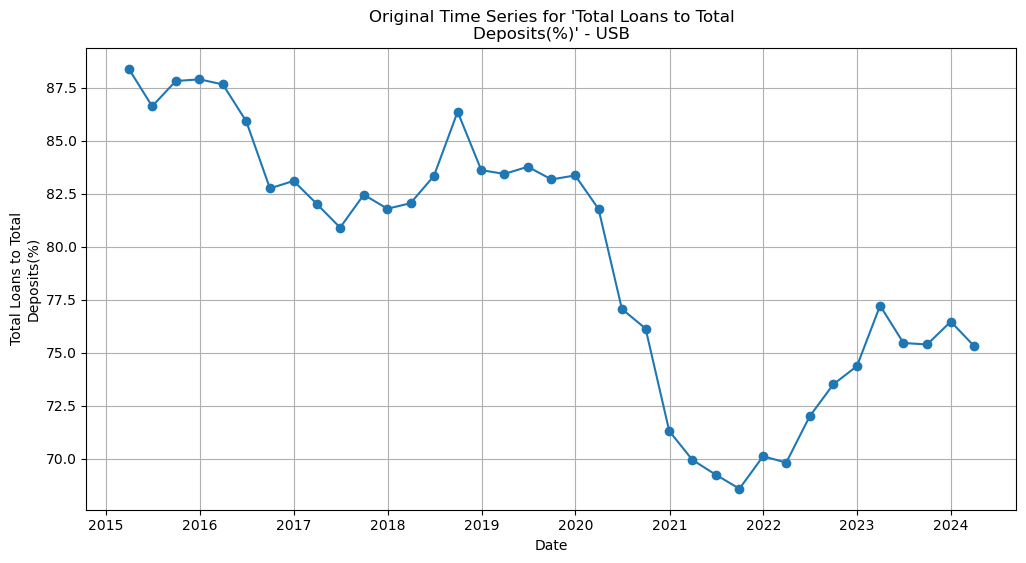


Plotting ACF and PACF to determine initial AR and MA terms.


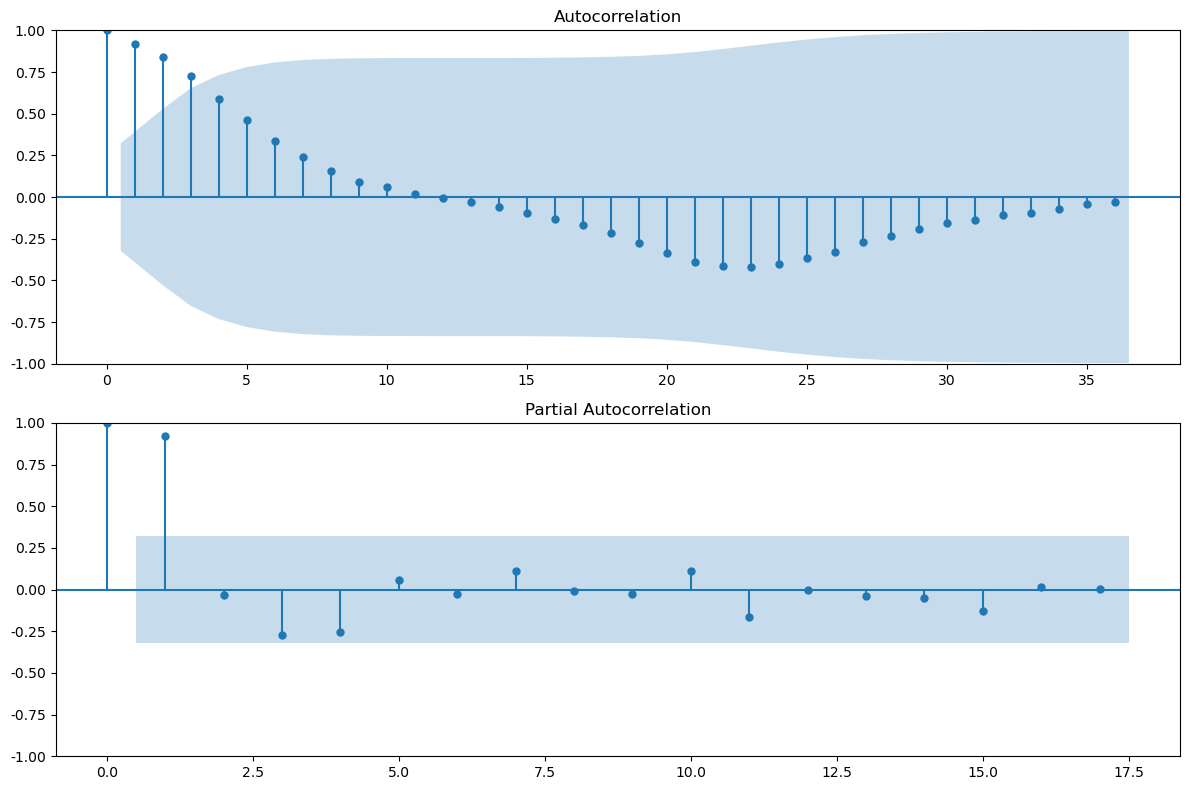

ACF and PACF plots displayed. Proceeding with automated ARIMA parameter selection based on AIC.

Fitting ARIMA model for 'Total Loans to Total
Deposits(%)'
Best ARIMA order for 'Total Loans to Total
Deposits(%)': (0, 1, 0)

Plotting ACF of residuals.


<Figure size 1000x500 with 0 Axes>

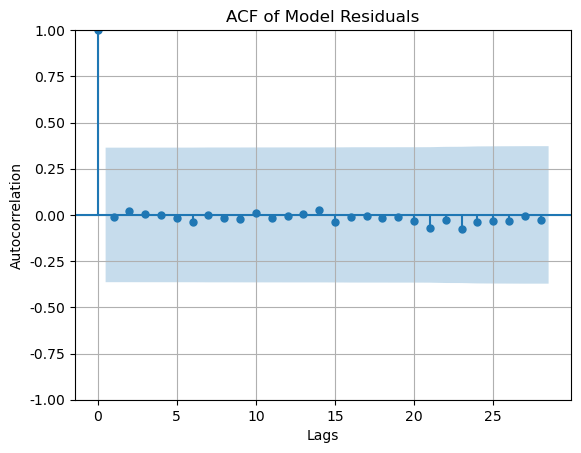


Performing Ljung-Box test on residuals.
     lb_stat  lb_pvalue
10  0.128861        1.0
11  0.143628        1.0
12  0.145550        1.0
13  0.146396        1.0
14  0.183270        1.0
15  0.278870        1.0
16  0.289561        1.0
17  0.291745        1.0
18  0.320649        1.0
19  0.331895        1.0
20  0.428715        1.0
Residuals appear to be white noise.

RMSE for USB: 8.606272166245397
MAPE for USB: 10.77778962802196%


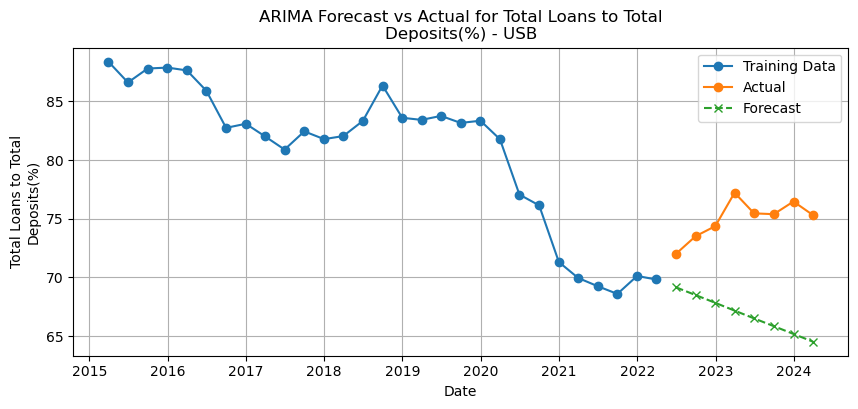


Processing bank: FRCB


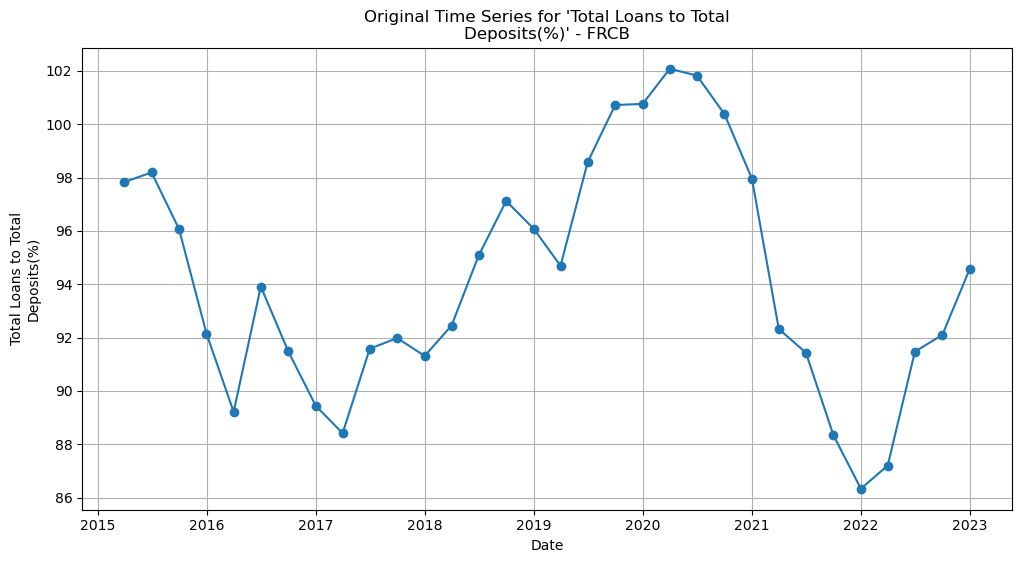


Plotting ACF and PACF to determine initial AR and MA terms.


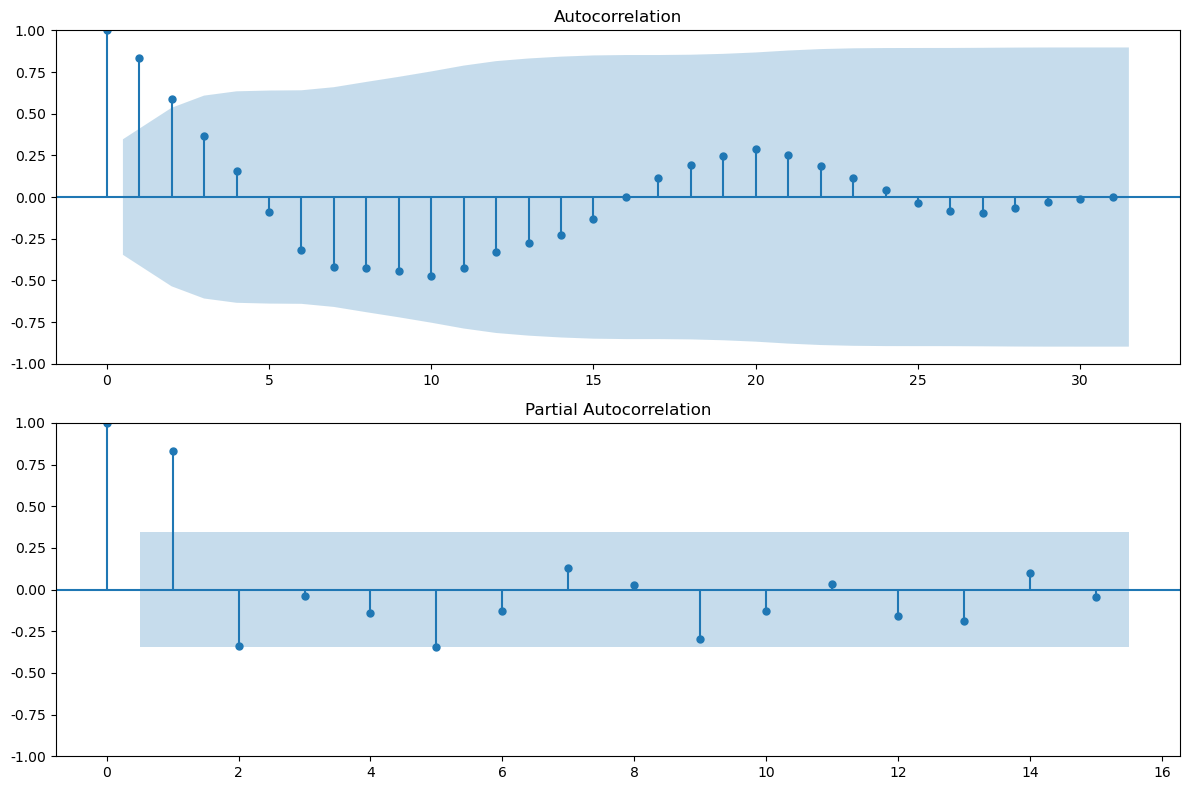

ACF and PACF plots displayed. Proceeding with automated ARIMA parameter selection based on AIC.

Fitting ARIMA model for 'Total Loans to Total
Deposits(%)'
Best ARIMA order for 'Total Loans to Total
Deposits(%)': (1, 0, 1)

Plotting ACF of residuals.


<Figure size 1000x500 with 0 Axes>

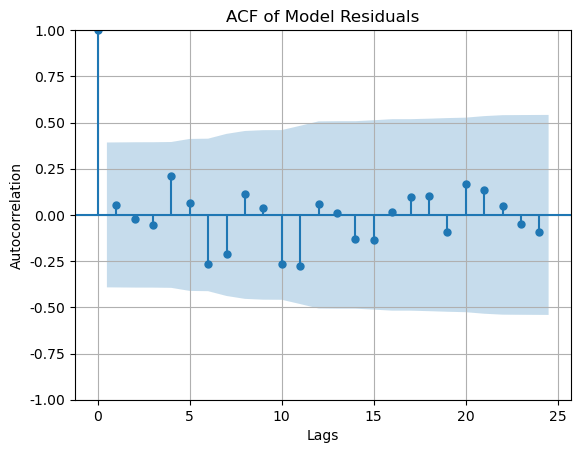


Performing Ljung-Box test on residuals.
      lb_stat  lb_pvalue
10   9.758847   0.461899
11  13.476154   0.263346
12  13.642376   0.324126
13  13.646749   0.399183
14  14.695879   0.399255
15  15.983469   0.383151
16  15.997238   0.453154
17  16.756413   0.470984
18  17.813715   0.467987
19  18.722347   0.474773
20  22.583083   0.309726
Residuals appear to be white noise.

RMSE for FRCB: 4.19897700245616
MAPE for FRCB: 3.726671677583172%


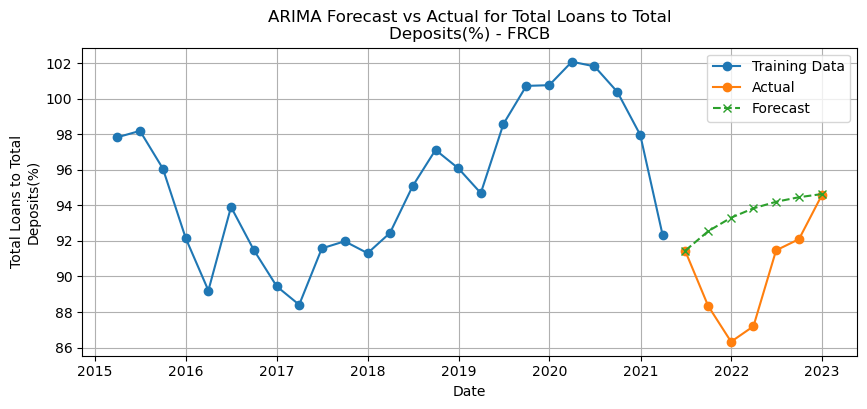


Processing bank: FCNCA


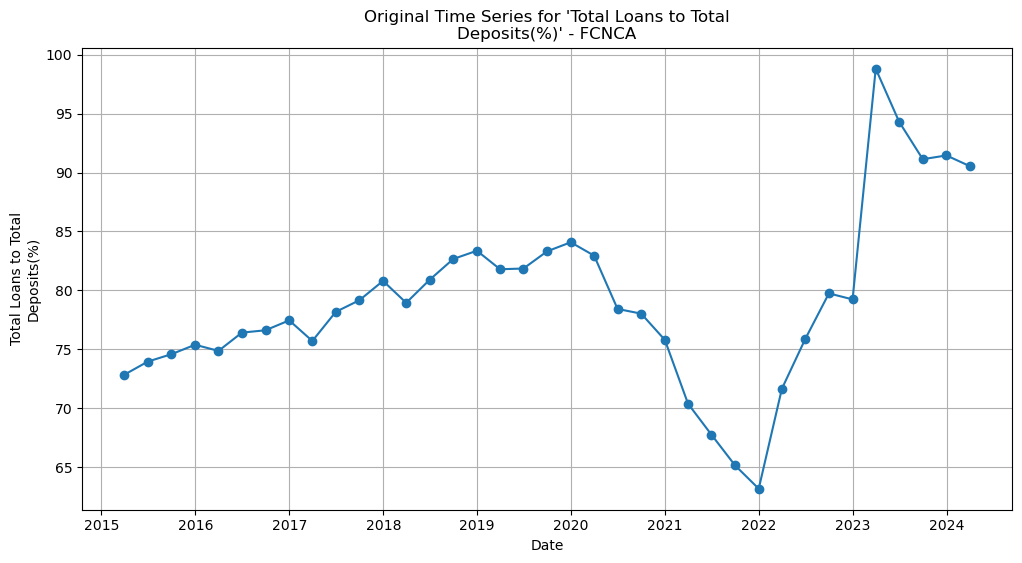


Plotting ACF and PACF to determine initial AR and MA terms.


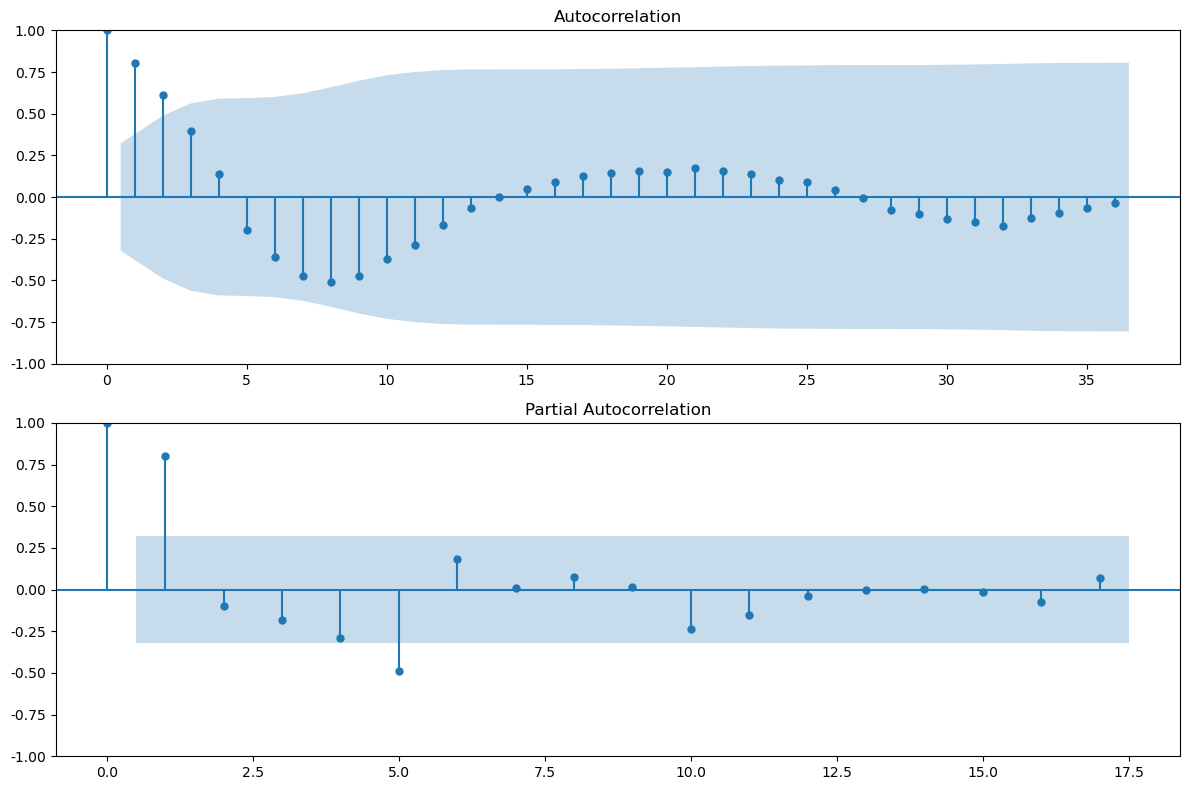

ACF and PACF plots displayed. Proceeding with automated ARIMA parameter selection based on AIC.

Fitting ARIMA model for 'Total Loans to Total
Deposits(%)'
Best ARIMA order for 'Total Loans to Total
Deposits(%)': (2, 0, 0)

Plotting ACF of residuals.


<Figure size 1000x500 with 0 Axes>

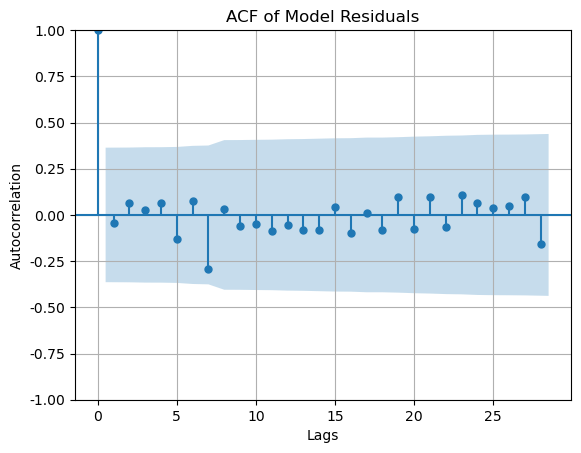


Performing Ljung-Box test on residuals.
     lb_stat  lb_pvalue
10  5.048907   0.887887
11  5.411754   0.909599
12  5.575690   0.935945
13  5.931660   0.948605
14  6.310352   0.958052
15  6.431535   0.971552
16  7.127126   0.970732
17  7.136548   0.981711
18  7.677520   0.983060
19  8.543521   0.980317
20  9.142306   0.981200
Residuals appear to be white noise.

RMSE for FCNCA: 12.341252745638286
MAPE for FCNCA: 10.608832369329521%


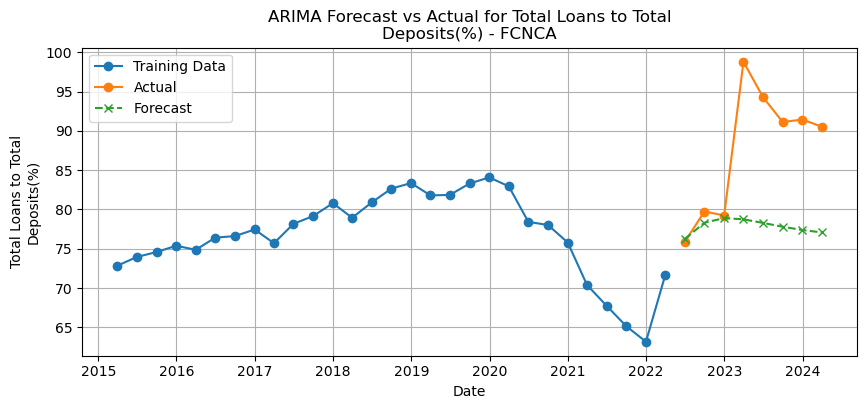


Processing bank: FIFTH


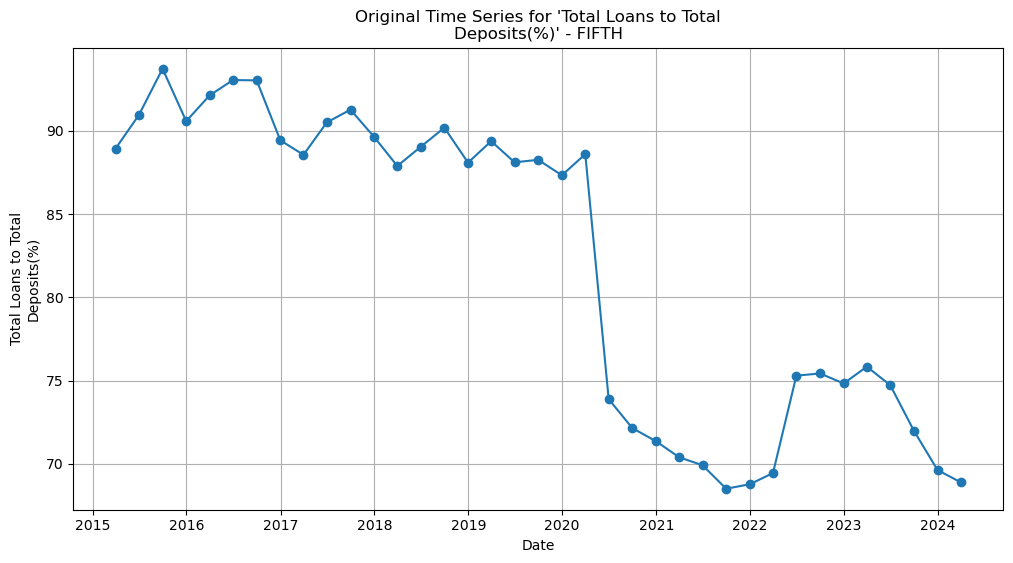


Plotting ACF and PACF to determine initial AR and MA terms.


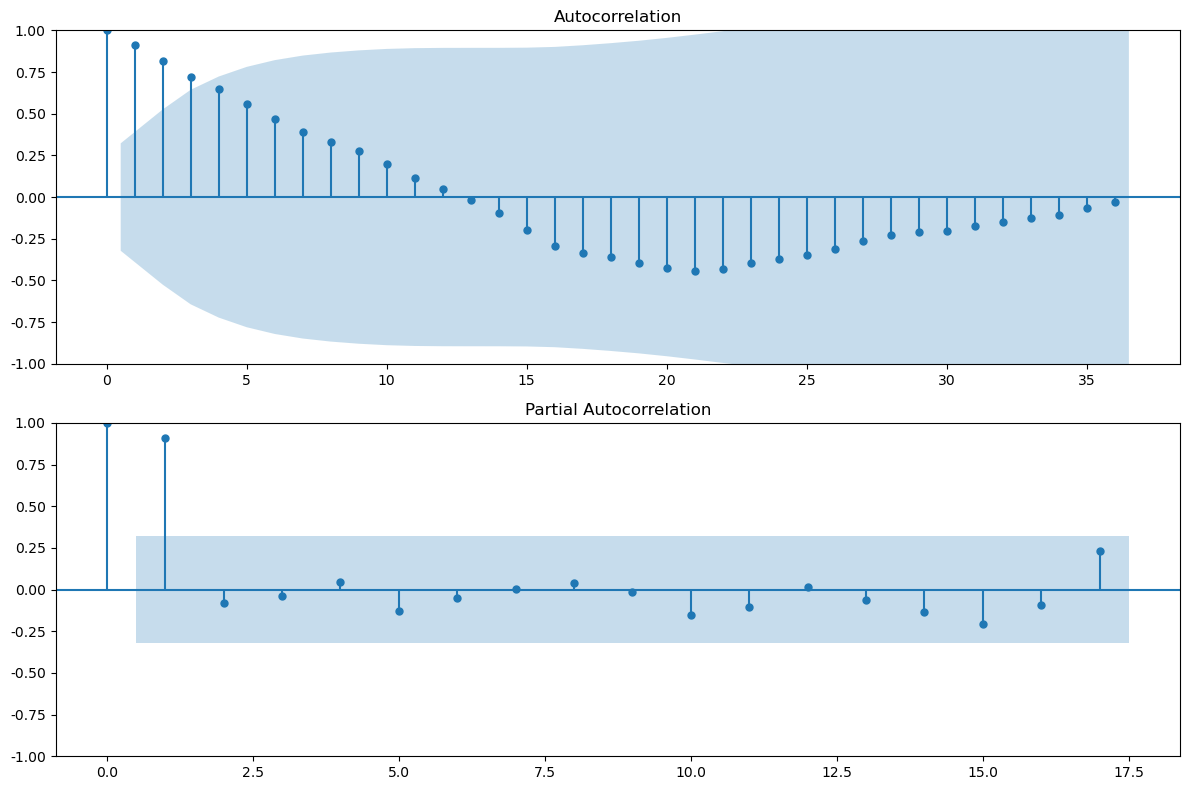

ACF and PACF plots displayed. Proceeding with automated ARIMA parameter selection based on AIC.

Fitting ARIMA model for 'Total Loans to Total
Deposits(%)'
Best ARIMA order for 'Total Loans to Total
Deposits(%)': (0, 1, 0)

Plotting ACF of residuals.


<Figure size 1000x500 with 0 Axes>

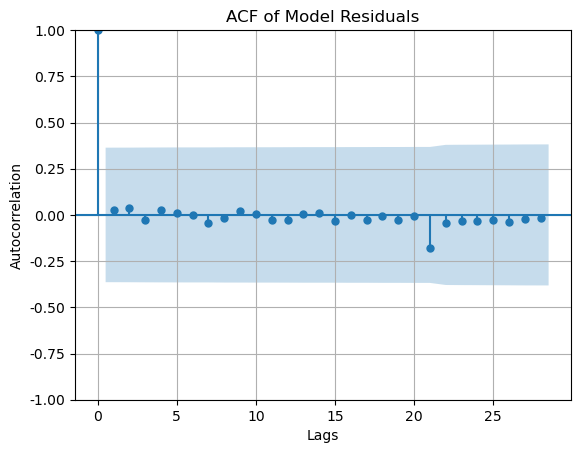


Performing Ljung-Box test on residuals.
     lb_stat  lb_pvalue
10  0.229487        1.0
11  0.263911        1.0
12  0.309877        1.0
13  0.310290        1.0
14  0.316013        1.0
15  0.385503        1.0
16  0.385677        1.0
17  0.453466        1.0
18  0.456497        1.0
19  0.527663        1.0
20  0.530172        1.0
Residuals appear to be white noise.

RMSE for FIFTH: 4.6695208533638635
MAPE for FIFTH: 5.372146244564859%


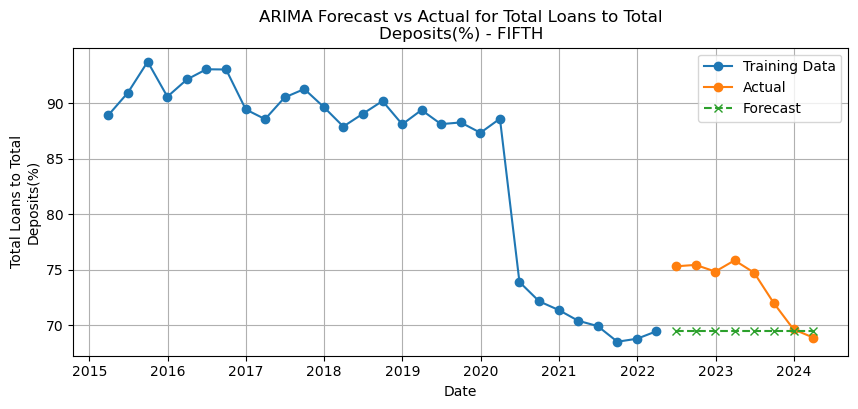

In [286]:
# Create a dictionary to store each bank's data
bank_data_dict = {
    'USB': USB_combined,
    'FRCB': FRCB_combined,
    'FCNCA': FCNCA_combined,
    'FIFTH': FIFTH_combined,
    #'WFC': WFC_combined,
    # Add more banks as needed
}

# Process each bank
for bank_name, data in bank_data_dict.items():
    perform_arima_analysis_2(bank_name, data)

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.api import OLS, add_constant
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, acorr_breusch_godfrey
from statsmodels.stats.stattools import durbin_watson

def perform_OLS_analysis(bank_name, data, target_col='Total Loans to Total\nDeposits(%)'):
    """
    Perform OLS regression analysis with tests for heteroscedasticity and serial correlation.
    
    Parameters:
    - bank_name (str): Name of the bank being analyzed.
    - data (pd.DataFrame): DataFrame containing the time series data with a datetime index.
    - target_col (str): The column name to be used as the dependent variable.
    
    Returns:
    - None
    """
    print(f"\nProcessing bank: {bank_name}")
    
    # Suppress warnings for cleaner output
    warnings.filterwarnings("ignore")
    
    # Step 1: Data Preparation
    try:
        # Ensure the index is datetime
        data.index = pd.to_datetime(data.index, dayfirst=True, errors='coerce')
        data = data.dropna()
        print("Datetime index set successfully.")
    except Exception as e:
        print(f"Error converting index to datetime for {bank_name}: {e}")
        return
    
    try:
        # Data Cleaning: Convert all columns to numeric, remove commas, and drop NA
        data = data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
        data = data.dropna()
        print("Data cleaning completed successfully.")
    except Exception as e:
        print(f"Error during data cleaning for {bank_name}: {e}")
        return
    
    # Step 2: Check if Target Column Exists
    if target_col not in data.columns:
        print(f"Target column '{target_col}' not found in data for {bank_name}. Skipping.")
        return
    
    # Step 3: Ensure Sufficient Data
    n_obs = len(data)
    if n_obs < 30:
        print(f"Not enough observations (found {n_obs}) for {bank_name}. Minimum recommended is 30. Skipping.")
        return
    
    # Step 4: Select Predictor Variables (All except target)
    predictor_cols = [col for col in data.columns if col != target_col]
    if not predictor_cols:
        print(f"No predictor variables found for {bank_name}. Skipping.")
        return
    
    X = data[predictor_cols]
    y = data[target_col]
    
    # Step 5: Train-Test Split (80% Train, 20% Test)
    train_size = int(0.8 * n_obs)
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
    print(f"Data split into {train_size} training and {n_obs - train_size} testing observations.")
    
    # Step 6: Add Constant to Predictor Variables for Intercept
    X_train_const = add_constant(X_train)
    X_test_const = add_constant(X_test)
    
    # Step 7: Fit the OLS Model
    try:
        ols_model = OLS(y_train, X_train_const).fit()
        #print("\nOLS Model Summary:")
        #print(ols_model.summary())
    except Exception as e:
        print(f"Error fitting OLS model for {bank_name}: {e}")
        return
    
    # Step 8: Perform Diagnostic Tests

    # Heteroscedasticity Tests
    try:
        # Breusch-Pagan test
        bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)
        bp_lm_stat, bp_lm_pvalue, bp_f_stat, bp_f_pvalue = bp_test
        print(f"\nBreusch-Pagan test p-value: {bp_f_pvalue:.4f}")
        
        # White's test
        white_test = het_white(ols_model.resid, ols_model.model.exog)
        w_lm_stat, w_lm_pvalue, w_f_stat, w_f_pvalue = white_test
        print(f"White's test p-value: {w_f_pvalue:.4f}")
        
        if bp_f_pvalue < 0.05 or w_f_pvalue < 0.05:
            print("Heteroscedasticity detected. Using robust standard errors.")
            robust_errors = 'HC3'  # Alternative options: 'HC0', 'HC1', 'HC2', 'HC3'
        else:
            print("No heteroscedasticity detected.")
            robust_errors = None
    except Exception as e:
        print(f"Error during heteroscedasticity tests for {bank_name}: {e}")
        robust_errors = None
    
    # Serial Correlation Tests
    try:
        # Durbin-Watson test
        dw_stat = durbin_watson(ols_model.resid)
        print(f"Durbin-Watson statistic: {dw_stat:.4f}")
        
        # Breusch-Godfrey test
        bg_test = acorr_breusch_godfrey(ols_model, nlags=1)
        bg_lm_stat, bg_lm_pvalue, bg_f_stat, bg_f_pvalue = bg_test
        print(f"Breusch-Godfrey test p-value: {bg_lm_pvalue:.4f}")
        
        if bg_lm_pvalue < 0.05:
            print("Serial correlation detected.")
            # Consider using Newey-West standard errors or other corrections
            # For simplicity, we'll adjust standard errors for both heteroscedasticity and autocorrelation
            if robust_errors is not None:
                robust_errors = 'HAC'
            else:
                robust_errors = 'HAC'
        else:
            print("No serial correlation detected.")
    except Exception as e:
        print(f"Error during serial correlation tests for {bank_name}: {e}")
    
    # Step 9: Refit the OLS Model with Robust Standard Errors if Needed
    if robust_errors:
        try:
            ols_model = OLS(y_train, X_train_const).fit(cov_type=robust_errors, cov_kwds={'maxlags':1})
            print(f"\nOLS Model refitted with robust standard errors ({robust_errors}).")
            #print(ols_model.summary())
        except Exception as e:
            print(f"Error refitting OLS model with robust errors for {bank_name}: {e}")
            return
    
    # Step 10: Forecasting
    try:
        y_pred = ols_model.predict(X_test_const)
        print(f"\nGenerated predictions for {len(y_pred)} testing observations.")
    except Exception as e:
        print(f"Error during forecasting for {bank_name}: {e}")
        return
    
    # Step 11: Evaluate Model Performance
    try:
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        # Handle cases where actual value is zero to avoid division by zero
        non_zero = y_test != 0
        if non_zero.any():
            mape = mean_absolute_percentage_error(y_test[non_zero], y_pred[non_zero]) * 100
        else:
            mape = np.nan
        print(f"\nRMSE for {bank_name}: {rmse:.4f}")
        if not np.isnan(mape):
            print(f"MAPE for {bank_name}: {mape:.2f}%")
        else:
            print(f"MAPE for {bank_name}: Not defined (all actual values are zero).")
    except Exception as e:
        print(f"Error during model evaluation for {bank_name}: {e}")
        return
    
    # Step 12: Plot Actual vs Predicted
    try:
        plt.figure(figsize=(12,6))
        plt.plot(y_train.index, y_train, label='Training Data', marker='o')
        plt.plot(y_test.index, y_test, label='Actual', marker='o')
        plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--', marker='x')
        plt.title(f"OLS Forecast vs Actual for {bank_name}")
        plt.xlabel('Date')
        plt.ylabel(target_col)
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error during plotting for {bank_name}: {e}")
        return



Processing bank: USB
Datetime index set successfully.
Data cleaning completed successfully.
Data split into 29 training and 8 testing observations.

Breusch-Pagan test p-value: 0.1332
White's test p-value: 0.4366
No heteroscedasticity detected.
Durbin-Watson statistic: 0.9565
Breusch-Godfrey test p-value: 0.0066
Serial correlation detected.

OLS Model refitted with robust standard errors (HAC).

Generated predictions for 8 testing observations.

RMSE for USB: 14.3546
MAPE for USB: 15.04%


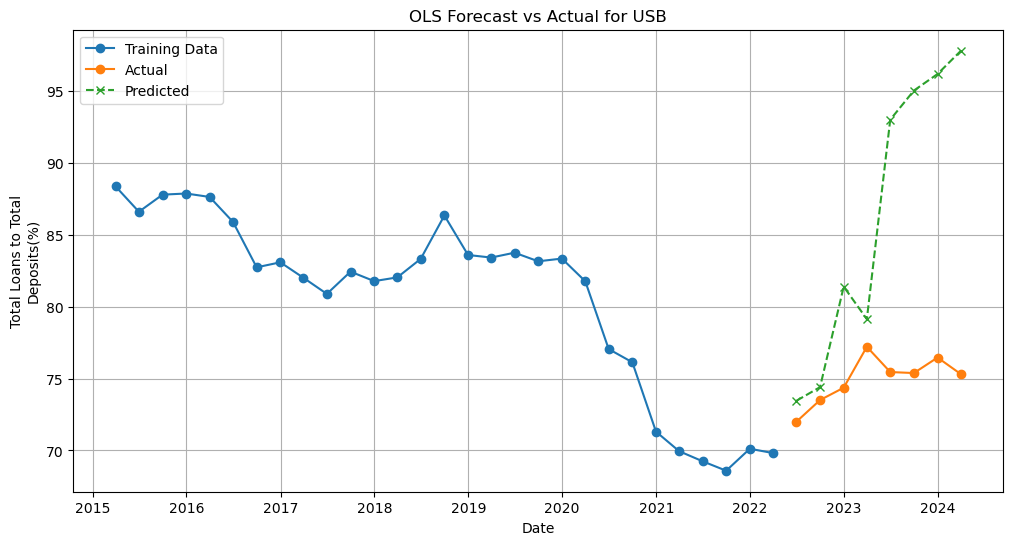


Processing bank: FRCB
Datetime index set successfully.
Data cleaning completed successfully.
Data split into 25 training and 7 testing observations.

Breusch-Pagan test p-value: 0.0854
White's test p-value: 0.7877
No heteroscedasticity detected.
Durbin-Watson statistic: 1.0576
Breusch-Godfrey test p-value: 0.0294
Serial correlation detected.

OLS Model refitted with robust standard errors (HAC).

Generated predictions for 7 testing observations.

RMSE for FRCB: 4.0548
MAPE for FRCB: 4.16%


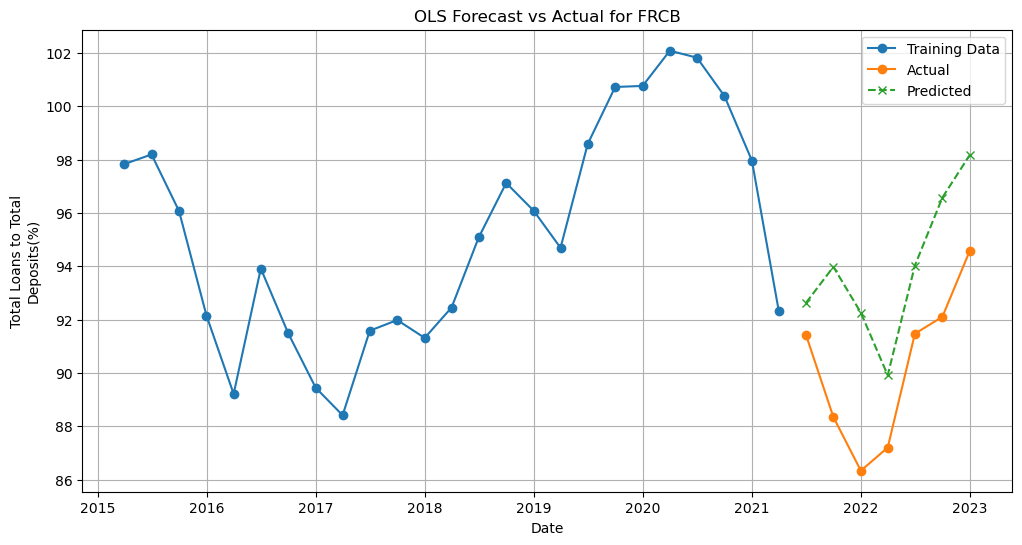


Processing bank: FCNCA
Datetime index set successfully.
Data cleaning completed successfully.
Data split into 29 training and 8 testing observations.

Breusch-Pagan test p-value: 0.0000
White's test p-value: 0.0000
Heteroscedasticity detected. Using robust standard errors.
Durbin-Watson statistic: 1.0869
Breusch-Godfrey test p-value: 0.0010
Serial correlation detected.

OLS Model refitted with robust standard errors (HAC).

Generated predictions for 8 testing observations.

RMSE for FCNCA: 5.0369
MAPE for FCNCA: 5.08%


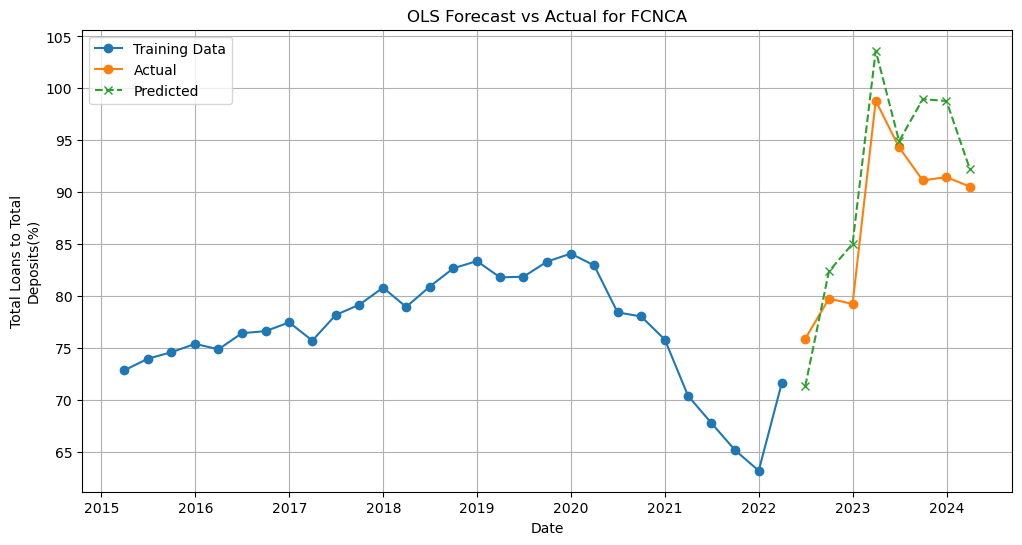


Processing bank: FIFTH
Datetime index set successfully.
Data cleaning completed successfully.
Data split into 29 training and 8 testing observations.

Breusch-Pagan test p-value: 0.1994
White's test p-value: 0.0022
Heteroscedasticity detected. Using robust standard errors.
Durbin-Watson statistic: 1.5742
Breusch-Godfrey test p-value: 0.2875
No serial correlation detected.
Error refitting OLS model with robust errors for FIFTH: heteroscedasticity robust covariance does not use keywords

Processing bank: WFC
Datetime index set successfully.
Data cleaning completed successfully.
Data split into 29 training and 8 testing observations.

Breusch-Pagan test p-value: 0.7083
White's test p-value: 0.0000
Heteroscedasticity detected. Using robust standard errors.
Durbin-Watson statistic: 1.7119
Breusch-Godfrey test p-value: 0.4924
No serial correlation detected.
Error refitting OLS model with robust errors for WFC: heteroscedasticity robust covariance does not use keywords

Processing bank: Amer

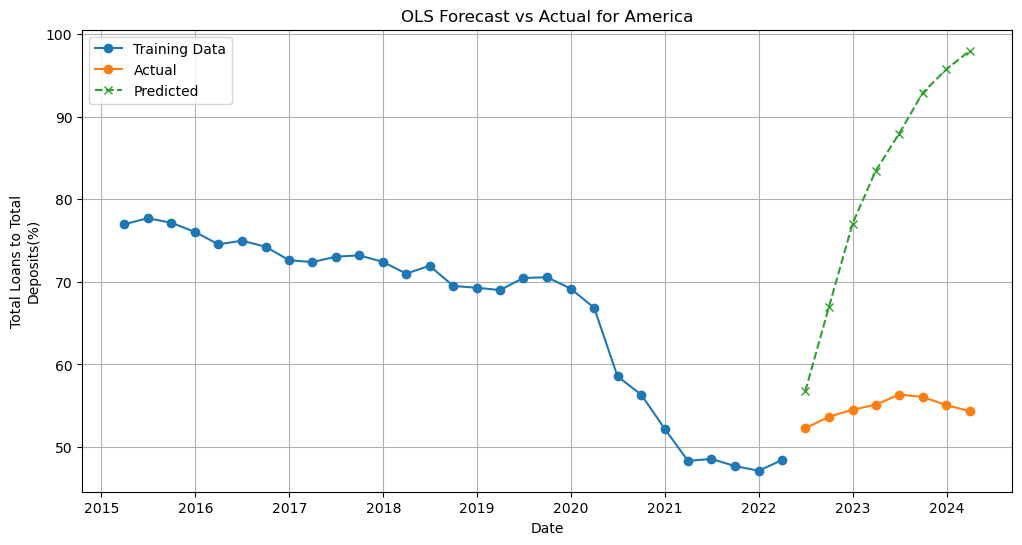


Processing bank: Citizens
Datetime index set successfully.
Data cleaning completed successfully.
Data split into 29 training and 8 testing observations.

Breusch-Pagan test p-value: 0.2339
White's test p-value: 0.0140
Heteroscedasticity detected. Using robust standard errors.
Durbin-Watson statistic: 1.4656
Breusch-Godfrey test p-value: 0.3591
No serial correlation detected.
Error refitting OLS model with robust errors for Citizens: heteroscedasticity robust covariance does not use keywords

Processing bank: JPM
Datetime index set successfully.
Data cleaning completed successfully.
Data split into 29 training and 8 testing observations.

Breusch-Pagan test p-value: 0.2339
White's test p-value: 0.0140
Heteroscedasticity detected. Using robust standard errors.
Durbin-Watson statistic: 1.4656
Breusch-Godfrey test p-value: 0.3591
No serial correlation detected.
Error refitting OLS model with robust errors for JPM: heteroscedasticity robust covariance does not use keywords


In [234]:
# Create a dictionary to store each bank's data
bank_data_dict = {
    'USB': USB_combined,
    'FRCB': FRCB_combined,
    'FCNCA': FCNCA_combined,
    'FIFTH': FIFTH_combined,
    'WFC': WFC_combined,
    'America': America_combined,
    'Citizens': Citizens_combined,
    'JPM': JPM_combined
    # Add more banks as needed
}

# Process each bank
for bank_name, data in bank_data_dict.items():
    perform_OLS_analysis(bank_name, data)

In [208]:
def determine_cointegration_rank(data, det_order=0, k_ar_diff=1, significance_level=0.05):

    # Perform the Johansen cointegration test
    johansen_test = coint_johansen(data, det_order=det_order, k_ar_diff=k_ar_diff)
    
    # Map significance levels to column indices in critical values
    significance_levels = {0.10: 0, 0.05: 1, 0.01: 2}
    if significance_level not in significance_levels:
        raise ValueError(f"Significance level must be one of {list(significance_levels.keys())}")
    col_index = significance_levels[significance_level]
    
    # Extract trace statistics and critical values at the specified significance level
    trace_stats = johansen_test.lr1
    trace_crit_values = johansen_test.cvt[:, col_index]
    
    # Determine the cointegration rank
    for i, (stat, crit_value) in enumerate(zip(trace_stats, trace_crit_values)):
        if stat < crit_value:
            # Fail to reject null hypothesis at rank i
            r = i
            break
    else:
        # If all null hypotheses are rejected, cointegration rank is maximum possible
        r = len(trace_stats)
    
#     # Determine the rank by comparing trace statistics with critical values
#     r = sum(trace_stats > trace_crit_values)
    
    return r


In [199]:
def determine_cointegration_rank(data, det_order=0, k_ar_diff=1, significance_level=0.05):
    # Johansen test for cointegration
    johansen_test = coint_johansen(data, det_order=det_order, k_ar_diff=k_ar_diff)
    
    # Trace test statistics and critical values
    trace_stats = johansen_test.lr1
    trace_crit_values = johansen_test.cvt[:, 1]  # Critical values at 5% significance level
    
    # Determine the rank by comparing trace statistics with critical values
    r = sum(trace_stats > trace_crit_values)
    
    return r

In [229]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_order, coint_johansen
from sklearn.metrics import mean_squared_error

def perform_vecm_analysis_3(bank_name, data):
    print(f"\nProcessing bank: {bank_name}")
    
    # Ensure the index is datetime
    data.index = pd.to_datetime(data.index, dayfirst=True, errors='coerce')
    data = data.dropna()
    
    # Data Cleaning
    data = data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
    data = data.dropna()
    
    # Select key variables to reduce model complexity
    #key_vars = ['UN RATE', 'FEDFUNDS', 'Reserve for Loan\nLosses(millions)']
    #data_subset = data[key_vars]
       
    # Train-Test Split
    n_obs = len(data)
    if n_obs < 15:
        print(f"Not enough observations for {bank_name} after differencing. Skipping.")
        return
    train_size = int(0.8 * n_obs)
    train_data = data.iloc[:train_size]
    test_data = data.iloc[train_size:]
    
#     # Optimal Lag Selection with maxlags=1
#     maxlags = 1
#     try:
#         vecm_order_selection = select_order(train_data, maxlags=maxlags, deterministic='nc')
#         optimal_lag = vecm_order_selection.selected_orders['aic']
#     except Exception as e:
#         print(f"Error during lag selection for {bank_name}: {e}")
#         return
#     print(f"\nSelected optimal lag order for {bank_name}: {optimal_lag}")

    n_obs = len(data)
    k = data.shape[1]  # Number of variables
    if n_obs < 15:
        print(f"Not enough observations (found {n_obs}) for {bank_name}. Minimum recommended is 15. Skipping.")
        return

    # Calculate maxlags dynamically
    calculated_maxlags = max(1, int(n_obs / (2 * k)))
    maxlags = min(calculated_maxlags, 15)
    
    # Select optimal lag using the same criterion for both models
    information_criterion = 'bic'  # or 'aic' based on your preference
    
    # For VAR model
    try:
        var_model = VAR(train_data)
        lag_order_results = var_model.select_order(maxlags=maxlags)
        optimal_lag = lag_order_results.selected_orders[information_criterion]
        print(f"Selected optimal lag order for VAR based on {information_criterion.upper()}: {optimal_lag}")
    except Exception as e:
        print(f"Error during VAR lag order selection: {e}")
        return
    
    # Cointegration Rank Determination
    try:
        r_value = determine_cointegration_rank(train_data, det_order=1, k_ar_diff=optimal_lag)
    except np.linalg.LinAlgError:
        print(f"Matrix not positive definite with optimal lag for {bank_name}; retrying with k_ar_diff=1.")
        try:
            r_value = determine_cointegration_rank(train_data, det_order=1, k_ar_diff=1)
        except Exception as e:
            print(f"Cointegration rank determination failed for {bank_name}: {e}")
            return
    print(f"\nCointegration Rank (r) for {bank_name}: {r_value}")
    
    # Determine Model Type
    model_type = determine_model_to_use(train_data, r_value)
    print(f"\nSuggested Model Type for {bank_name}: {model_type}")
    
    # Apply VECM or VAR Model
    if model_type == "VECM model":
        try:
            vecm_model = VECM(train_data, k_ar_diff=optimal_lag, coint_rank=r_value, deterministic='ct')
            vecm_fit = vecm_model.fit()
            #print(vecm_fit.summary())
        except Exception as e:
            print(f"Error fitting VECM model for {bank_name}: {e}")
            return
#     elif model_type == "VAR model on differenced data":
#         try:
# #             from statsmodels.tsa.api import VAR
# #             var_model = VAR(train_data)
# #             var_fit = var_model.fit(maxlags=optimal_lag)
# #             print(var_fit.summary())
            
# #             # Forecasting
# #             lag_order = var_fit.k_ar
# #             vecm_forecast = var_fit.forecast(train_data.values[-lag_order:], steps=len(test_data))
# #             vecm_forecast_df = pd.DataFrame(vecm_forecast, index=test_data.index, columns=train_data.columns)
# #         except Exception as e:
# #             print(f"Error fitting VAR model for {bank_name}: {e}")
# #             return



    else:
        print(f"Model type is not suitable for {bank_name}. Exiting.")
        return
    
    # Forecast and Evaluate
    if model_type == "VECM model":
        n_forecast = len(test_data)
        try:
            vecm_forecast = vecm_fit.predict(steps=n_forecast)
            vecm_forecast_df = pd.DataFrame(vecm_forecast, index=test_data.index, columns=train_data.columns)
        except Exception as e:
            print(f"Error during forecasting for {bank_name}: {e}")
            return
    
    # Compute RMSE and MAPE
    rmse = {}
    mape = {}
    
    for col in test_data.columns:
        actual = test_data[col]
        predicted = vecm_forecast_df[col]
        rmse[col] = np.sqrt(mean_squared_error(actual, predicted))
        non_zero_actual = actual != 0
        if non_zero_actual.any():
            mape[col] = np.mean(np.abs((actual[non_zero_actual] - predicted[non_zero_actual]) / actual[non_zero_actual])) * 100
        else:
            mape[col] = np.nan
    
    print(f"\nRMSE for {bank_name}:")
    for col in rmse:
        print(f"{col}: {rmse[col]}")
    
    print(f"\nMAPE for {bank_name}:")
    for col in mape:
        print(f"{col}: {mape[col]}%")
        
    # Step 9: Plot Actual vs Predicted for Each Variable
    try:
        for col in test_data.columns:
            plt.figure(figsize=(10,4))
            plt.plot(train_data.index, train_data[col], label='Training Data', marker='o')
            plt.plot(test_data.index, test_data[col], label='Actual', marker='o')
            plt.plot(vecm_forecast_df.index, vecm_forecast_df[col], label='Forecast', marker='x', linestyle='--')
            plt.title(f"VECM Forecast vs Actual for {col} - {bank_name}")
            plt.xlabel('Date')
            plt.ylabel(col)
            plt.legend()
            plt.grid(True)
            plt.show()
    except Exception as e:
        print(f"Error during plotting for {bank_name}: {e}")
        return



Processing bank: USB
Selected optimal lag order for VAR based on BIC: 3
Matrix not positive definite with optimal lag for USB; retrying with k_ar_diff=1.

Cointegration Rank (r) for USB: 6

Suggested Model Type for USB: VAR model on data in levels
Model type is not suitable for USB. Exiting.

Processing bank: FRCB
Selected optimal lag order for VAR based on BIC: 2

Cointegration Rank (r) for FRCB: 5

Suggested Model Type for FRCB: VECM model

RMSE for FRCB:
UN RATE: 8.072772455743495
FEDFUNDS: 5.08910330130808
Reserve for Loan
Losses(millions): 93.64364489300564
Provision for Loan Losses(millions): 48.50333786976513
Non-Performing Loans(millions): 162.5723880215586
Total Loans to Total
Deposits(%): 33.83578946696481

MAPE for FRCB:
UN RATE: 173.51549033814095%
FEDFUNDS: 1590.1561738616952%
Reserve for Loan
Losses(millions): 11.699113220123218%
Provision for Loan Losses(millions): 164.31671563039794%
Non-Performing Loans(millions): 117.15817999364096%
Total Loans to Total
Deposits(%): 

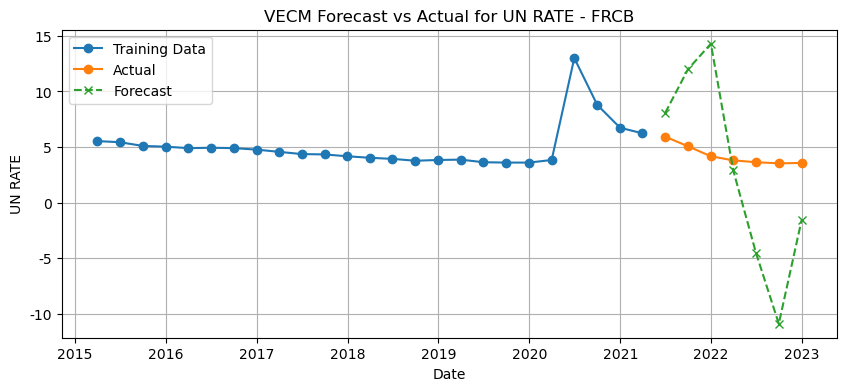

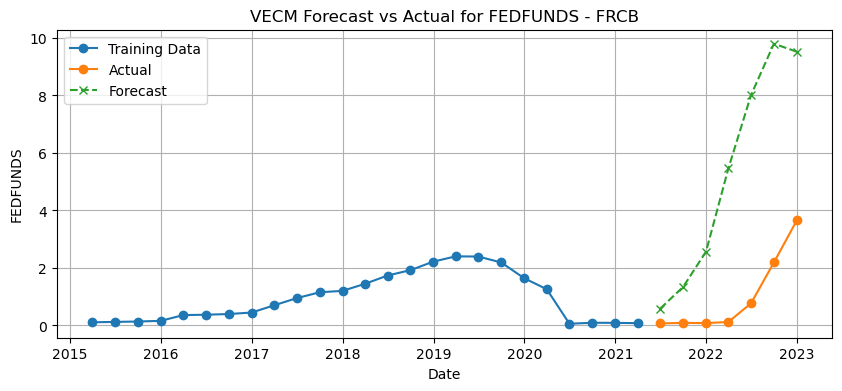

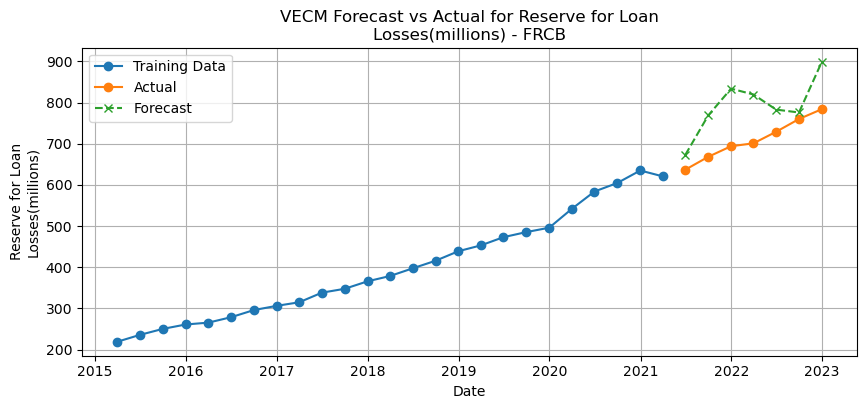

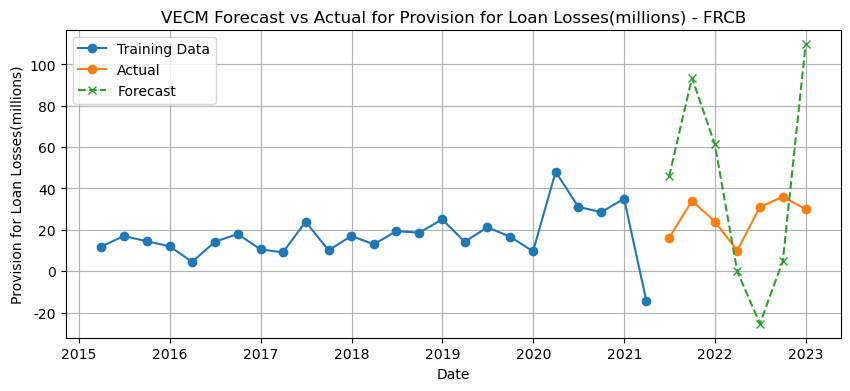

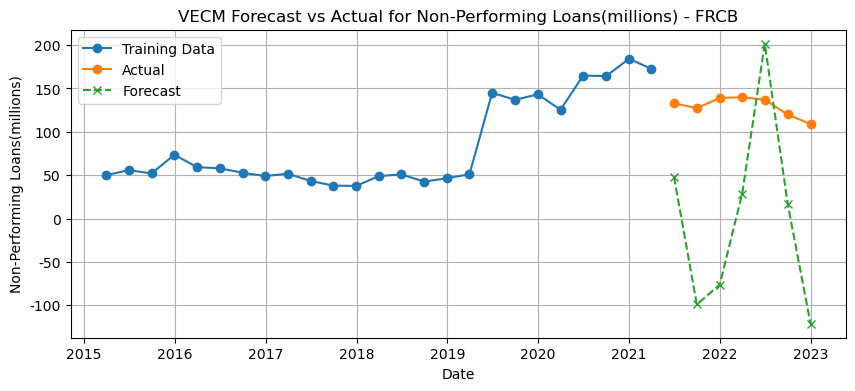

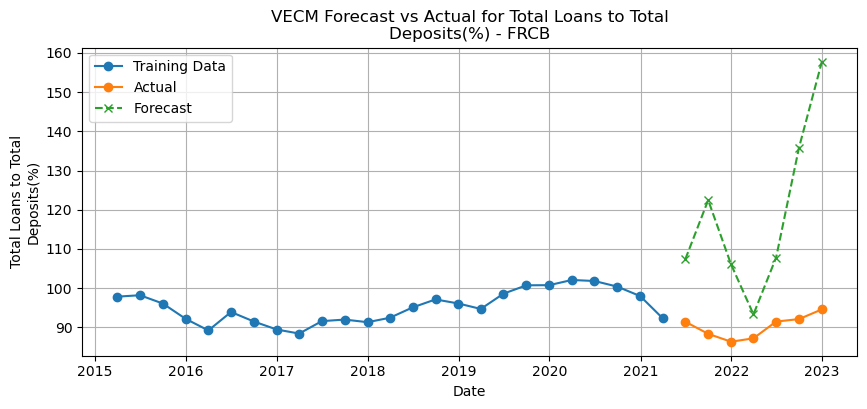


Processing bank: FCNCA
Selected optimal lag order for VAR based on BIC: 3
Matrix not positive definite with optimal lag for FCNCA; retrying with k_ar_diff=1.

Cointegration Rank (r) for FCNCA: 3

Suggested Model Type for FCNCA: VECM model
Error during forecasting for FCNCA: Cannot cast ufunc 'add' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Processing bank: FIFTH
Selected optimal lag order for VAR based on BIC: 3
Matrix not positive definite with optimal lag for FIFTH; retrying with k_ar_diff=1.

Cointegration Rank (r) for FIFTH: 6

Suggested Model Type for FIFTH: VAR model on data in levels
Model type is not suitable for FIFTH. Exiting.

Processing bank: WFC
Selected optimal lag order for VAR based on BIC: 3
Matrix not positive definite with optimal lag for WFC; retrying with k_ar_diff=1.

Cointegration Rank (r) for WFC: 2

Suggested Model Type for WFC: VECM model

RMSE for WFC:
UN RATE: 10.29993056823753
FEDFUNDS: 6.6079176439504135
Reserve for

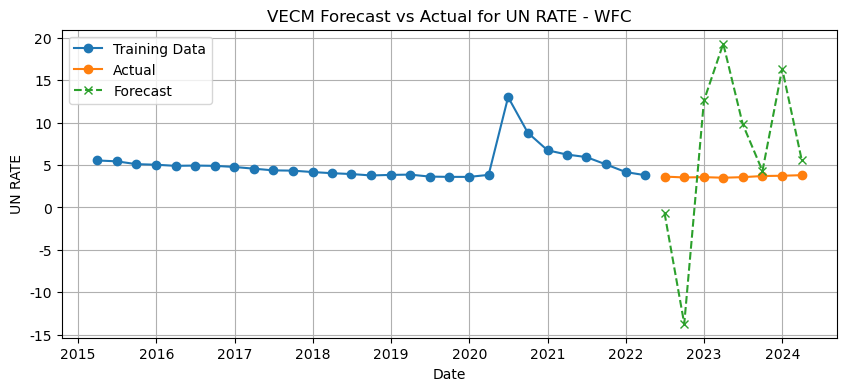

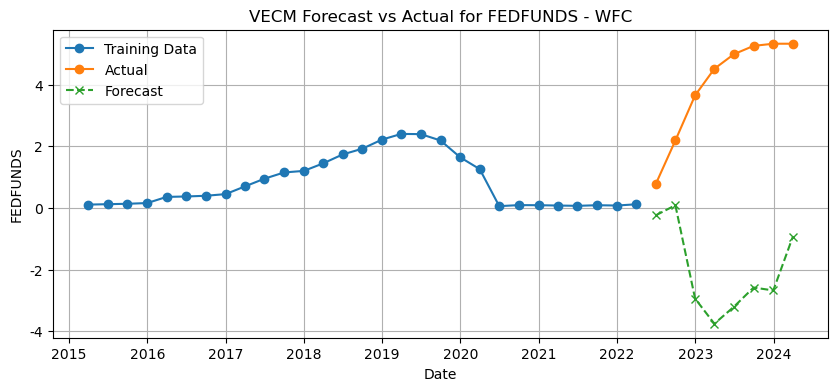

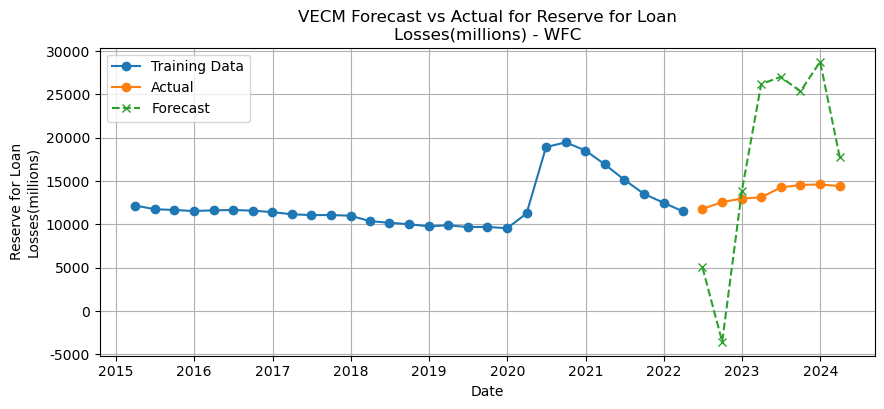

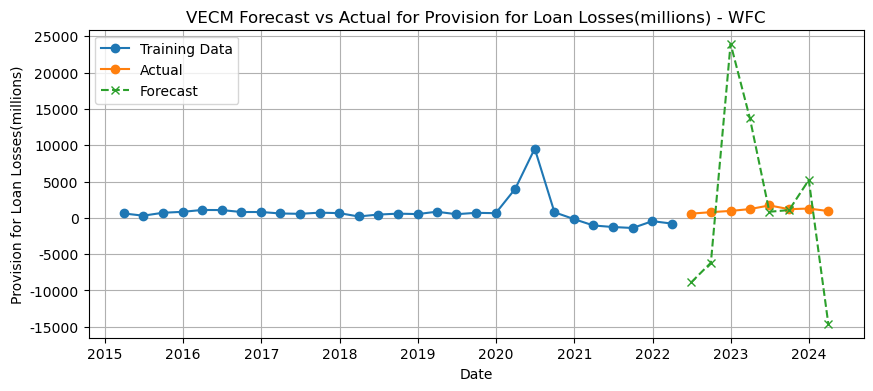

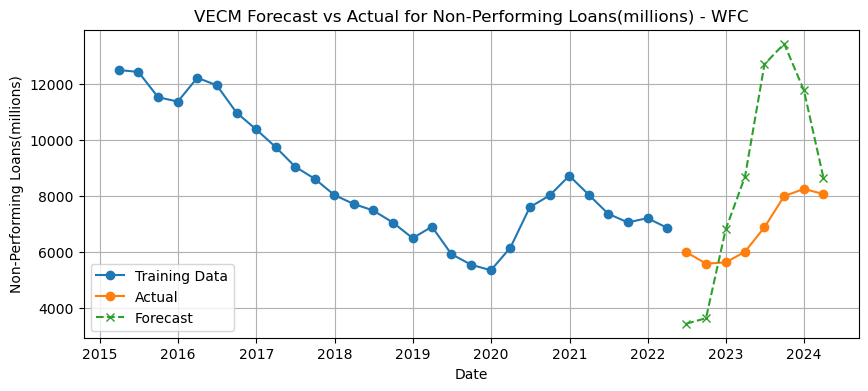

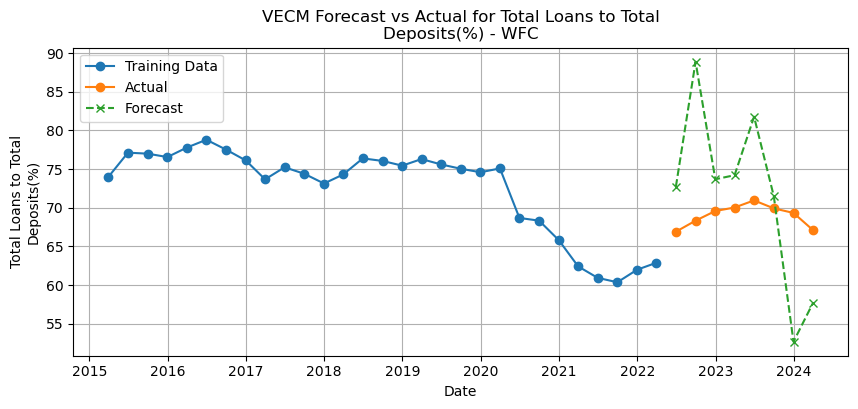


Processing bank: America
Selected optimal lag order for VAR based on BIC: 3

Cointegration Rank (r) for America: 6

Suggested Model Type for America: VAR model on data in levels
Model type is not suitable for America. Exiting.

Processing bank: Citizens
Selected optimal lag order for VAR based on BIC: 3
Matrix not positive definite with optimal lag for Citizens; retrying with k_ar_diff=1.

Cointegration Rank (r) for Citizens: 3

Suggested Model Type for Citizens: VECM model

RMSE for Citizens:
UN RATE: 9.410835348482978
FEDFUNDS: 9.217450266875273
Reserve for Loan
Losses(millions): 1479.022358706579
Provision for Loan Losses(millions): 546.4736451179074
Non-Performing Loans(millions): 698.6200466509035
Total Loans to Total
Deposits(%): 13.373837149490804

MAPE for Citizens:
UN RATE: 223.37500300458197%
FEDFUNDS: 225.62990547682716%
Reserve for Loan
Losses(millions): 63.354574265303775%
Provision for Loan Losses(millions): 315.92004539119625%
Non-Performing Loans(millions): 57.43481145

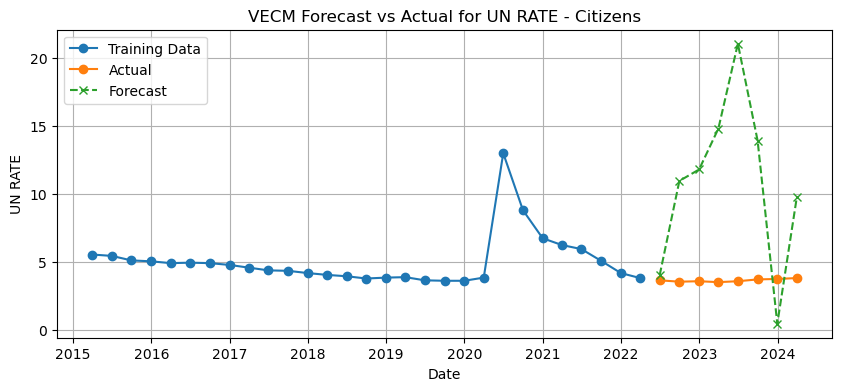

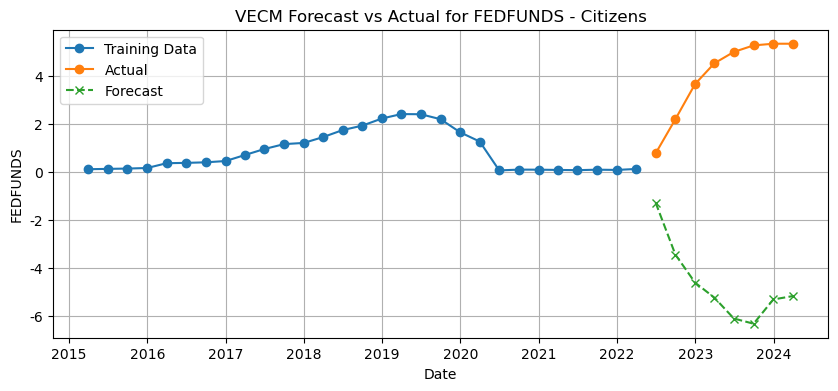

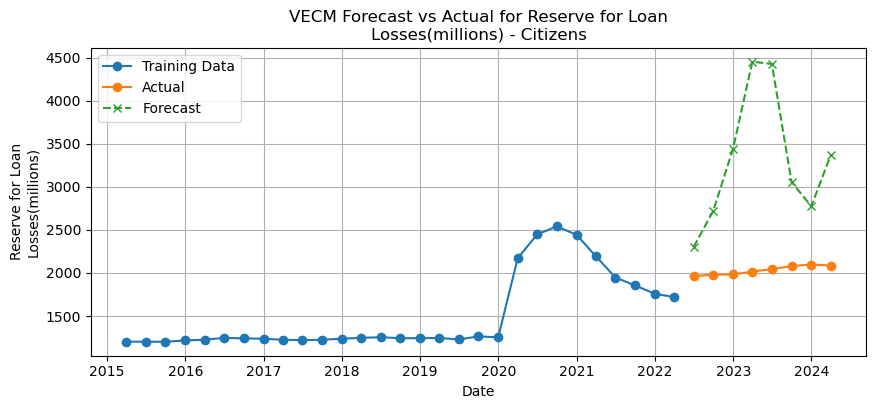

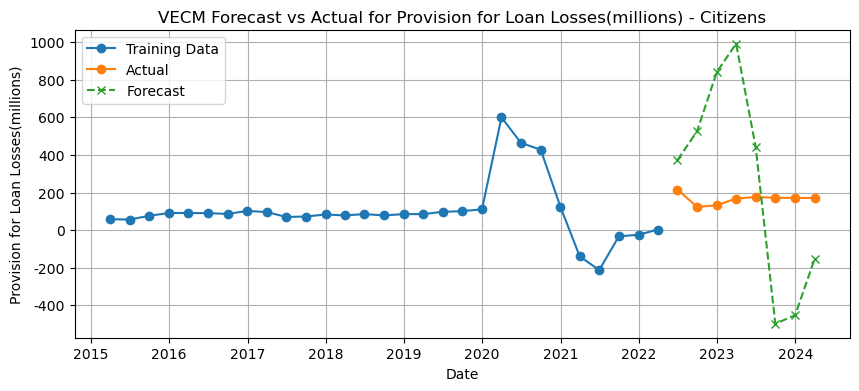

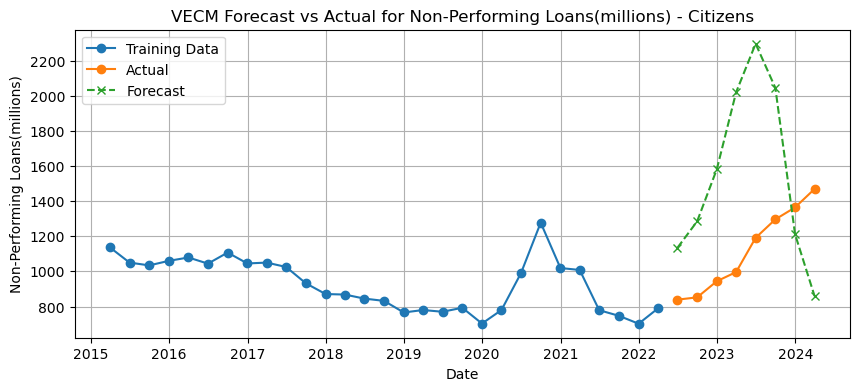

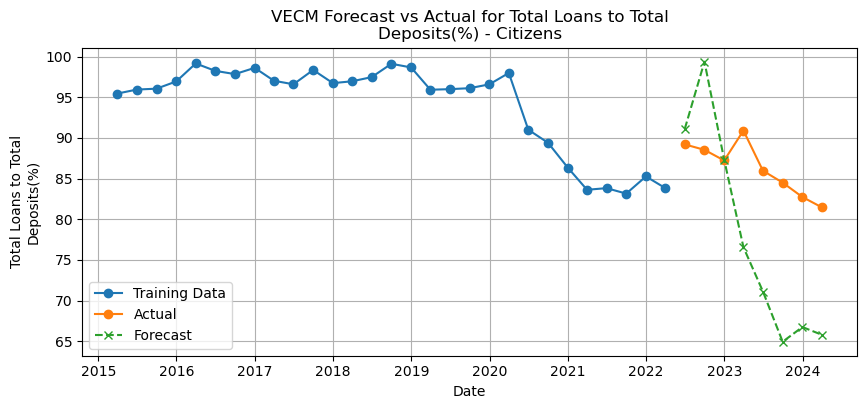


Processing bank: JPM
Selected optimal lag order for VAR based on BIC: 3
Matrix not positive definite with optimal lag for JPM; retrying with k_ar_diff=1.

Cointegration Rank (r) for JPM: 3

Suggested Model Type for JPM: VECM model

RMSE for JPM:
UN RATE: 9.410835348482978
FEDFUNDS: 9.217450266875273
Reserve for Loan
Losses(millions): 1479.022358706579
Provision for Loan Losses(millions): 546.4736451179074
Non-Performing Loans(millions): 698.6200466509035
Total Loans to Total
Deposits(%): 13.373837149490804

MAPE for JPM:
UN RATE: 223.37500300458197%
FEDFUNDS: 225.62990547682716%
Reserve for Loan
Losses(millions): 63.354574265303775%
Provision for Loan Losses(millions): 315.92004539119625%
Non-Performing Loans(millions): 57.43481145941727%
Total Loans to Total
Deposits(%): 13.654160501855827%


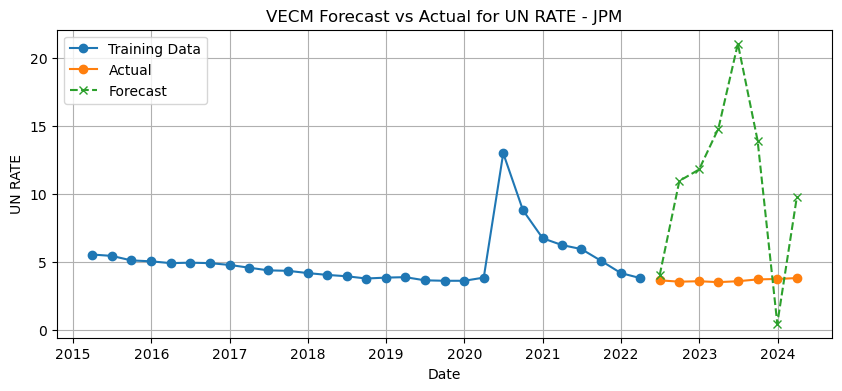

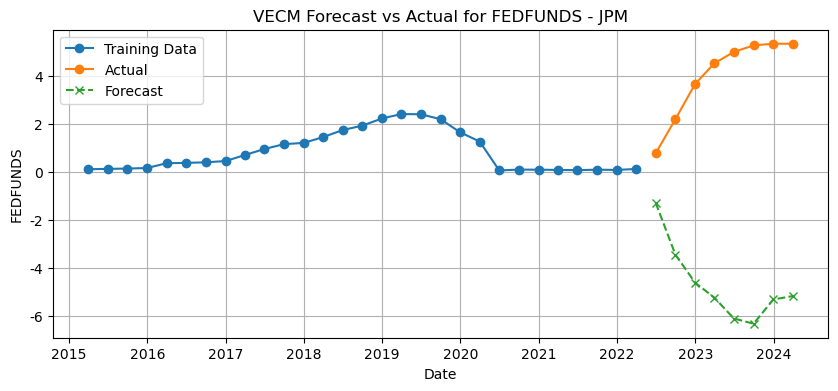

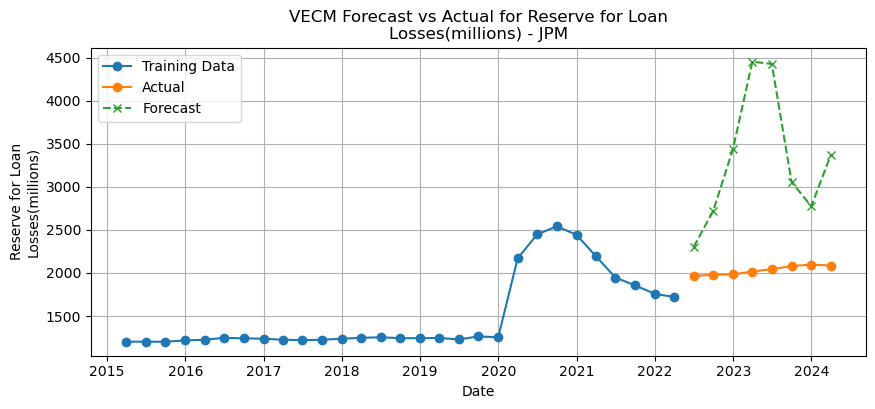

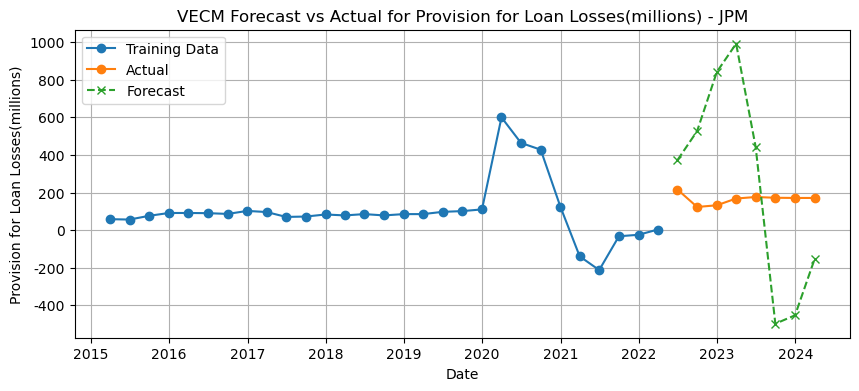

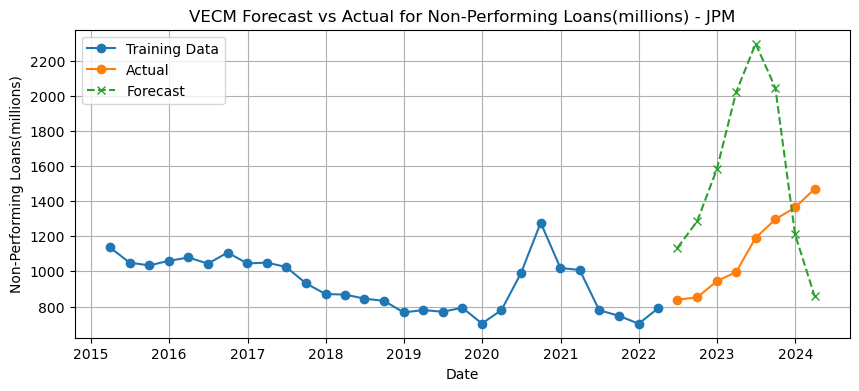

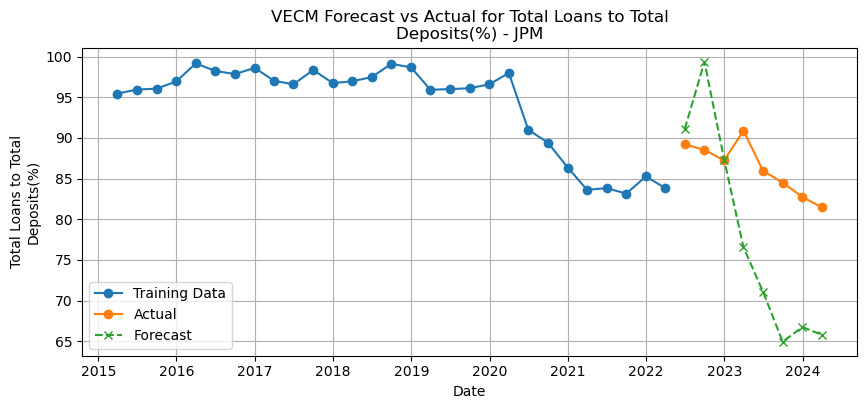

In [230]:
# Create a dictionary to store each bank's data
bank_data_dict = {
    'USB': USB_combined,
    'FRCB': FRCB_combined,
    'FCNCA': FCNCA_combined,
    'FIFTH': FIFTH_combined,
    'WFC': WFC_combined,
    'America': America_combined,
    'Citizens': Citizens_combined,
    'JPM': JPM_combined
    # Add more banks as needed
}

# Process each bank
for bank_name, data in bank_data_dict.items():
    perform_vecm_analysis_3(bank_name, data)

In [244]:
def invert_differencing(forecast_diff, original_data, differencing_order, train_size):

    rescaled_forecast = forecast_diff.copy()
    rescaled_test_data = forecast_diff.copy()  # Initialize similarly

    for col in rescaled_forecast.columns:
        # Retrieve the last 'differencing_order' original observations needed for inversion
        # Adjust the slicing to correctly fetch the necessary lagged values
        last_observations = original_data[col].iloc[train_size - differencing_order:train_size].values

        # Initialize an array to store the rescaled forecast values
        forecast_values = rescaled_forecast[col].values.copy()

        # Sequentially invert each differencing step
        for i in range(differencing_order):
            forecast_values = np.cumsum(forecast_values) + last_observations[i]
        
        rescaled_forecast[col] = forecast_values

        # Similarly invert test data
        test_values = rescaled_test_data[col].values.copy()
        for i in range(differencing_order):
            test_values = np.cumsum(test_values) + last_observations[i]
        rescaled_test_data[col] = test_values

    # Return both rescaled forecast and test data
    return rescaled_forecast, rescaled_test_data


In [ ]:
def determine_model_to_use(data, r_value):
    
    n_variables = data.shape[1]  # number of endogenous variables
    if r_value == 0:
        model_type = "VAR model on differenced data"
    elif 0 < r_value <= n_variables - 1:
        model_type = "VECM model"
    else:
        model_type = "VAR model on data in levels"
        
    return model_type

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
import warnings

def perform_var_analysis_3(bank_name, data):
    """
    Perform Vector Auto Regression (VAR) analysis on the provided dataset.
    The function checks for stationarity, applies differencing if necessary,
    selects the optimal lag order based on BIC, fits the VAR model,
    forecasts future values, and evaluates the model's performance using RMSE and MAPE.

    Parameters:
    - bank_name (str): Name of the bank being analyzed.
    - data (pd.DataFrame): DataFrame containing the time series data with a datetime index.

    Returns:
    - None
    """
    print(f"\nProcessing bank: {bank_name}")
    
    # Suppress warnings for cleaner output
    warnings.filterwarnings("ignore")
    
    # Step 1: Data Preparation
    try:
        # Ensure the index is datetime
        data.index = pd.to_datetime(data.index, dayfirst=True, errors='coerce')
        data = data.dropna()
        print("Datetime index set successfully.")
    except Exception as e:
        print(f"Error converting index to datetime for {bank_name}: {e}")
        return
    
    try:
        # Data Cleaning: Convert all columns to numeric, remove commas, and drop NA
        data = data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
        data = data.dropna()
        print("Data cleaning completed successfully.")
    except Exception as e:
        print(f"Error during data cleaning for {bank_name}: {e}")
        return
    
    # Step 2: Ensure Multiple Variables for VAR
    if data.shape[1] < 2:
        print(f"Not enough variables for VAR analysis in {bank_name}. At least two variables are required. Skipping.")
        return
    
    # Step 3: Validate Data Sufficiency
    n_obs = len(data)
    k = data.shape[1]  # Number of variables
    if n_obs < 15:
        print(f"Not enough observations (found {n_obs}) for {bank_name}. Minimum recommended is 15. Skipping.")
        return
    
    # Step 4: Stationarity Check and Differencing
    def check_stationarity(series, significance=0.05):
        """
        Perform Augmented Dickey-Fuller test to check stationarity.
        Returns True if stationary, False otherwise.
        """
        result = adfuller(series, autolag='AIC')
        p_value = result[1]
        return p_value < significance

    differenced_data = data.copy()
    differencing_order = 0
    max_diffs = 3  # Maximum differencing to prevent over-differencing

    while True:
        non_stationary = False
        for col in differenced_data.columns:
            if not check_stationarity(differenced_data[col]):
                non_stationary = True
                break
        if non_stationary:
            differencing_order += 1
            if differencing_order > max_diffs:
                differencing_order = differencing_order - 1
                print(f"Exceeded maximum differencing order for {bank_name}. Proceeding with current differenced data.")
                break
            differenced_data = differenced_data.diff().dropna()
            print(f"Applied differencing: Order {differencing_order}")
        else:
            print(f"All series are stationary after differencing order {differencing_order}.")
            break
    
    # If differencing was applied, ensure enough observations remain
    if differencing_order > 0:
        n_obs_diff = len(differenced_data)
        if n_obs_diff < 15:
            print(f"Not enough observations after differencing (found {n_obs_diff}) for {bank_name}. Skipping.")
            return
    else:
        differenced_data = data.copy()
    
    # Step 5: Train-Test Split (80% Train, 20% Test)
    n_obs_final = len(differenced_data)
    train_size = int(0.8 * n_obs_final)
    train_data = differenced_data.iloc[:train_size]
    test_data = differenced_data.iloc[train_size:]
    print(f"Data split into {train_size} training and {n_obs_final - train_size} testing observations after differencing.")
    
    # Step 6: Optimal Lag Selection Based on BIC
    calculated_maxlags = max(1, int(n_obs_final / (2 * k)))
    maxlags = min(calculated_maxlags, 15)
    
    information_criterion = 'bic'  # or 'aic' based on your preference
    
    # For VAR model
    try:
        var_model = VAR(train_data)
        lag_order_results = var_model.select_order(maxlags=maxlags)
        optimal_lag = lag_order_results.selected_orders[information_criterion]
        print(f"Selected optimal lag order for VAR based on {information_criterion.upper()}: {optimal_lag}")
    except Exception as e:
        print(f"Error during VAR lag order selection: {e}")
        return
    
    if optimal_lag is None:
        print(f"Could not determine optimal lag order for {bank_name}. Skipping.")
        return
#     # Cointegration Rank Determination
#     try:
#         r_value = determine_cointegration_rank(train_data, det_order=1, k_ar_diff=optimal_lag)
#     except np.linalg.LinAlgError:
#         print(f"Matrix not positive definite with optimal lag for {bank_name}; retrying with k_ar_diff=1.")
#         try:
#             r_value = determine_cointegration_rank(train_data, det_order=1, k_ar_diff=1)
#         except Exception as e:
#             print(f"Cointegration rank determination failed for {bank_name}: {e}")
#             return
#     print(f"\nCointegration Rank (r) for {bank_name}: {r_value}")
    
#     # Determine Model Type
#     model_type = determine_model_to_use(train_data, r_value)
#     print(f"\nSuggested Model Type for {bank_name}: {model_type}")
    
#     if model_type == "VAR model on data in levels":
#         # Step 5: Train-Test Split (80% Train, 20% Test)
#         n_obs_final = len(data)
#         train_size = int(0.8 * n_obs_final)
#         train_data = data.iloc[:train_size]
#         test_data = data.iloc[train_size:]
#         differencing_order = 0
        
    
    # Step 7: Fit the VAR Model
    try:
        var_fitted = var_model.fit(optimal_lag)
        #print(var_fitted.summary())
    except Exception as e:
        print(f"Error fitting VAR model for {bank_name}: {e}")
        return
    
     # Step 7.1: Ljung-Box Test on Residuals
    try:
        residuals = var_fitted.resid
        print(f"\nPerforming Ljung-Box Test for {bank_name} Residuals:")

        # Determine an appropriate number of lags
        # Typically, lags < sqrt(n_obs). Here, n_obs = number of residuals
        n_obs_resid = residuals.shape[0]
        max_lag = min(10, n_obs_resid - 1)  # Ensure lag < n_obs_resid

        if max_lag < 1:
            print("Not enough observations to perform Ljung-Box test.")
        else:
            # Initialize dictionaries to store test results
            lb_stat = {}
            lb_pvalue = {}

            for col in residuals.columns:
                lb_test = acorr_ljungbox(residuals[col], lags=[max_lag], return_df=True)
                lb_stat[col] = lb_test['lb_stat'].values[0]
                lb_pvalue[col] = lb_test['lb_pvalue'].values[0]
                print(f"  {col}: LB Stat={lb_test['lb_stat'].values[0]:.4f}, p-value={lb_test['lb_pvalue'].values[0]:.4f}")

            # Assess if residuals are white noise
            all_white_noise = all(p > 0.05 for p in lb_pvalue.values())
            if all_white_noise:
                print("All residuals appear to be white noise. No autocorrelation detected.")
            else:
                print("Some residuals exhibit autocorrelation. Consider revising the model.")
    except Exception as e:
        print(f"Error during Ljung-Box test for {bank_name}: {e}")
        return

    # Step 8: Forecasting
    try:
        # Forecasting 'n_forecast' steps ahead
        n_forecast = len(test_data)
        var_forecast = var_fitted.forecast(train_data.values[-optimal_lag:], steps=n_forecast)
        var_forecast_df_diff = pd.DataFrame(var_forecast, index=test_data.index, columns=train_data.columns)
        print(f"Forecasted {n_forecast} steps ahead on differenced data.")
    except Exception as e:
        print(f"Error during forecasting for {bank_name}: {e}")
        return
    
   # Step 9: Rescale Forecasts and Test Data
    try:
        if differencing_order > 0:
            # Initialize rescaled forecasts and test data
            rescaled_forecast = var_forecast_df_diff.copy()
            rescaled_test_data = test_data.copy()

            for col in rescaled_forecast.columns:
                # Retrieve the last 'differencing_order' original observations needed for inversion
                last_observations = data[col].iloc[train_size - differencing_order:train_size].values

                # Invert differencing for the forecast
                forecast_values = rescaled_forecast[col].values
                for i in range(differencing_order):
                    forecast_values = np.cumsum(forecast_values) + last_observations[i]
                rescaled_forecast[col] = forecast_values

                # Invert differencing for the test data
                test_values = rescaled_test_data[col].values
                for i in range(differencing_order):
                    test_values = np.cumsum(test_values) + last_observations[i]
                rescaled_test_data[col] = test_values

            # Align the index
            rescaled_forecast.index = test_data.index
            rescaled_test_data.index = test_data.index
            print("Rescaled forecast and test data to original scale.")
        else:
            # No differencing was applied
            rescaled_forecast = pd.DataFrame(var_forecast_df_diff, index=test_data.index, columns=test_data.columns)
            rescaled_test_data = test_data.copy()
            print("No differencing applied. Forecast and test data are already on original scale.")
    except Exception as e:
        print(f"Error during rescaling of forecasts and test data for {bank_name}: {e}")
        return

    # Step 10: Evaluate Model Performance
    try:
        rmse = {}
        mape = {}
        for col in rescaled_test_data.columns:
            actual = rescaled_test_data[col]
            predicted = rescaled_forecast[col]
            rmse[col] = np.sqrt(mean_squared_error(actual, predicted))
            # Handle cases where actual value is zero to avoid division by zero
            non_zero = actual != 0
            if non_zero.any():
                mape[col] = mean_absolute_percentage_error(actual[non_zero], predicted[non_zero]) * 100
            else:
                mape[col] = np.nan
        print(f"\nRMSE for {bank_name}:")
        for var, value in rmse.items():
            print(f"{var}: {value:.4f}")
        
        print(f"\nMAPE for {bank_name}:")
        for var, value in mape.items():
            if not np.isnan(value):
                print(f"{var}: {value:.2f}%")
            else:
                print(f"{var}: MAPE not defined (all actual values are zero).")
    except Exception as e:
        print(f"Error during model evaluation for {bank_name}: {e}")
        return
    
    # Step 11: Plot Actual vs Predicted for Each Variable
    try:
        for col in rescaled_test_data.columns:
            plt.figure(figsize=(10,4))
            # Plot the original (non-differenced) training data
            if differencing_order > 0:
                # To plot on original scale, use the original training data
                plt.plot(data.index[:train_size], data[col].iloc[:train_size], label='Training Data', marker='o')
            else:
                plt.plot(train_data.index, train_data[col], label='Training Data', marker='o')
            plt.plot(test_data.index, rescaled_test_data[col], label='Actual', marker='o')
            plt.plot(rescaled_forecast.index, rescaled_forecast[col], label='Forecast', marker='x', linestyle='--')
            plt.title(f"VAR Forecast vs Actual for {col} - {bank_name}")
            plt.xlabel('Date')
            plt.ylabel(col)
            plt.legend()
            plt.grid(True)
            plt.show()
    except Exception as e:
        print(f"Error during plotting for {bank_name}: {e}")
        return



Processing bank: USB
Datetime index set successfully.
Data cleaning completed successfully.
Applied differencing: Order 1
All series are stationary after differencing order 1.
Data split into 28 training and 8 testing observations after differencing.
Selected optimal lag order for VAR based on BIC: 3

Performing Ljung-Box Test for USB Residuals:
  UN RATE: LB Stat=12.2640, p-value=0.2678
  FEDFUNDS: LB Stat=27.4341, p-value=0.0022
  Reserve for Loan
Losses(millions): LB Stat=10.1347, p-value=0.4288
  Provision for Loan Losses(millions): LB Stat=7.8517, p-value=0.6433
  Non-Performing Loans(millions): LB Stat=2.6544, p-value=0.9884
  Total Loans to Total
Deposits(%): LB Stat=11.2010, p-value=0.3421
Some residuals exhibit autocorrelation. Consider revising the model.
Forecasted 8 steps ahead on differenced data.
Rescaled forecast and test data to original scale.

RMSE for USB:
UN RATE: 19.0253
FEDFUNDS: 15.0132
Reserve for Loan
Losses(millions): 11879.1604
Provision for Loan Losses(mill

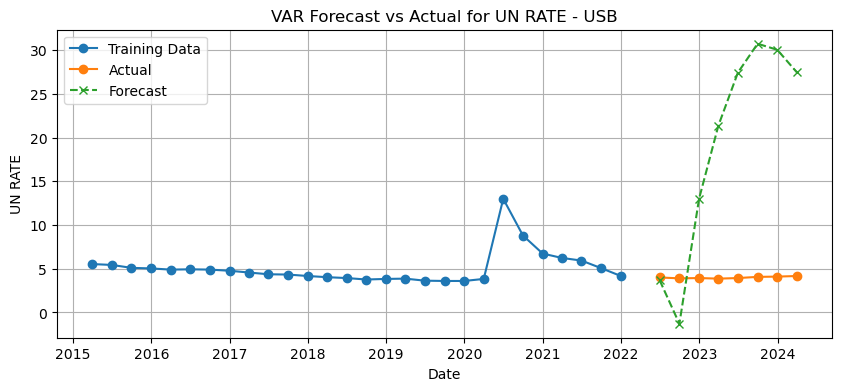

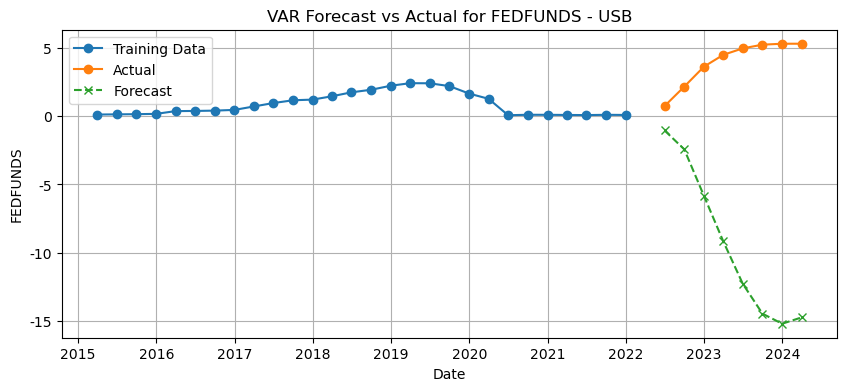

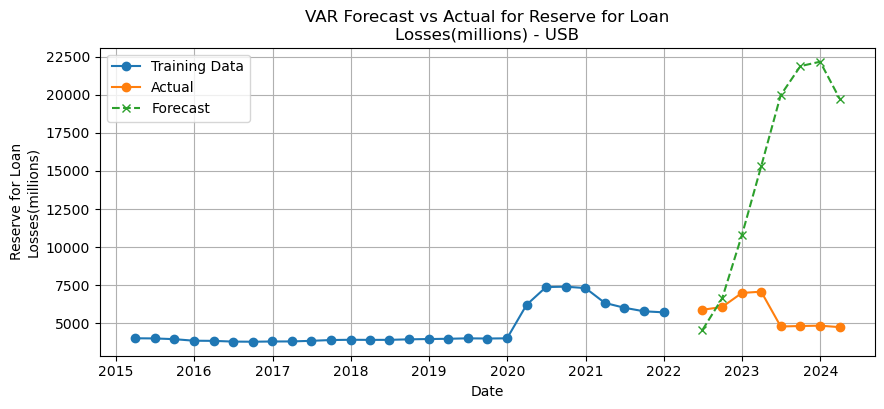

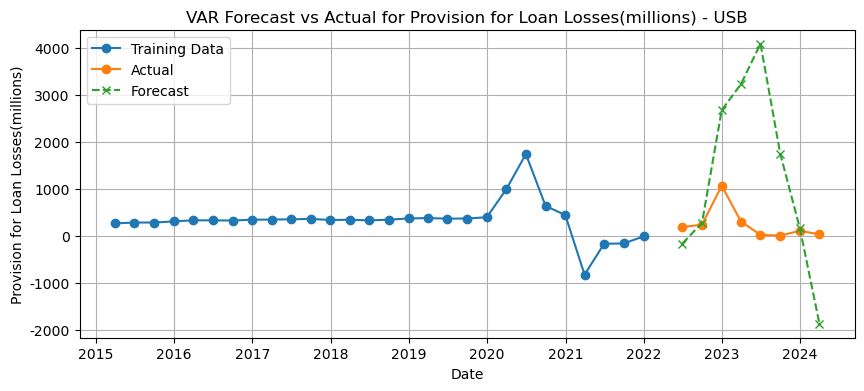

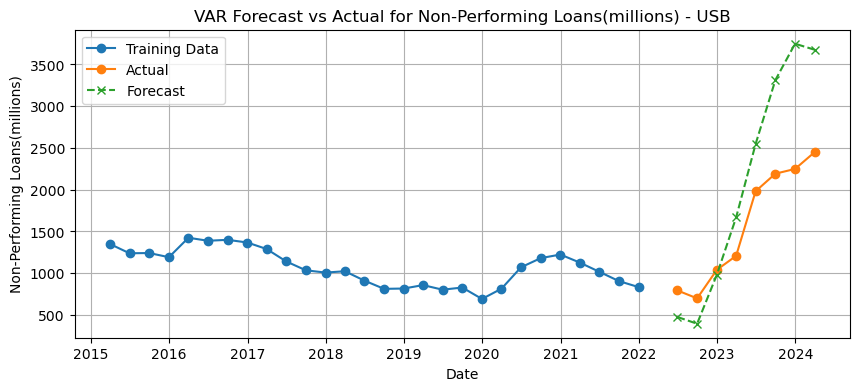

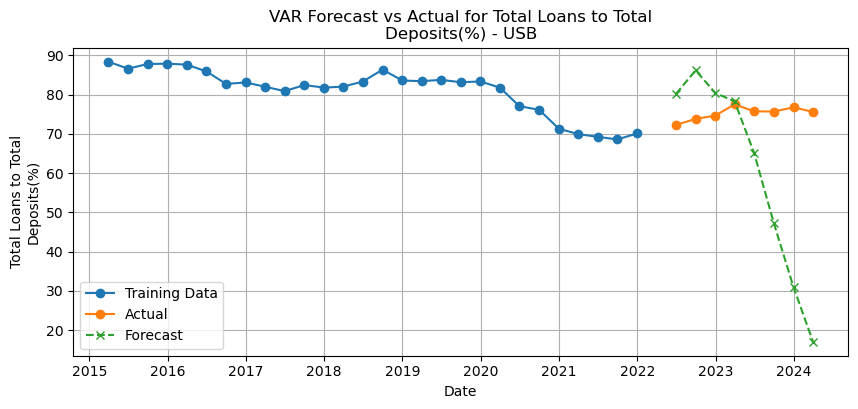


Processing bank: FRCB
Datetime index set successfully.
Data cleaning completed successfully.
Applied differencing: Order 1
Applied differencing: Order 2
Applied differencing: Order 3
Exceeded maximum differencing order for FRCB. Proceeding with current differenced data.
Data split into 23 training and 6 testing observations after differencing.
Selected optimal lag order for VAR based on BIC: 2

Performing Ljung-Box Test for FRCB Residuals:
  UN RATE: LB Stat=41.2167, p-value=0.0000
  FEDFUNDS: LB Stat=26.3742, p-value=0.0033
  Reserve for Loan
Losses(millions): LB Stat=21.3004, p-value=0.0191
  Provision for Loan Losses(millions): LB Stat=21.5358, p-value=0.0177
  Non-Performing Loans(millions): LB Stat=11.0272, p-value=0.3554
  Total Loans to Total
Deposits(%): LB Stat=7.8812, p-value=0.6404
Some residuals exhibit autocorrelation. Consider revising the model.
Forecasted 6 steps ahead on differenced data.
Rescaled forecast and test data to original scale.

RMSE for FRCB:
UN RATE: 84.3

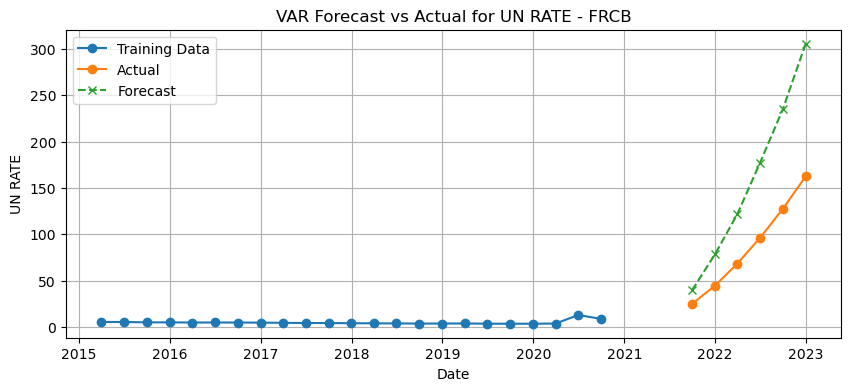

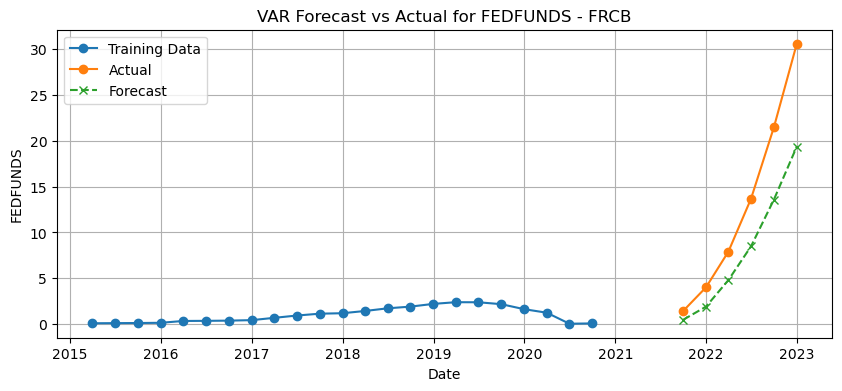

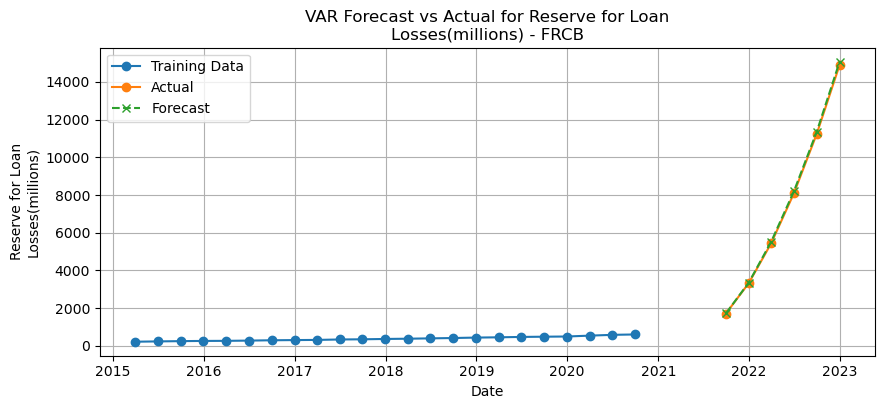

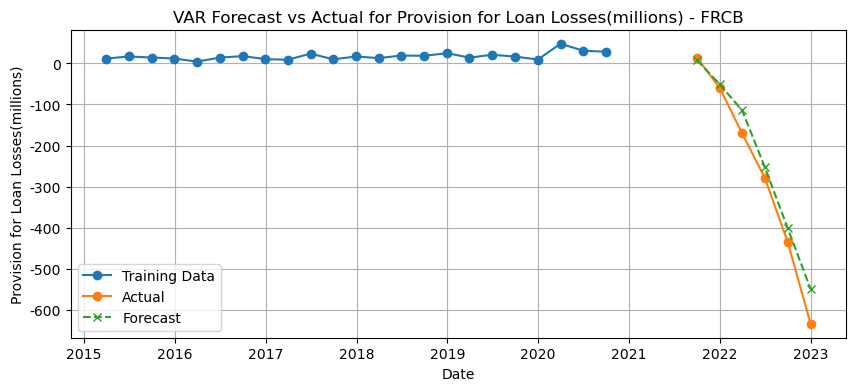

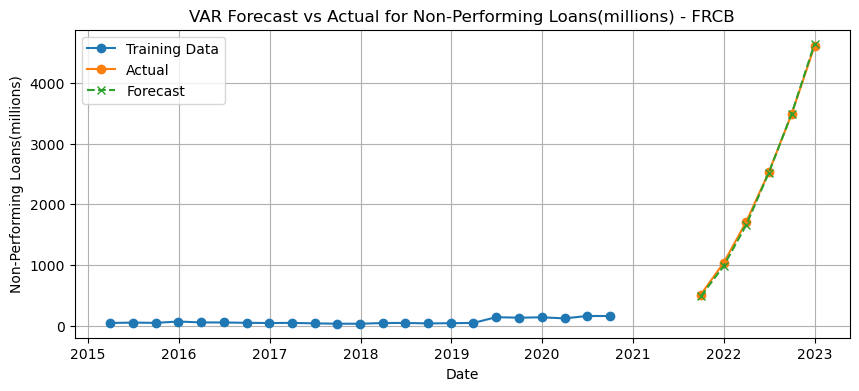

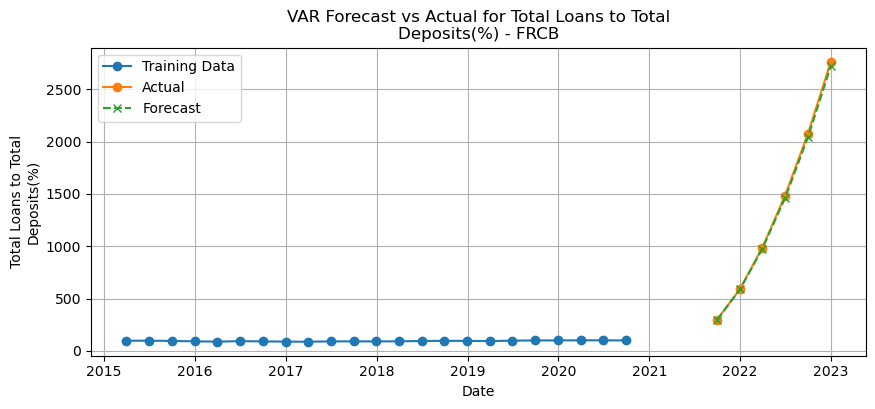


Processing bank: FCNCA
Datetime index set successfully.
Data cleaning completed successfully.
Applied differencing: Order 1
Applied differencing: Order 2
Applied differencing: Order 3
Exceeded maximum differencing order for FCNCA. Proceeding with current differenced data.
Data split into 27 training and 7 testing observations after differencing.
Selected optimal lag order for VAR based on BIC: 2

Performing Ljung-Box Test for FCNCA Residuals:
  UN RATE: LB Stat=4.9689, p-value=0.8932
  FEDFUNDS: LB Stat=8.8666, p-value=0.5448
  Reserve for Loan
Losses(millions): LB Stat=6.3542, p-value=0.7847
  Provision for Loan Losses(millions): LB Stat=4.4029, p-value=0.9273
  Non-Performing Loans(millions): LB Stat=3.3916, p-value=0.9707
  Total Loans to Total
Deposits(%): LB Stat=8.2611, p-value=0.6034
All residuals appear to be white noise. No autocorrelation detected.
Forecasted 7 steps ahead on differenced data.
Rescaled forecast and test data to original scale.

RMSE for FCNCA:
UN RATE: 33031

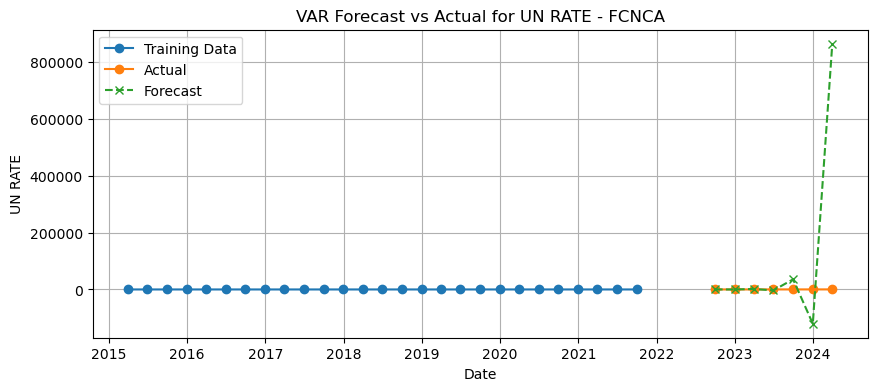

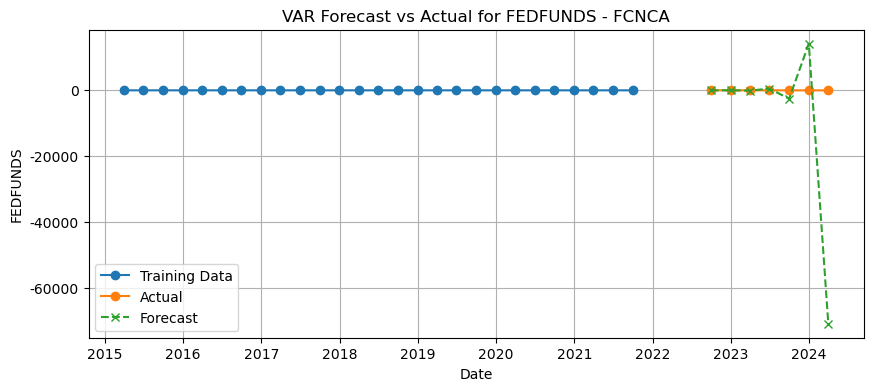

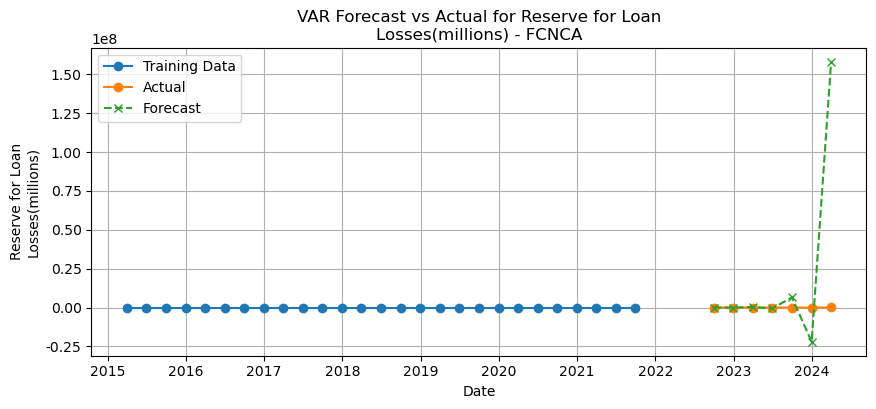

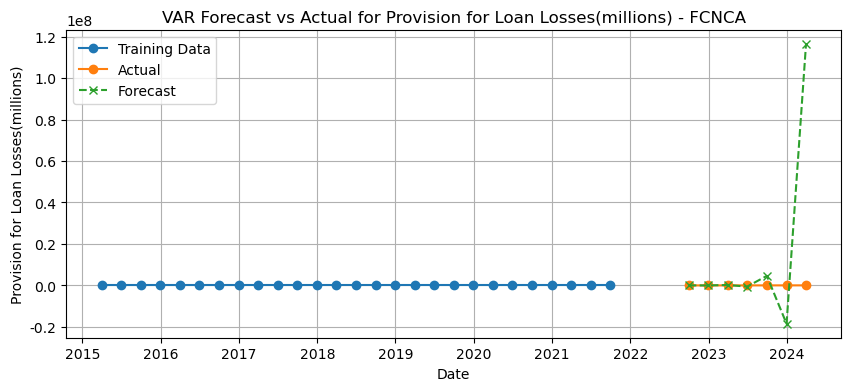

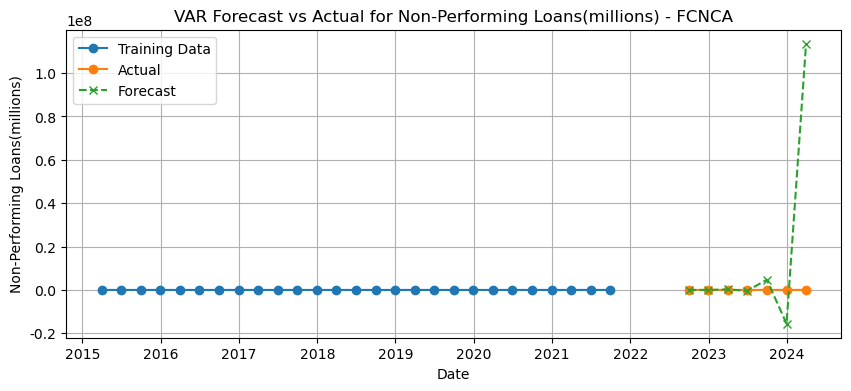

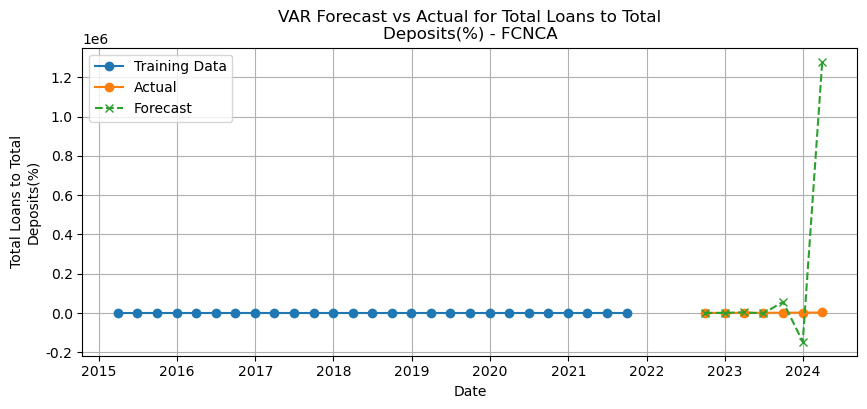


Processing bank: FIFTH
Datetime index set successfully.
Data cleaning completed successfully.
Applied differencing: Order 1
All series are stationary after differencing order 1.
Data split into 28 training and 8 testing observations after differencing.
Selected optimal lag order for VAR based on BIC: 3

Performing Ljung-Box Test for FIFTH Residuals:
  UN RATE: LB Stat=14.8310, p-value=0.1383
  FEDFUNDS: LB Stat=10.8464, p-value=0.3696
  Reserve for Loan
Losses(millions): LB Stat=6.2049, p-value=0.7978
  Provision for Loan Losses(millions): LB Stat=6.8824, p-value=0.7365
  Non-Performing Loans(millions): LB Stat=13.4247, p-value=0.2009
  Total Loans to Total
Deposits(%): LB Stat=19.6904, p-value=0.0323
Some residuals exhibit autocorrelation. Consider revising the model.
Forecasted 8 steps ahead on differenced data.
Rescaled forecast and test data to original scale.

RMSE for FIFTH:
UN RATE: 5.2649
FEDFUNDS: 5.4182
Reserve for Loan
Losses(millions): 1029.1867
Provision for Loan Losses(m

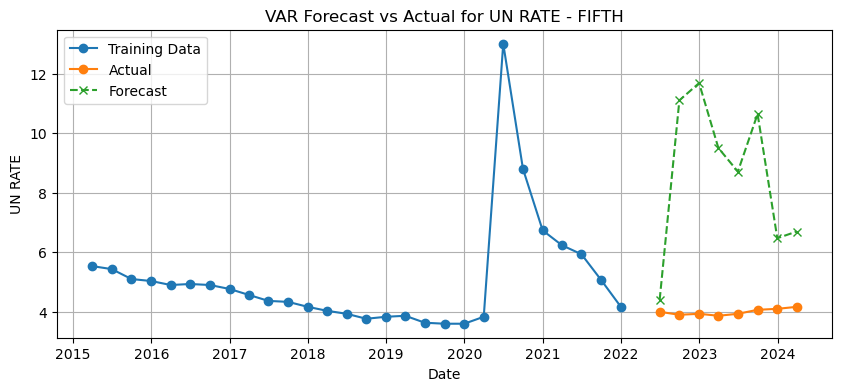

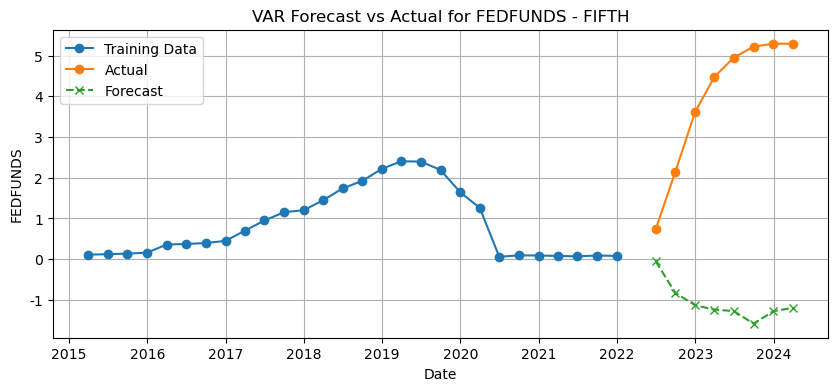

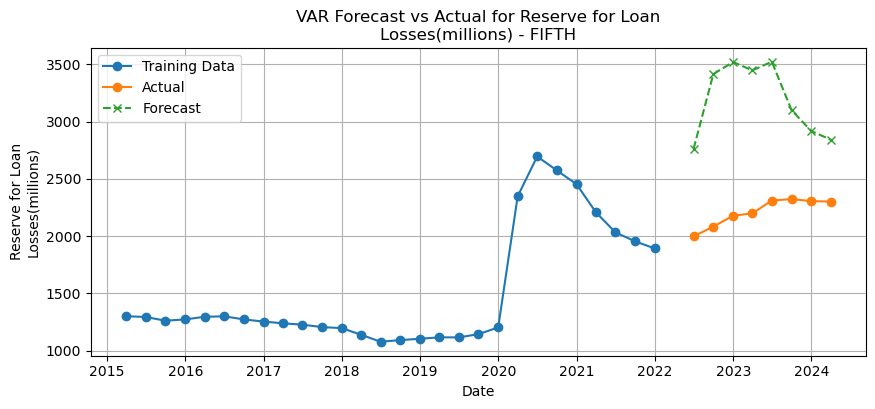

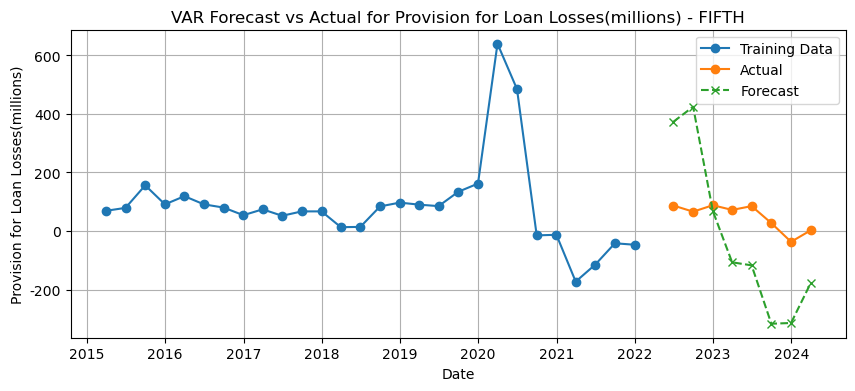

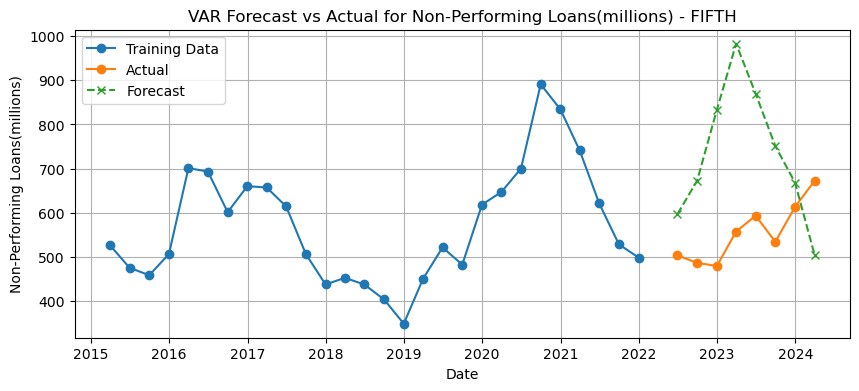

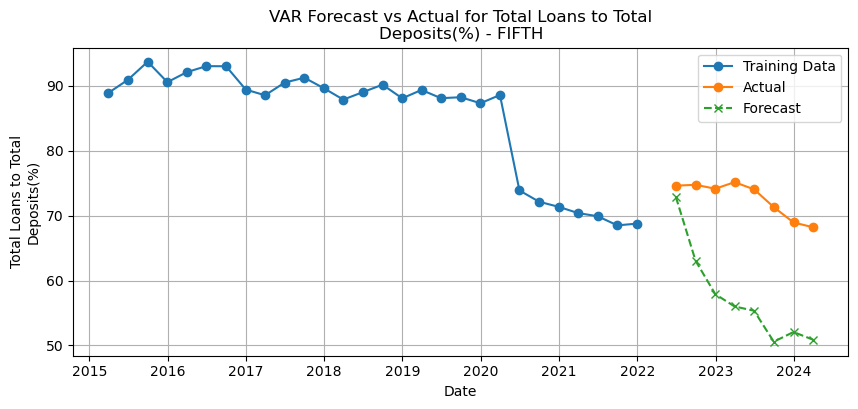


Processing bank: WFC
Datetime index set successfully.
Data cleaning completed successfully.
Applied differencing: Order 1
All series are stationary after differencing order 1.
Data split into 28 training and 8 testing observations after differencing.
Selected optimal lag order for VAR based on BIC: 3

Performing Ljung-Box Test for WFC Residuals:
  UN RATE: LB Stat=22.2776, p-value=0.0138
  FEDFUNDS: LB Stat=10.3343, p-value=0.4117
  Reserve for Loan
Losses(millions): LB Stat=17.2255, p-value=0.0695
  Provision for Loan Losses(millions): LB Stat=19.0824, p-value=0.0392
  Non-Performing Loans(millions): LB Stat=7.5951, p-value=0.6683
  Total Loans to Total
Deposits(%): LB Stat=14.3158, p-value=0.1591
Some residuals exhibit autocorrelation. Consider revising the model.
Forecasted 8 steps ahead on differenced data.
Rescaled forecast and test data to original scale.

RMSE for WFC:
UN RATE: 1.5722
FEDFUNDS: 4.8162
Reserve for Loan
Losses(millions): 1782.0374
Provision for Loan Losses(millio

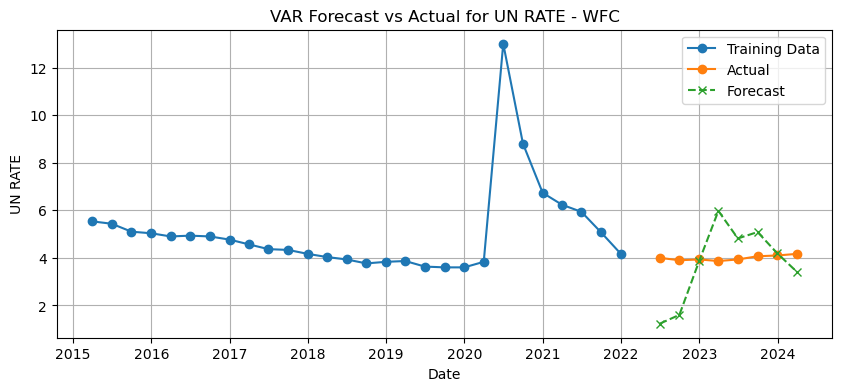

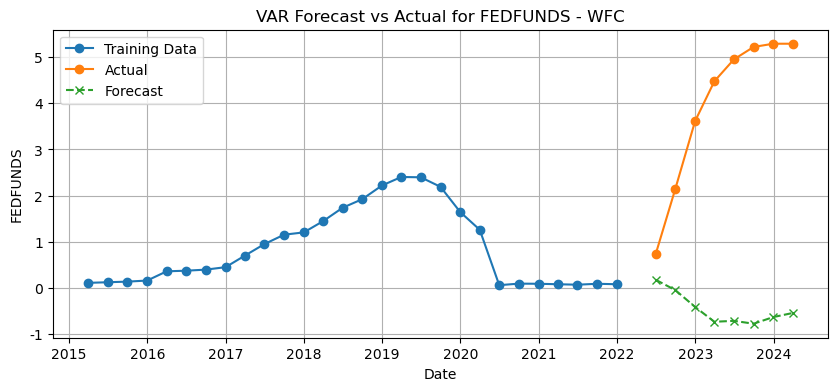

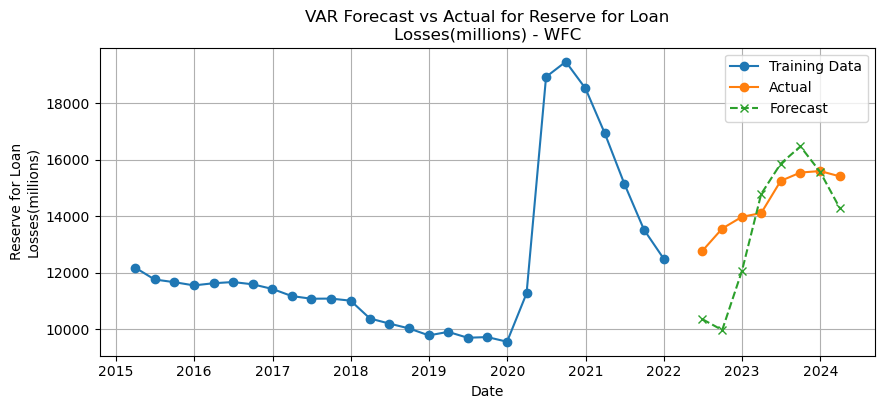

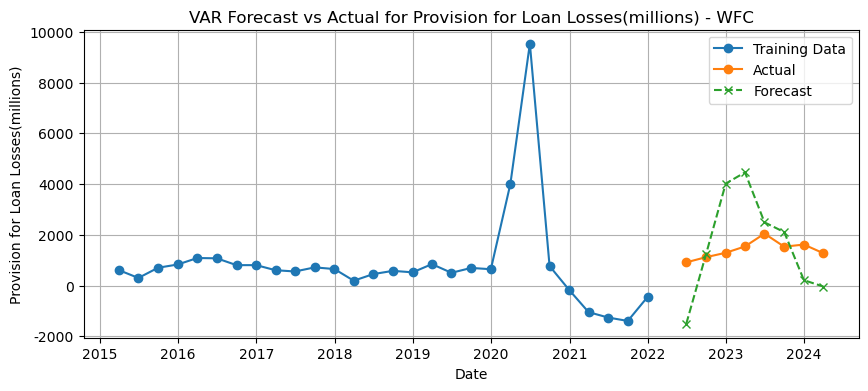

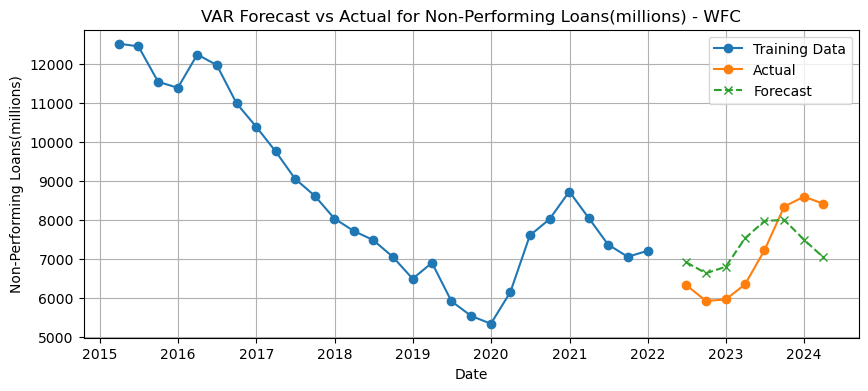

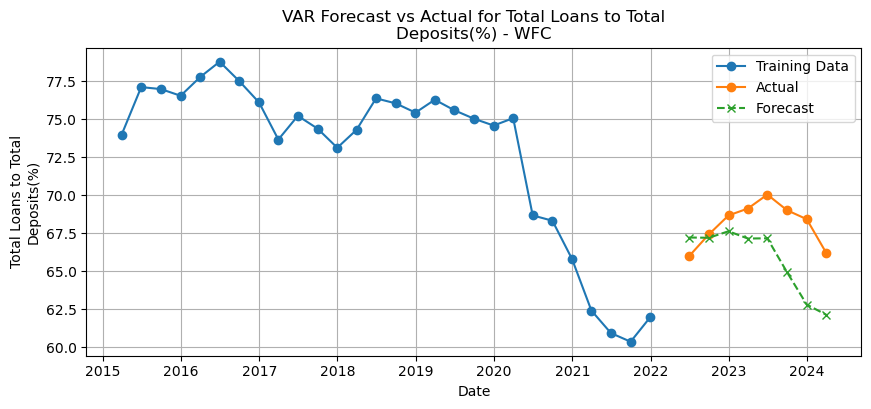


Processing bank: America
Datetime index set successfully.
Data cleaning completed successfully.
Applied differencing: Order 1
Applied differencing: Order 2
Applied differencing: Order 3
Exceeded maximum differencing order for America. Proceeding with current differenced data.
Data split into 27 training and 7 testing observations after differencing.
Selected optimal lag order for VAR based on BIC: 2

Performing Ljung-Box Test for America Residuals:
  UN RATE: LB Stat=8.8722, p-value=0.5443
  FEDFUNDS: LB Stat=13.7238, p-value=0.1860
  Reserve for Loan
Losses(millions): LB Stat=5.1379, p-value=0.8818
  Provision for Loan Losses(millions): LB Stat=10.8199, p-value=0.3717
  Non-Performing Loans(millions): LB Stat=10.6324, p-value=0.3869
  Total Loans to Total
Deposits(%): LB Stat=11.3420, p-value=0.3315
All residuals appear to be white noise. No autocorrelation detected.
Forecasted 7 steps ahead on differenced data.
Rescaled forecast and test data to original scale.

RMSE for America:
UN

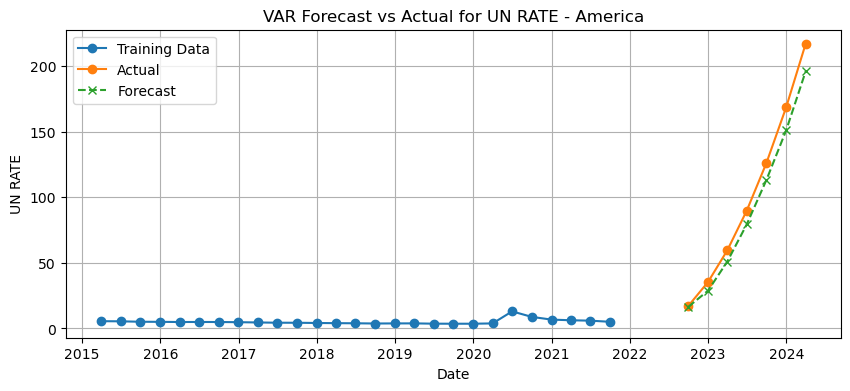

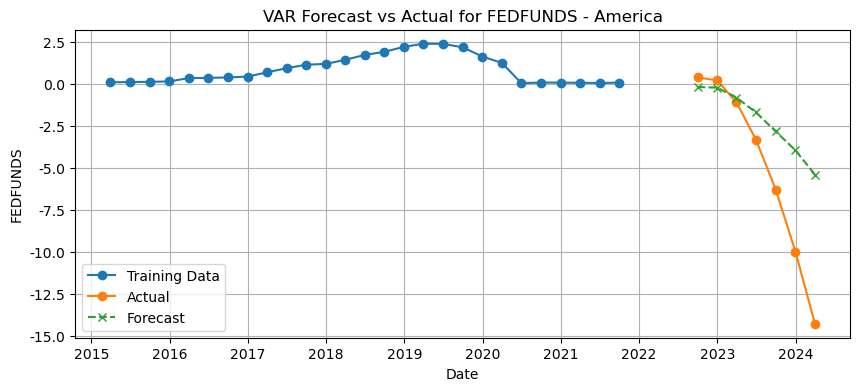

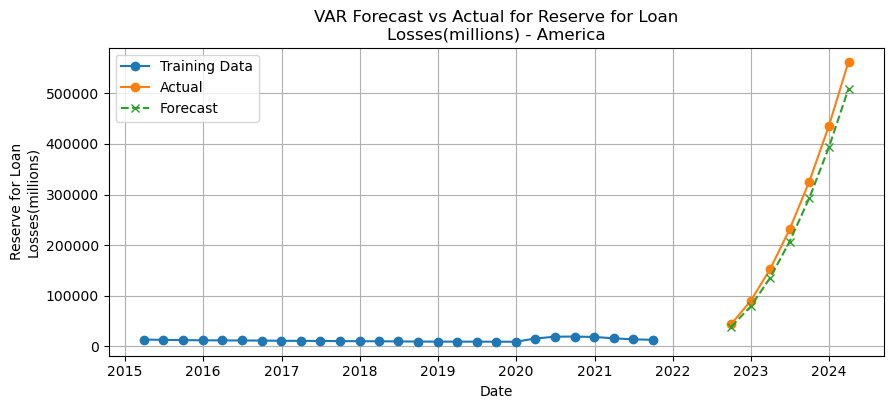

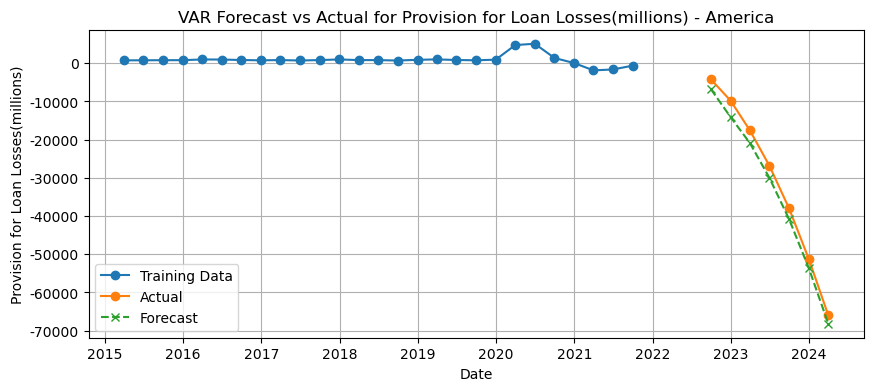

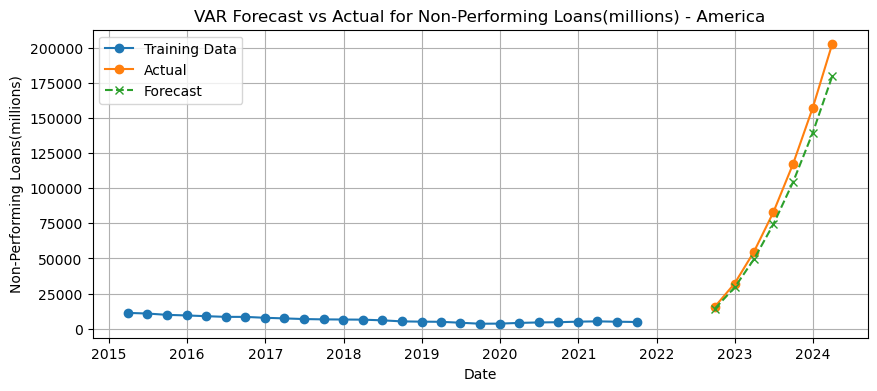

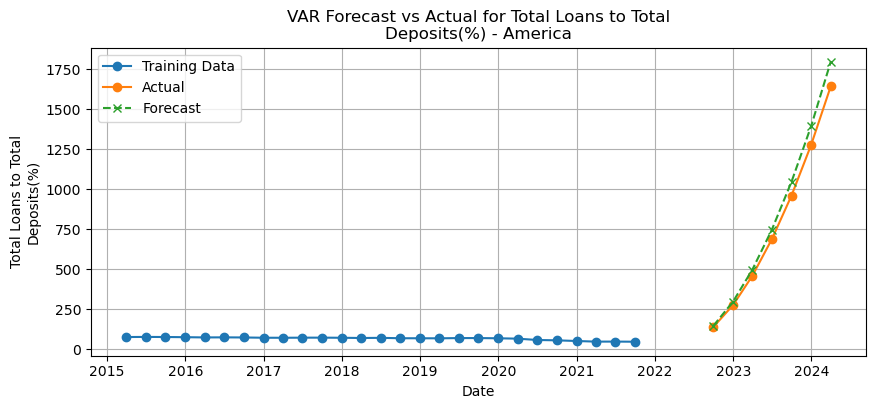


Processing bank: Citizens
Datetime index set successfully.
Data cleaning completed successfully.
Applied differencing: Order 1
All series are stationary after differencing order 1.
Data split into 28 training and 8 testing observations after differencing.
Selected optimal lag order for VAR based on BIC: 3

Performing Ljung-Box Test for Citizens Residuals:
  UN RATE: LB Stat=19.7126, p-value=0.0321
  FEDFUNDS: LB Stat=18.7500, p-value=0.0436
  Reserve for Loan
Losses(millions): LB Stat=16.4878, p-value=0.0865
  Provision for Loan Losses(millions): LB Stat=15.5677, p-value=0.1127
  Non-Performing Loans(millions): LB Stat=15.7374, p-value=0.1074
  Total Loans to Total
Deposits(%): LB Stat=15.4512, p-value=0.1165
Some residuals exhibit autocorrelation. Consider revising the model.
Forecasted 8 steps ahead on differenced data.
Rescaled forecast and test data to original scale.

RMSE for Citizens:
UN RATE: 7.7673
FEDFUNDS: 5.1880
Reserve for Loan
Losses(millions): 1141.2629
Provision for Lo

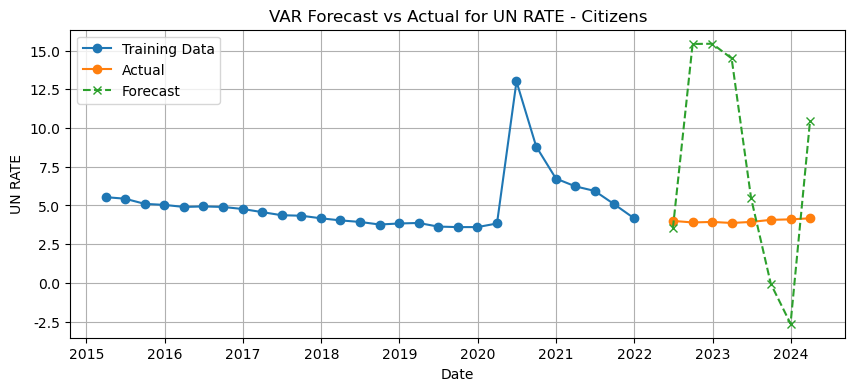

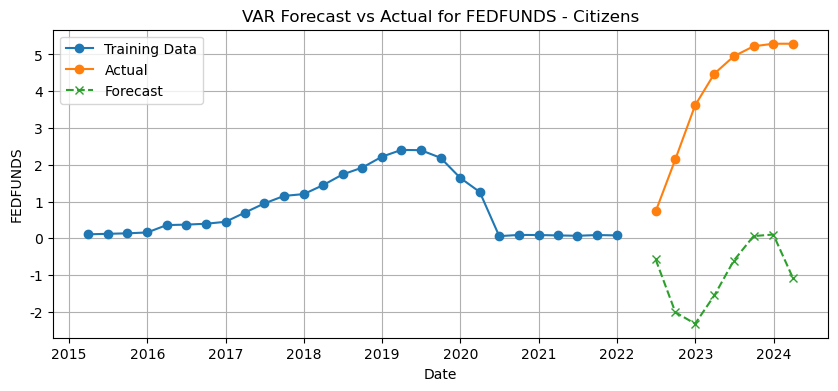

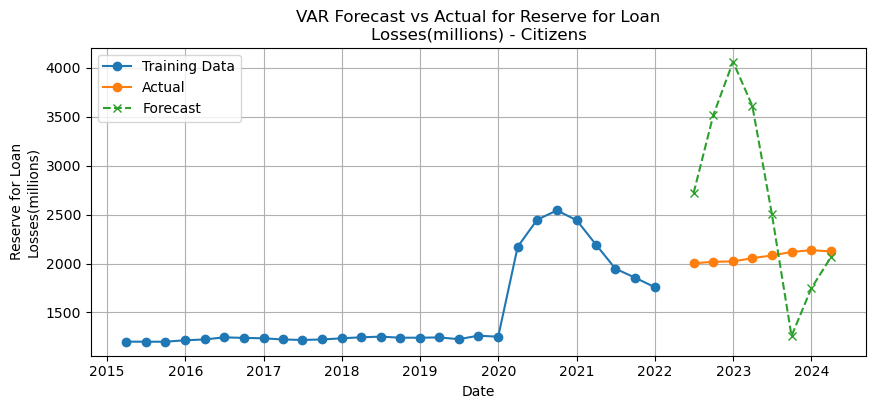

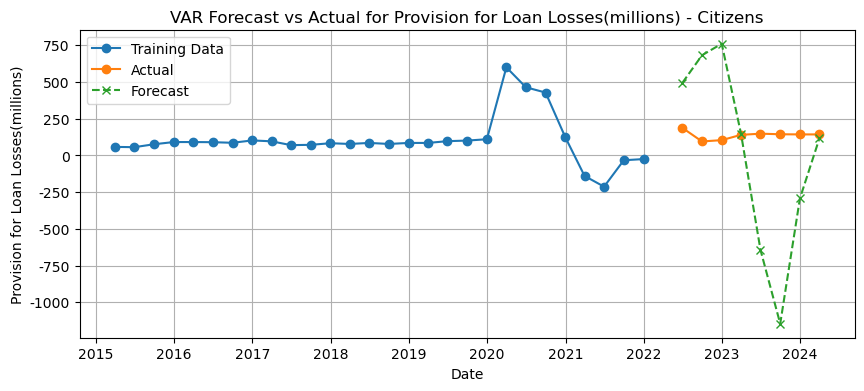

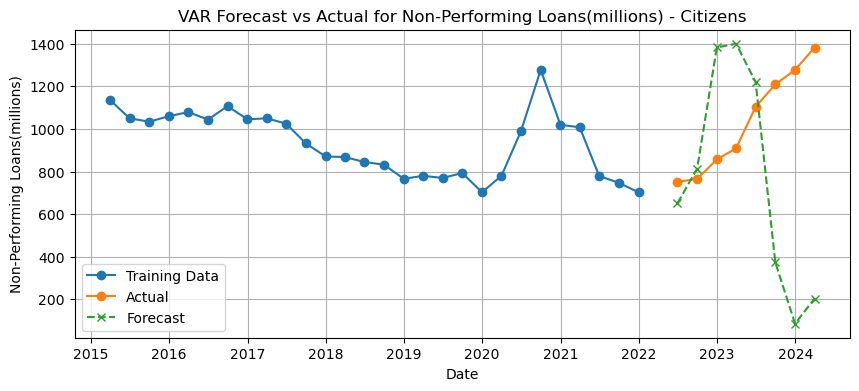

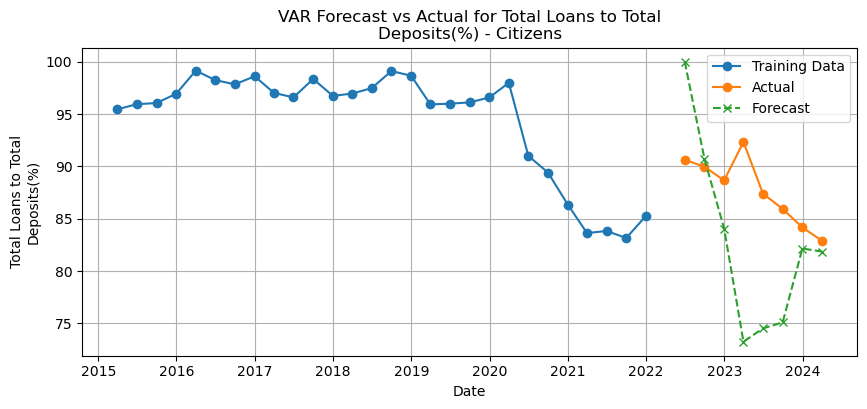


Processing bank: JPM
Datetime index set successfully.
Data cleaning completed successfully.
Applied differencing: Order 1
All series are stationary after differencing order 1.
Data split into 28 training and 8 testing observations after differencing.
Selected optimal lag order for VAR based on BIC: 3

Performing Ljung-Box Test for JPM Residuals:
  UN RATE: LB Stat=19.7126, p-value=0.0321
  FEDFUNDS: LB Stat=18.7500, p-value=0.0436
  Reserve for Loan
Losses(millions): LB Stat=16.4878, p-value=0.0865
  Provision for Loan Losses(millions): LB Stat=15.5677, p-value=0.1127
  Non-Performing Loans(millions): LB Stat=15.7374, p-value=0.1074
  Total Loans to Total
Deposits(%): LB Stat=15.4512, p-value=0.1165
Some residuals exhibit autocorrelation. Consider revising the model.
Forecasted 8 steps ahead on differenced data.
Rescaled forecast and test data to original scale.

RMSE for JPM:
UN RATE: 7.7673
FEDFUNDS: 5.1880
Reserve for Loan
Losses(millions): 1141.2629
Provision for Loan Losses(milli

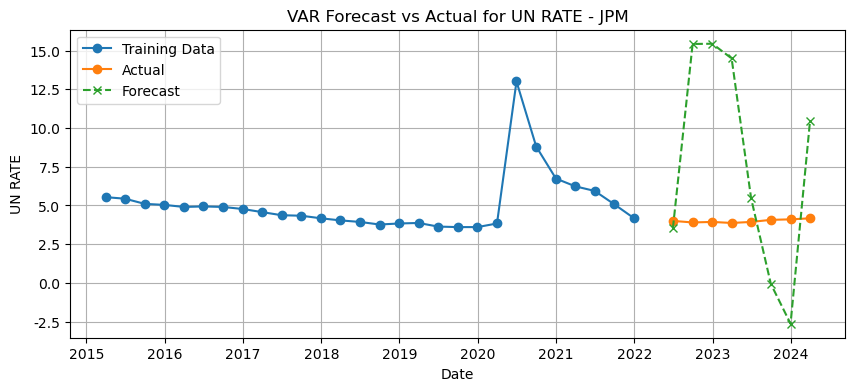

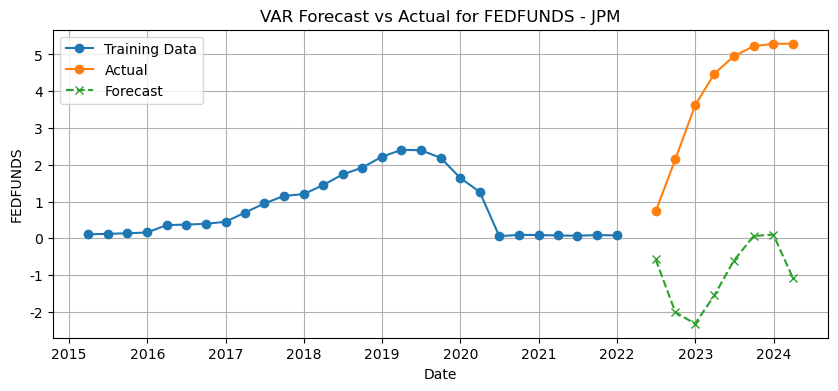

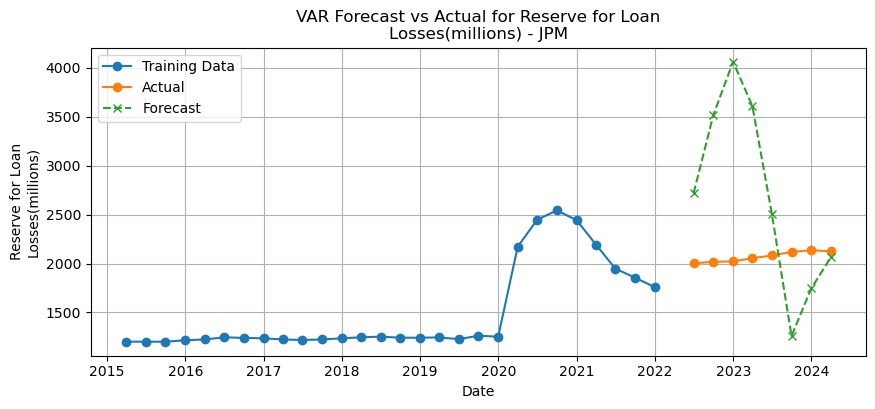

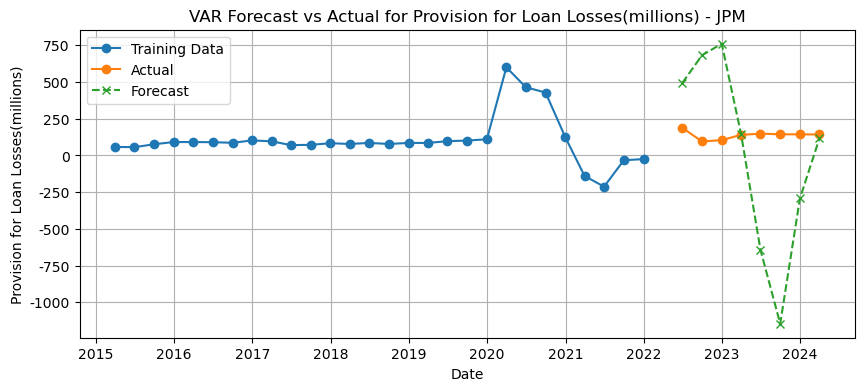

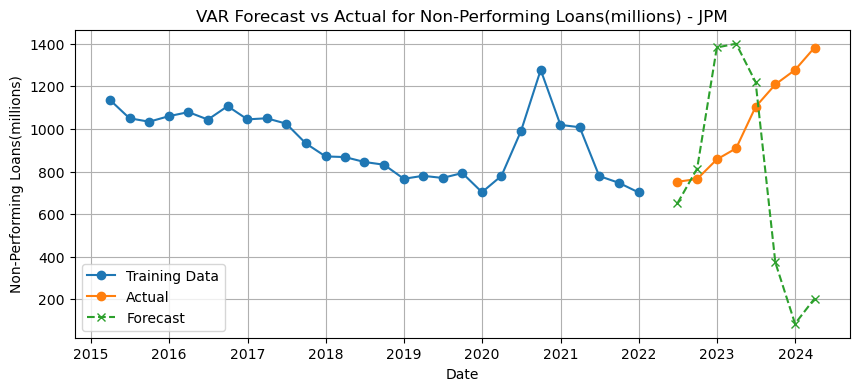

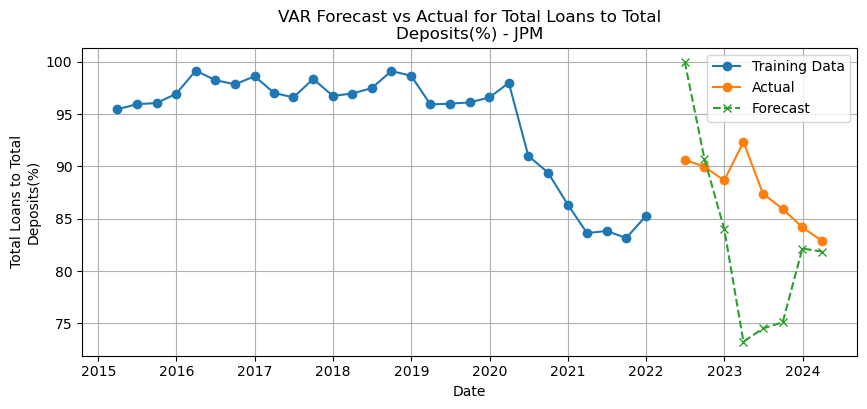

In [296]:
# Create a dictionary to store each bank's data
bank_data_dict = {
    'USB': USB_combined,
    'FRCB': FRCB_combined,
    'FCNCA': FCNCA_combined,
    'FIFTH': FIFTH_combined,
    'WFC': WFC_combined,
    'America': America_combined,
    'Citizens': Citizens_combined,
    'JPM': JPM_combined
    # Add more banks as needed
}

# Process each bank
for bank_name, data in bank_data_dict.items():
    perform_var_analysis_3(bank_name, data)